In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product

from vis import set_nature_style, plot_isotopologue_dist
from typing import Union, Tuple
from fit_binomial import fit_binomial, model_C16, model_C18, calculate_mean, get_full_prediction

set_nature_style()

### Set input and output

In [2]:
# Path to IsoCorrectoR output
df_path = "data/IsoCorrectoR_ACLY.csv"

# Directory to save plots and results tables
output_path = Path("data/acly_results")
output_path.mkdir(exist_ok=True)

### Read in Isocorretor output

In [3]:
def parse_isocorrector(df_path: Union[str, Path]):
    df = pd.read_csv(df_path, index_col=0)
    sample_list = df.columns.to_list()
    df["isotopologue"] = df.index
    df["fa"] = df.isotopologue.apply(lambda x: x.split("_")[0])
    df["M"] = df.isotopologue.apply(lambda x: int(x.split("_")[1]))
    
    df.sort_values(["fa", "M"], axis=0, inplace=True)
    
    fa_list = df.fa.unique()
    return df, sample_list, fa_list

In [4]:
df, sample_list, fa_list = parse_isocorrector(df_path)

In [5]:
df.head()

,MTS_Alyona_acly3028_1,MTS_Alyona_acly3028_2,MTS_Alyona_acly3028_3,MTS_Alyona_acly3028_etoh,MTS_Alyona_renilla_1,MTS_Alyona_renilla_2,MTS_Alyona_renilla_3,MTS_Alyona_renilla_etoh,MTS_Alyona_acly4080_1,MTS_Alyona_acly4080_2,...,MTS_Blank_02,MTS_Blank_03,MTS_Blank_04,MTS_Blank_05,MTS_Blank_06,MTS_Blank_07,MTS_Blank_08,isotopologue,fa,M
Palmitate_0,0.372865,0.362344,0.359486,0.244990,0.297606,0.311645,0.303147,0.283421,0.428174,0.431374,...,0.979015,0.988792,0.671183,0.676072,0.620051,0.670615,0.624439,Palmitate_0,Palmitate,0
Palmitate_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015484,0.011208,0.000000,0.000000,0.002541,0.000000,0.000000,Palmitate_1,Palmitate,1
Palmitate_2,0.100741,0.098876,0.104408,0.005361,0.001569,0.001963,0.002781,0.002676,0.022986,0.024214,...,0.000000,0.000000,0.001757,0.002584,0.028039,0.005631,0.020163,Palmitate_2,Palmitate,2
Palmitate_3,0.003829,0.005555,0.005055,0.001044,0.001132,0.000912,0.000773,0.000704,0.003244,0.003205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Palmitate_3,Palmitate,3
Palmitate_4,0.105557,0.102840,0.100658,0.016213,0.010994,0.010418,0.011763,0.011277,0.057001,0.057732,...,0.000000,0.000000,0.014261,0.012243,0.030577,0.035987,0.028332,Palmitate_4,Palmitate,4


In [6]:
sample_list

['MTS_Alyona_acly3028_1',
 'MTS_Alyona_acly3028_2',
 'MTS_Alyona_acly3028_3',
 'MTS_Alyona_acly3028_etoh',
 'MTS_Alyona_renilla_1',
 'MTS_Alyona_renilla_2',
 'MTS_Alyona_renilla_3',
 'MTS_Alyona_renilla_etoh',
 'MTS_Alyona_acly4080_1',
 'MTS_Alyona_acly4080_2',
 'MTS_Alyona_acly4080_3',
 'MTS_Alyona_acly4080_etoh',
 'MTS_Blank_01',
 'MTS_Blank_02',
 'MTS_Blank_03',
 'MTS_Blank_04',
 'MTS_Blank_05',
 'MTS_Blank_06',
 'MTS_Blank_07',
 'MTS_Blank_08']

### Run analysis

Palmitate MTS_Alyona_acly3028_1
[0.37286501 0.         0.10074133 0.00382922 0.10555691 0.00846233
 0.09066615 0.01231748 0.0878235  0.01352244 0.08189599 0.01305754
 0.05896242 0.00789019 0.03227028 0.00217187 0.00796734]
[0 1 2 3 4 5 6 7 8] 9 [0.39424073 0.39308821] True
Mean estimate 7.0262903740898865, p 0.4391431483806179


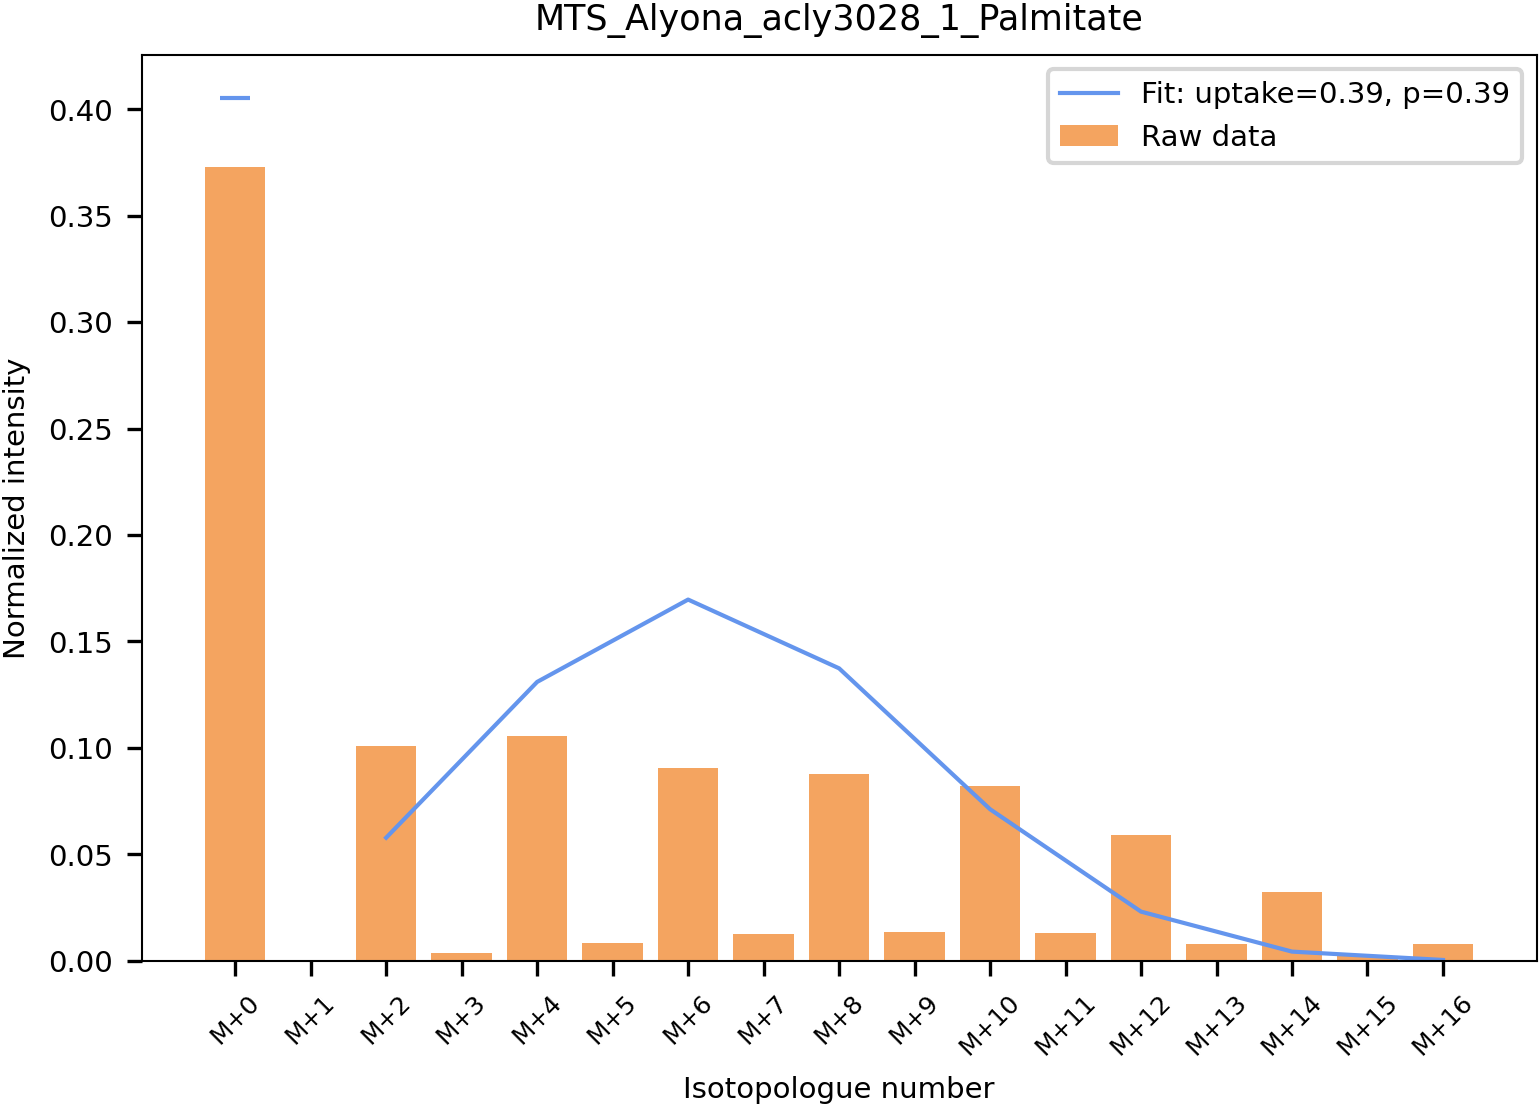

Palmitate MTS_Alyona_acly3028_2
[0.3623436  0.         0.09887571 0.0055551  0.10283974 0.00970897
 0.0891575  0.01314589 0.0844794  0.0144307  0.08455061 0.01490663
 0.06703811 0.0085612  0.03397017 0.0020087  0.00842796]
[0 1 2 3 4 5 6 7 8] 9 [0.38765716 0.4058204 ] True
Mean estimate 7.1666994916817295, p 0.4479187182301081


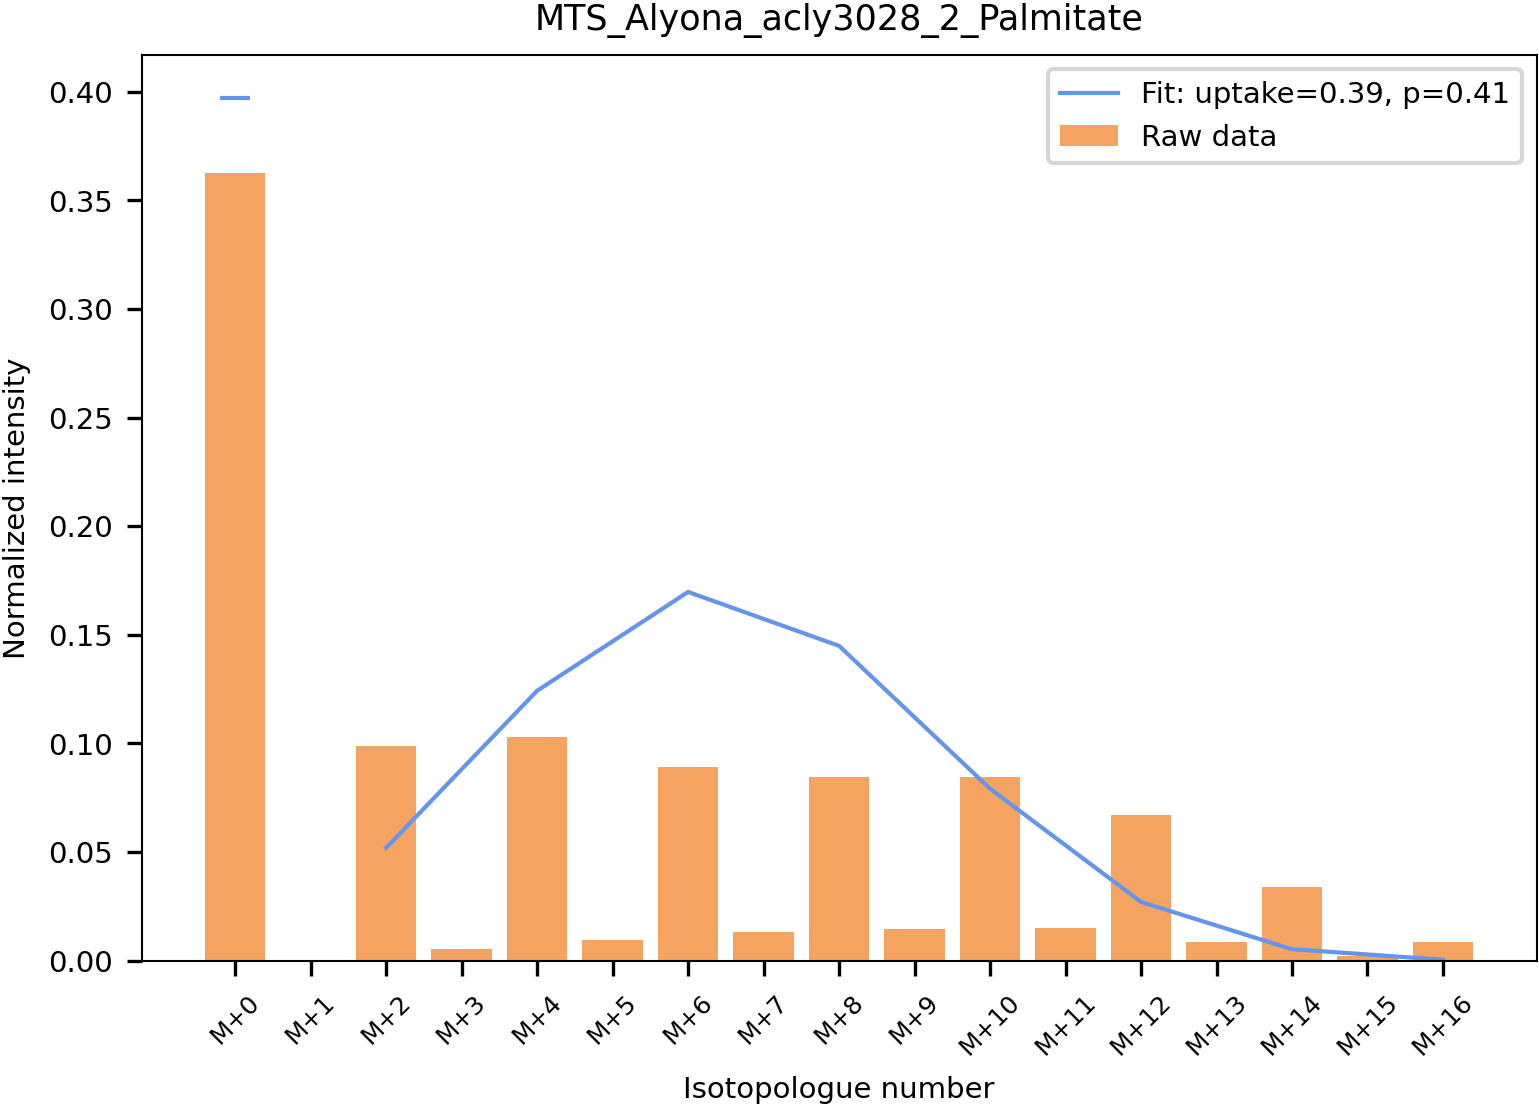

Palmitate MTS_Alyona_acly3028_3
[0.35948583 0.         0.10440812 0.00505464 0.10065831 0.01086031
 0.08535615 0.01481577 0.08558786 0.01493115 0.08513941 0.01509524
 0.06469577 0.00883672 0.03405908 0.00249499 0.00852065]
[0 1 2 3 4 5 6 7 8] 9 [0.3858636  0.40508107] True
Mean estimate 7.123520011710723, p 0.4452200007319202


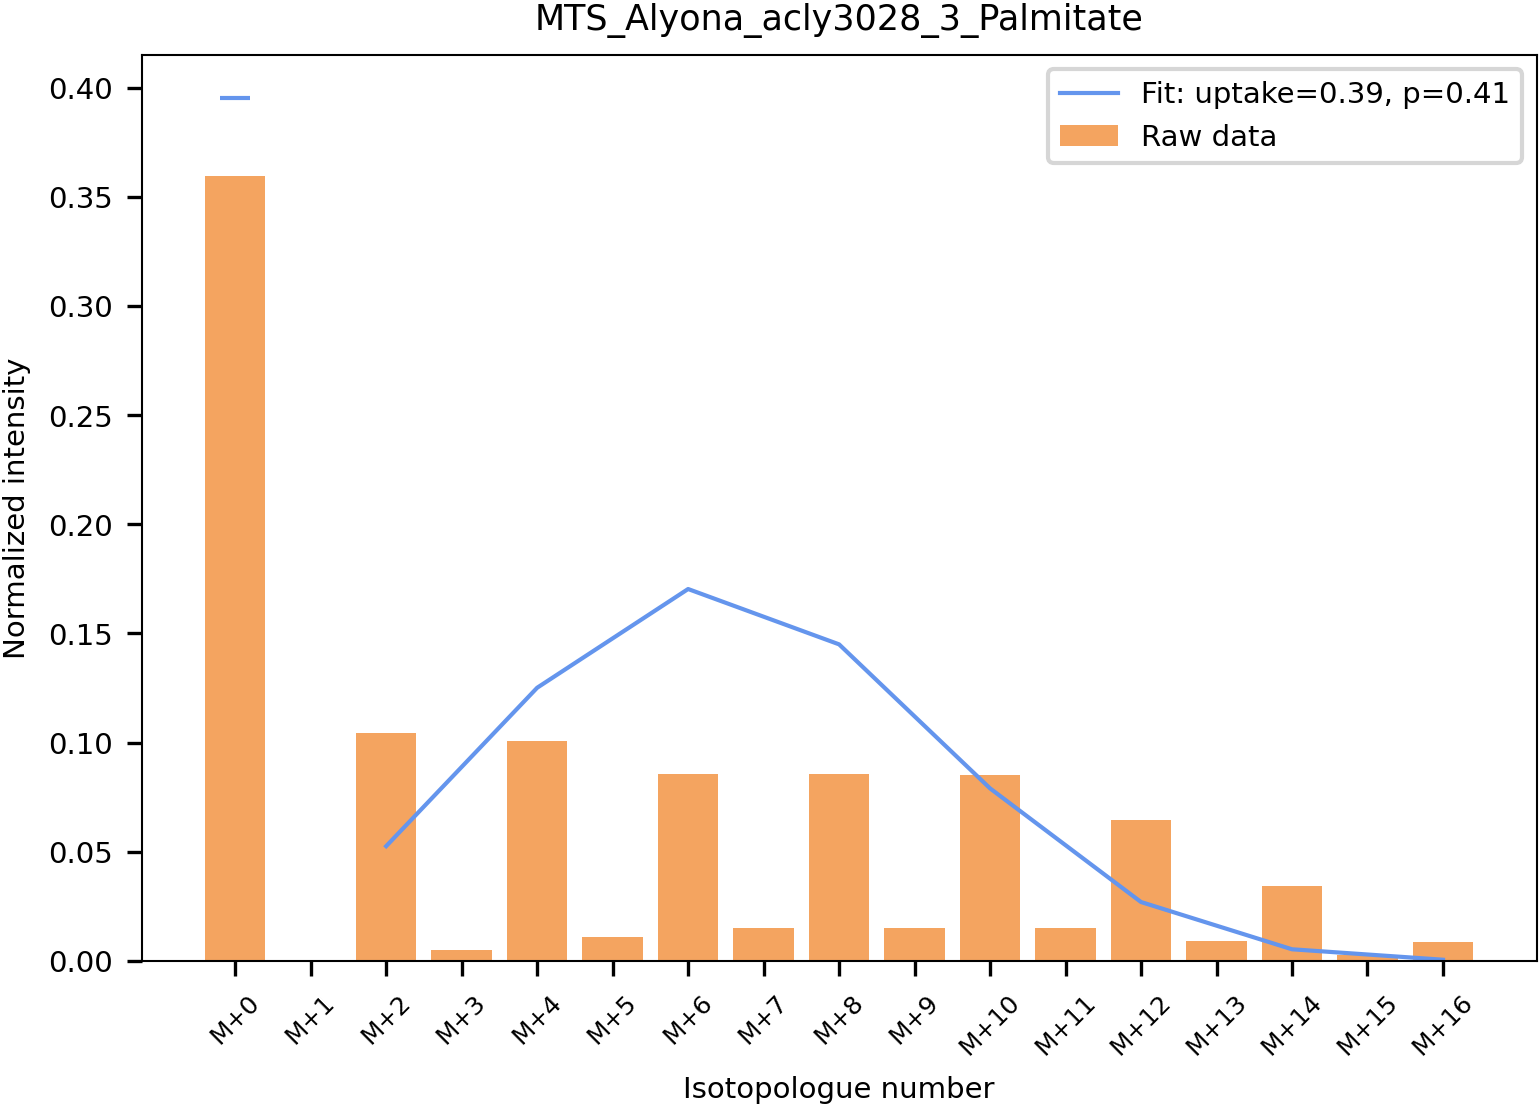

Palmitate MTS_Alyona_acly3028_etoh
[0.24499042 0.         0.0053609  0.00104362 0.01621257 0.0062504
 0.04831035 0.0174563  0.10197807 0.03038823 0.15843923 0.03827388
 0.16573919 0.02727232 0.09950567 0.00875746 0.03002139]
[0 1 2 3 4 5 6 7 8] 9 [0.27102849 0.66513729] True
Mean estimate 10.595088807340323, p 0.6621930504587702


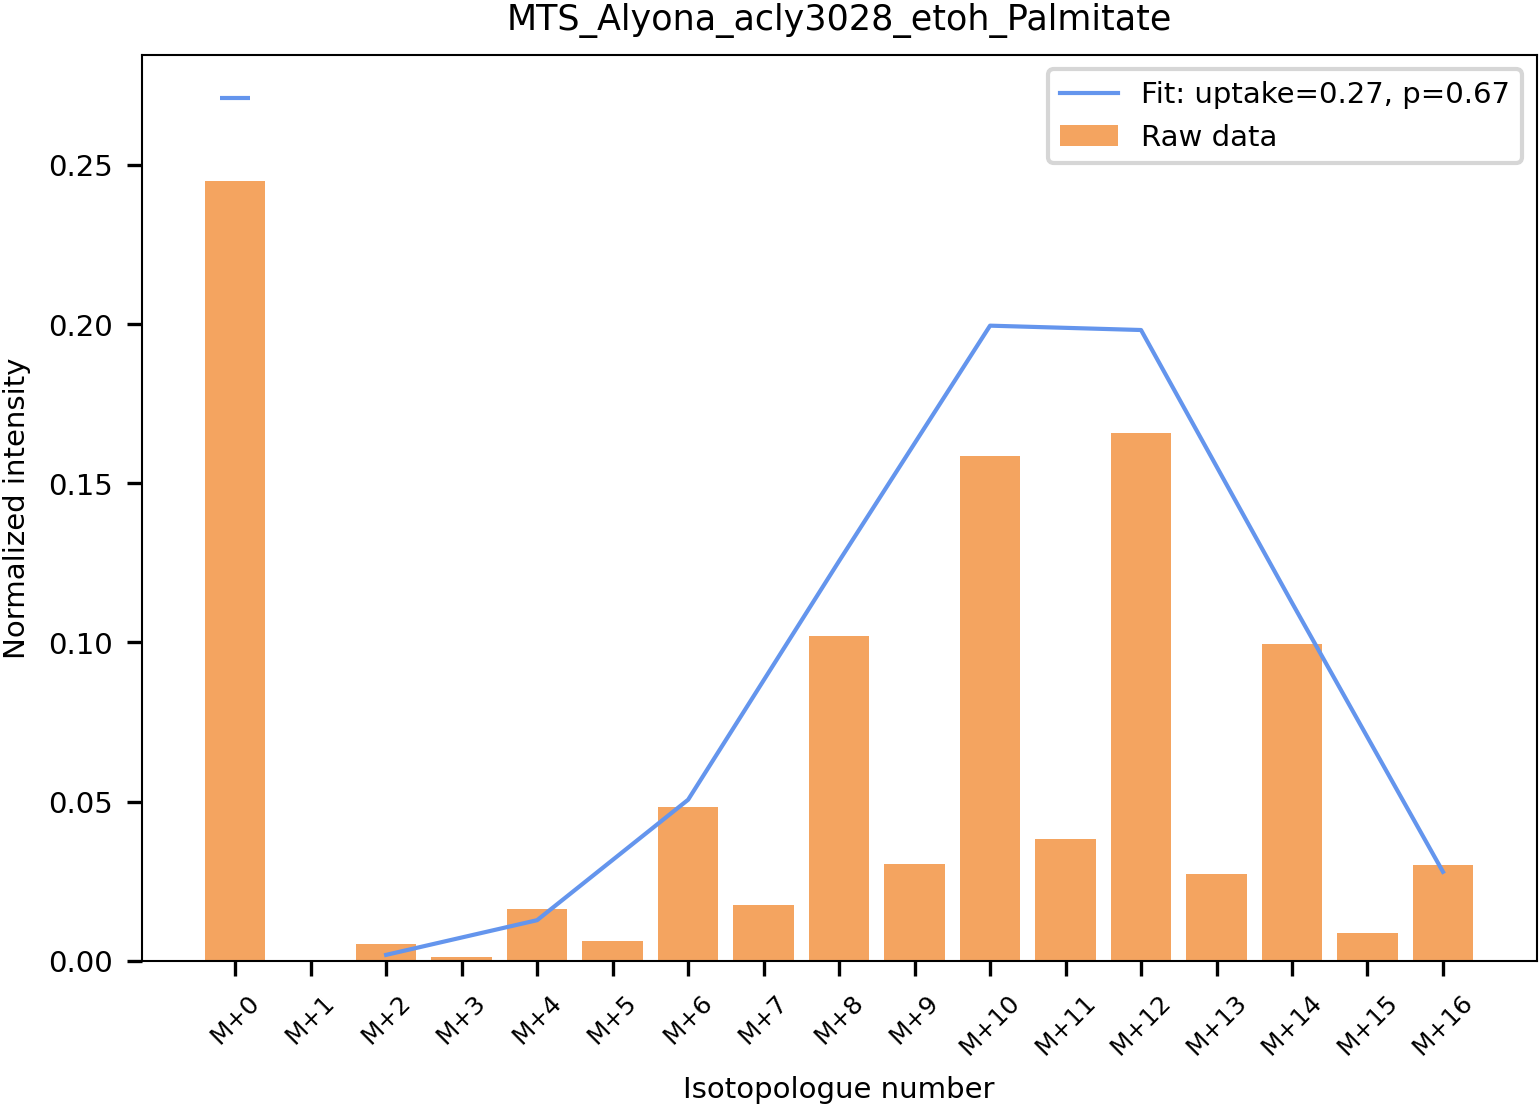

Palmitate MTS_Alyona_renilla_1
[0.29760603 0.         0.00156903 0.00113228 0.01099422 0.00460085
 0.03754345 0.01347658 0.09116475 0.02852988 0.15440737 0.0383124
 0.16243567 0.02758343 0.09442899 0.00834593 0.02786914]
[0 1 2 3 4 5 6 7 8] 9 [0.31947055 0.67201144] True
Mean estimate 10.790437979357788, p 0.6744023737098618


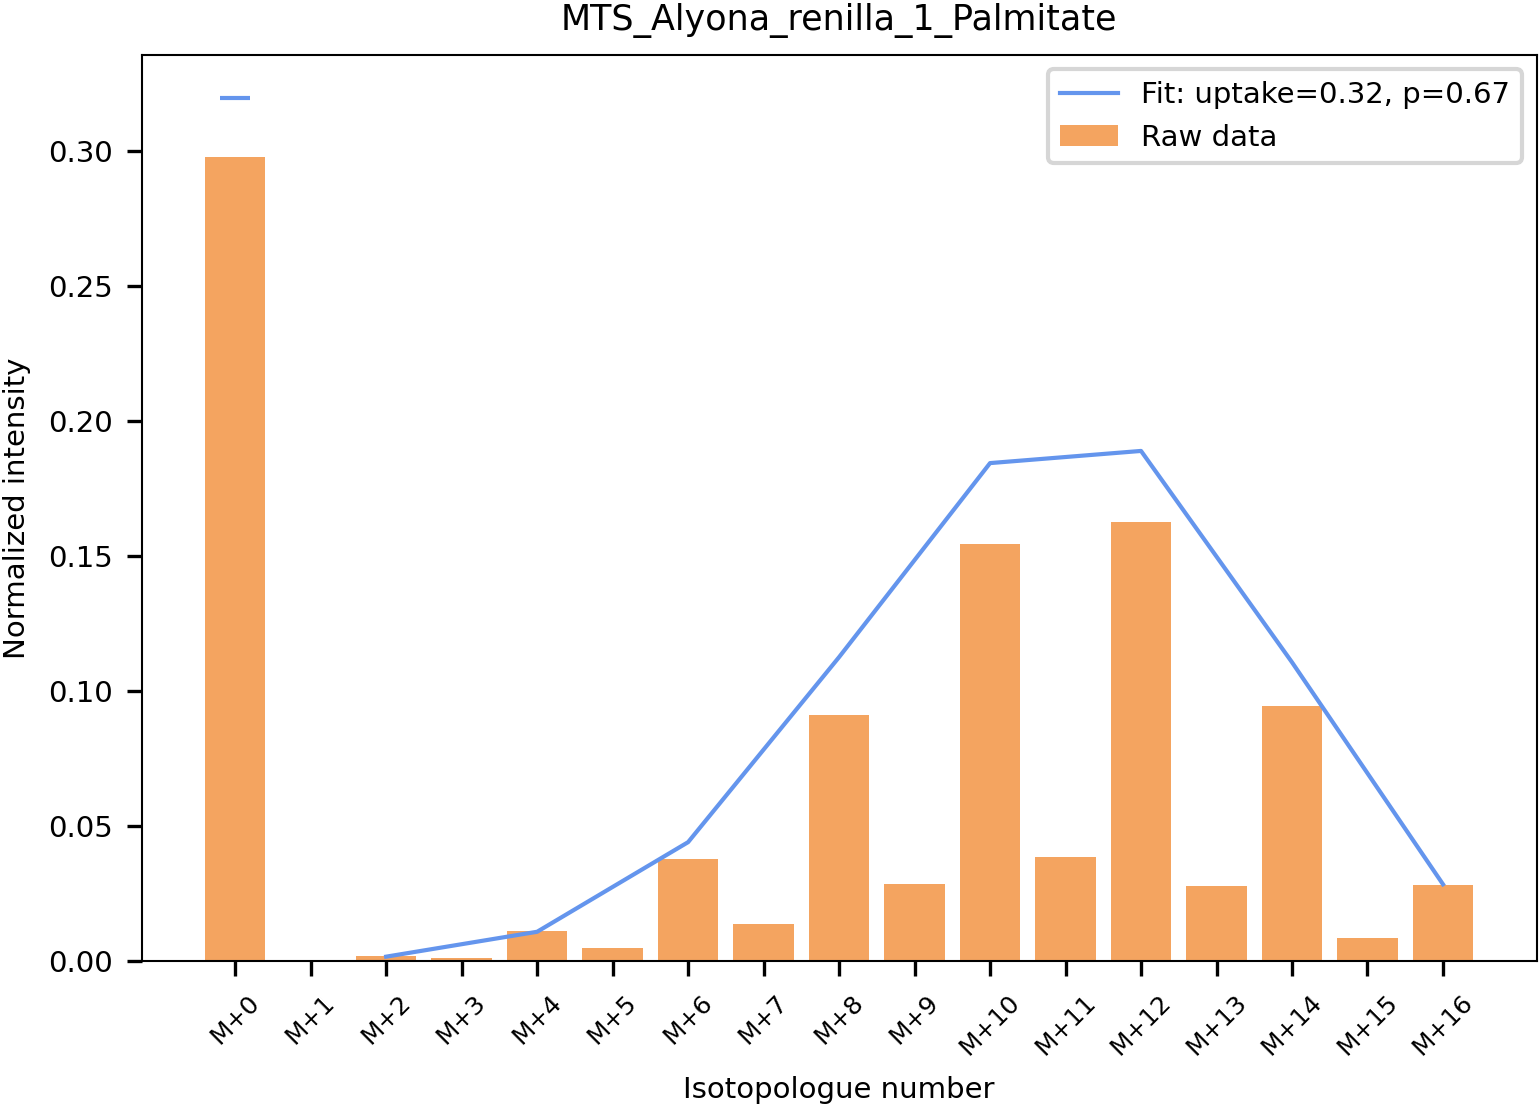

Palmitate MTS_Alyona_renilla_2
[0.31164533 0.         0.00196261 0.00091209 0.01041801 0.00459025
 0.04010001 0.01360307 0.09009607 0.02971852 0.15025491 0.03505519
 0.16016362 0.02402721 0.09222255 0.00807759 0.02715297]
[0 1 2 3 4 5 6 7 8] 9 [0.33281204 0.67105945] True
Mean estimate 10.757084389666838, p 0.6723177743541774


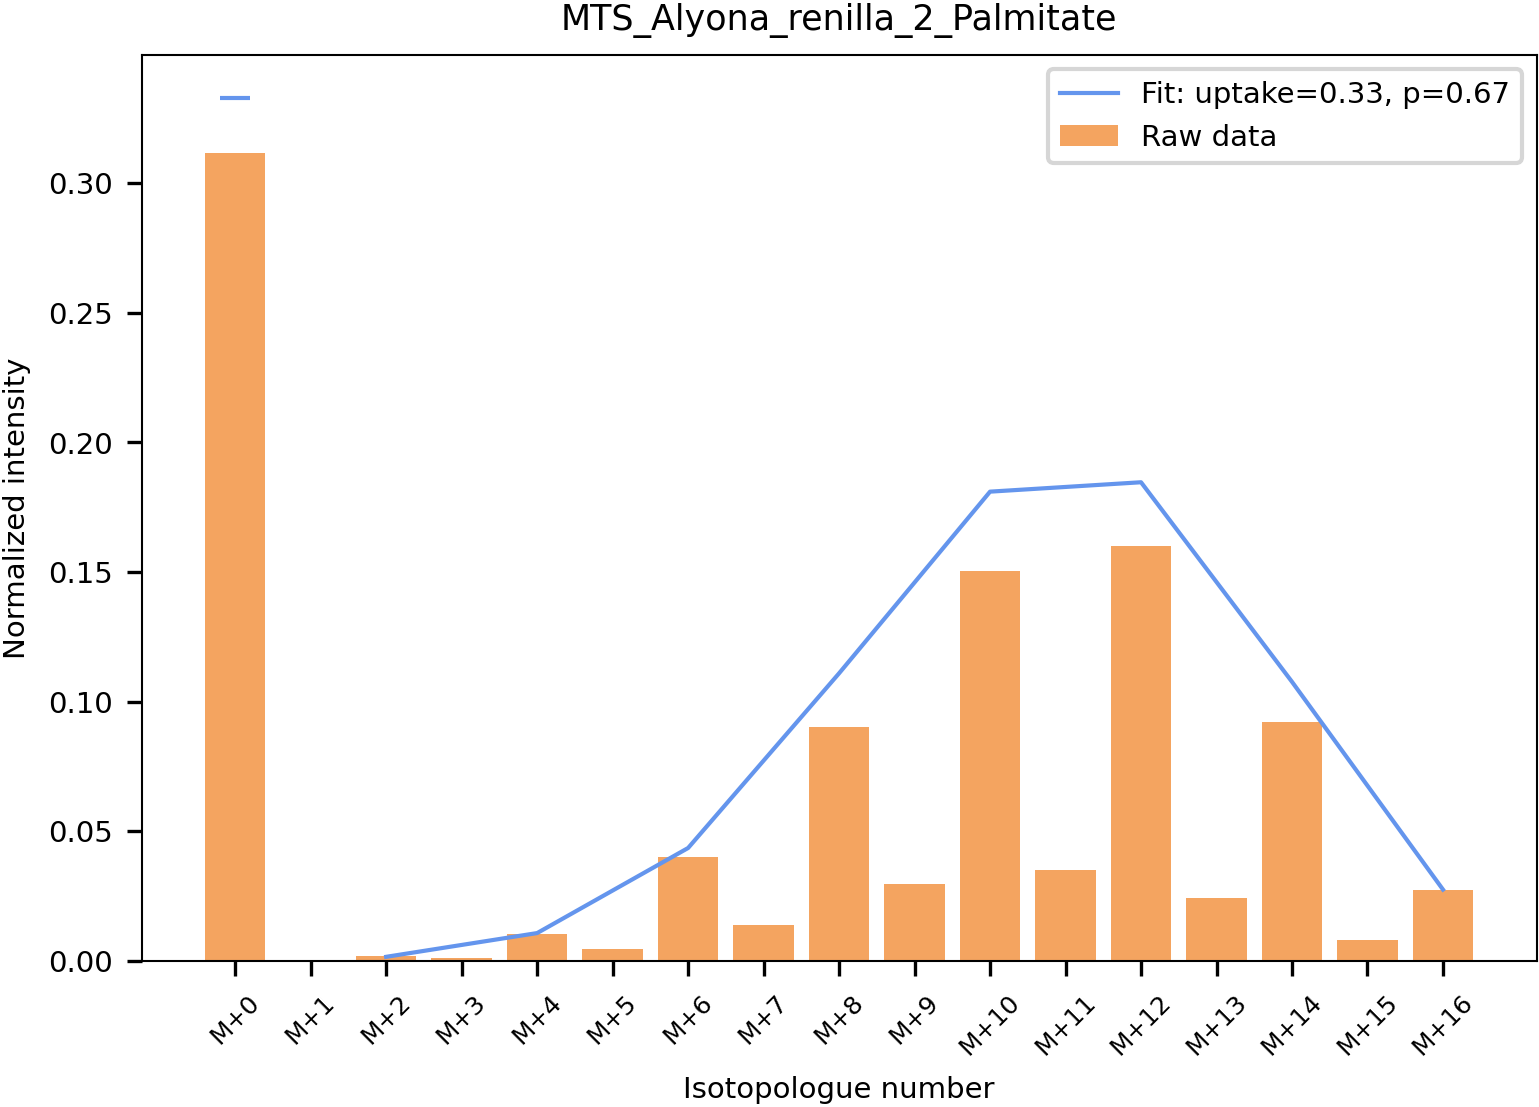

Palmitate MTS_Alyona_renilla_3
[0.3031468  0.         0.00278133 0.00077282 0.01176286 0.00453006
 0.04202261 0.01392695 0.08637833 0.0285992  0.14621224 0.03784487
 0.16467041 0.0254221  0.09720894 0.00854101 0.02617947]
[0 1 2 3 4 5 6 7 8] 9 [0.32566685 0.676361  ] True
Mean estimate 10.76501208443219, p 0.6728132552770119


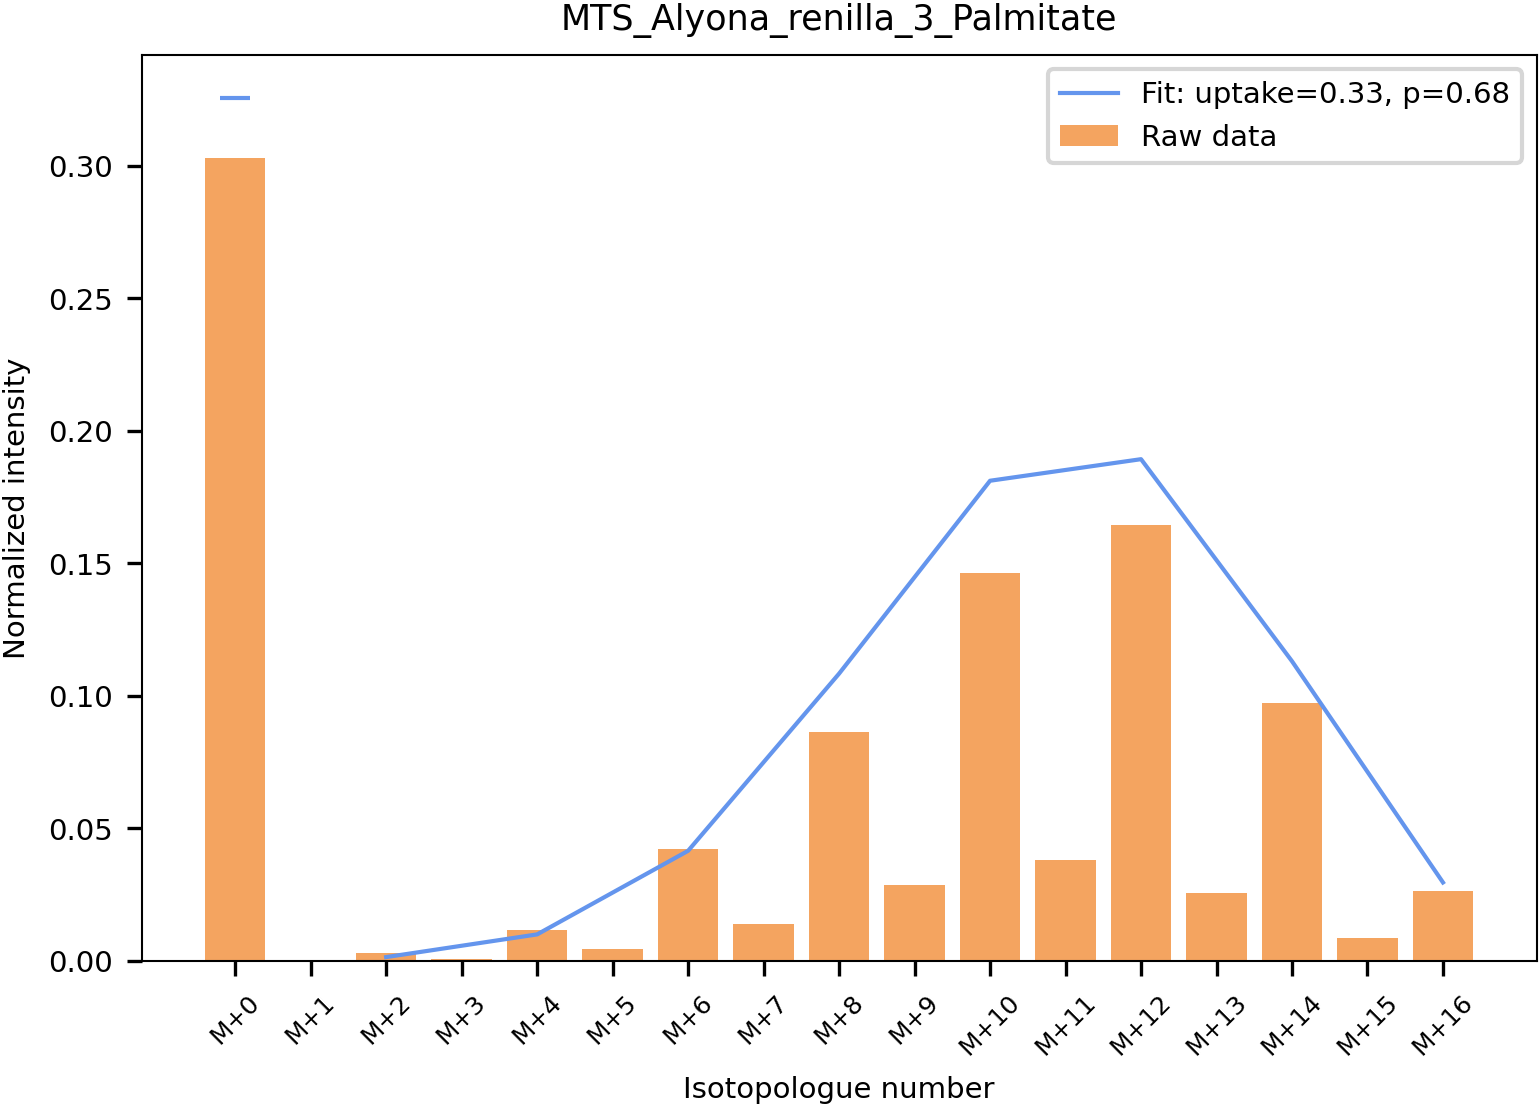

Palmitate MTS_Alyona_renilla_etoh
[0.28342082 0.         0.00267596 0.00070352 0.01127749 0.00420958
 0.04061316 0.0143087  0.09339949 0.03078141 0.15785011 0.03475125
 0.15880901 0.02619151 0.10129207 0.01018342 0.02953252]
[0 1 2 3 4 5 6 7 8] 9 [0.30633036 0.67154117] True
Mean estimate 10.775306460224817, p 0.6734566537640511


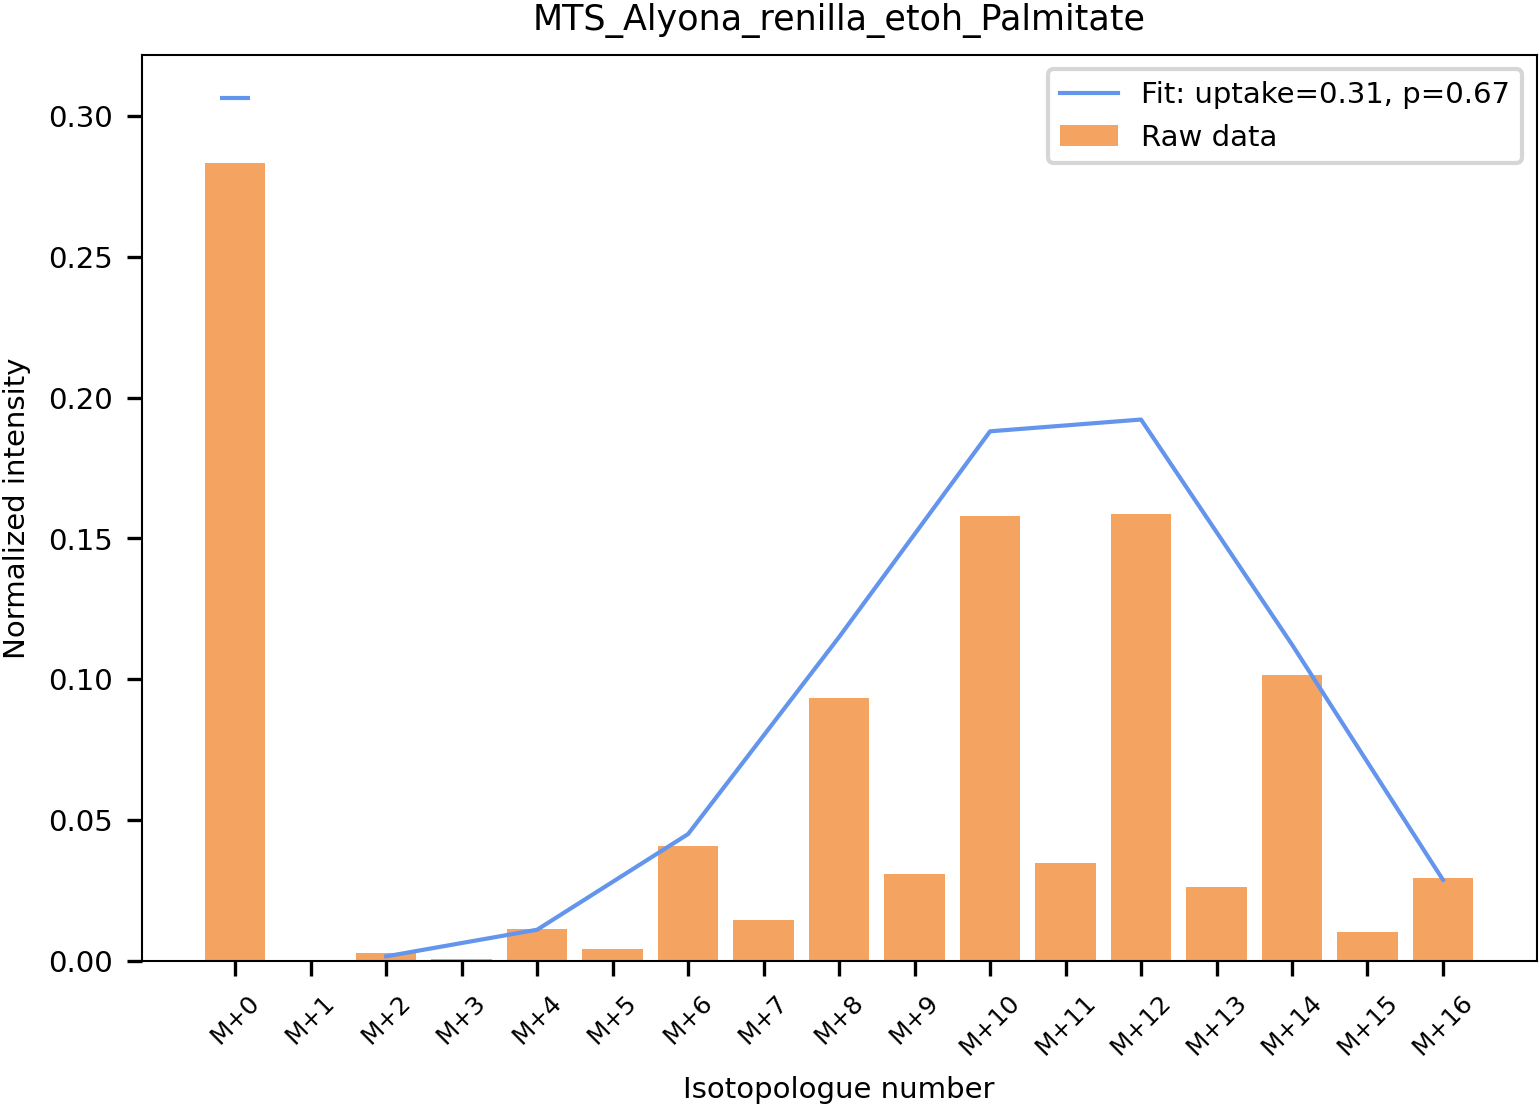

Palmitate MTS_Alyona_acly4080_1
[0.42817398 0.         0.02298598 0.00324383 0.05700063 0.00879475
 0.08401806 0.01390467 0.10575173 0.01655249 0.10824326 0.01430173
 0.07941394 0.00915599 0.0357858  0.0021169  0.01055626]
[0 1 2 3 4 5 6 7 8] 9 [0.44716387 0.5401326 ] True
Mean estimate 8.594240099006457, p 0.5371400061879036


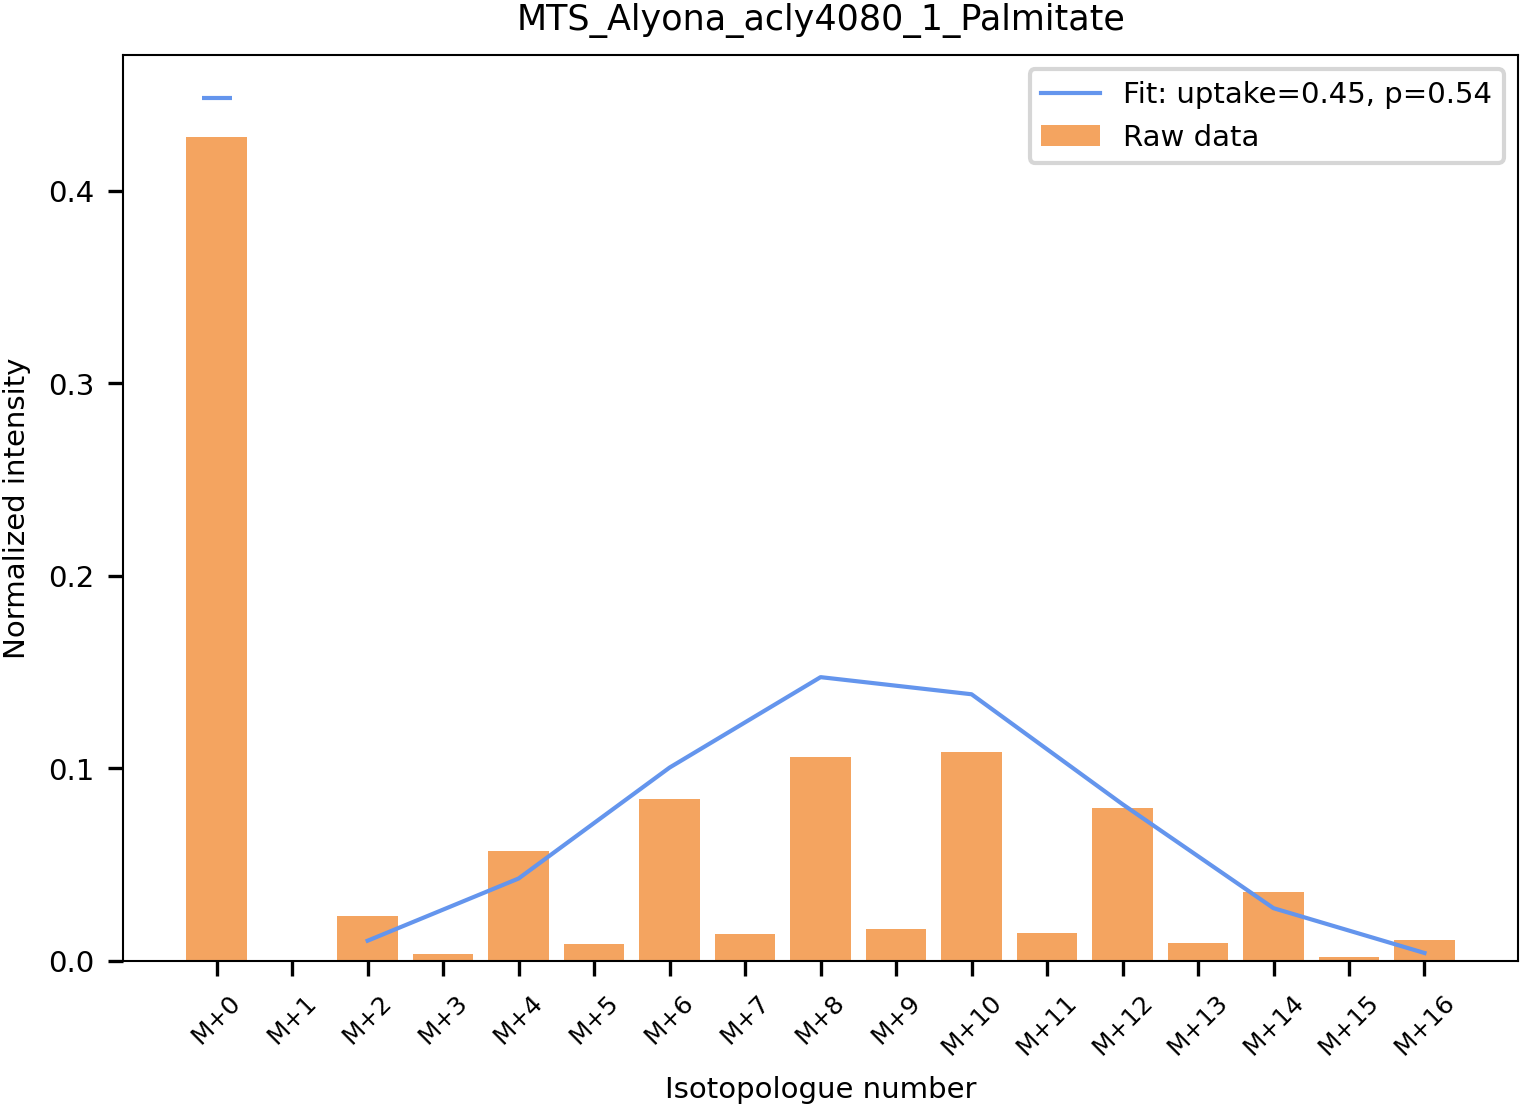

Palmitate MTS_Alyona_acly4080_2
[0.43137371 0.         0.0242136  0.00320451 0.05773183 0.00900697
 0.08712054 0.01353473 0.09973718 0.01711868 0.10544517 0.0161272
 0.07965665 0.00831973 0.03700765 0.00171804 0.00868381]
[0 1 2 3 4 5 6 7 8] 9 [0.45110227 0.5375886 ] True
Mean estimate 8.54160195768003, p 0.5338501223550018


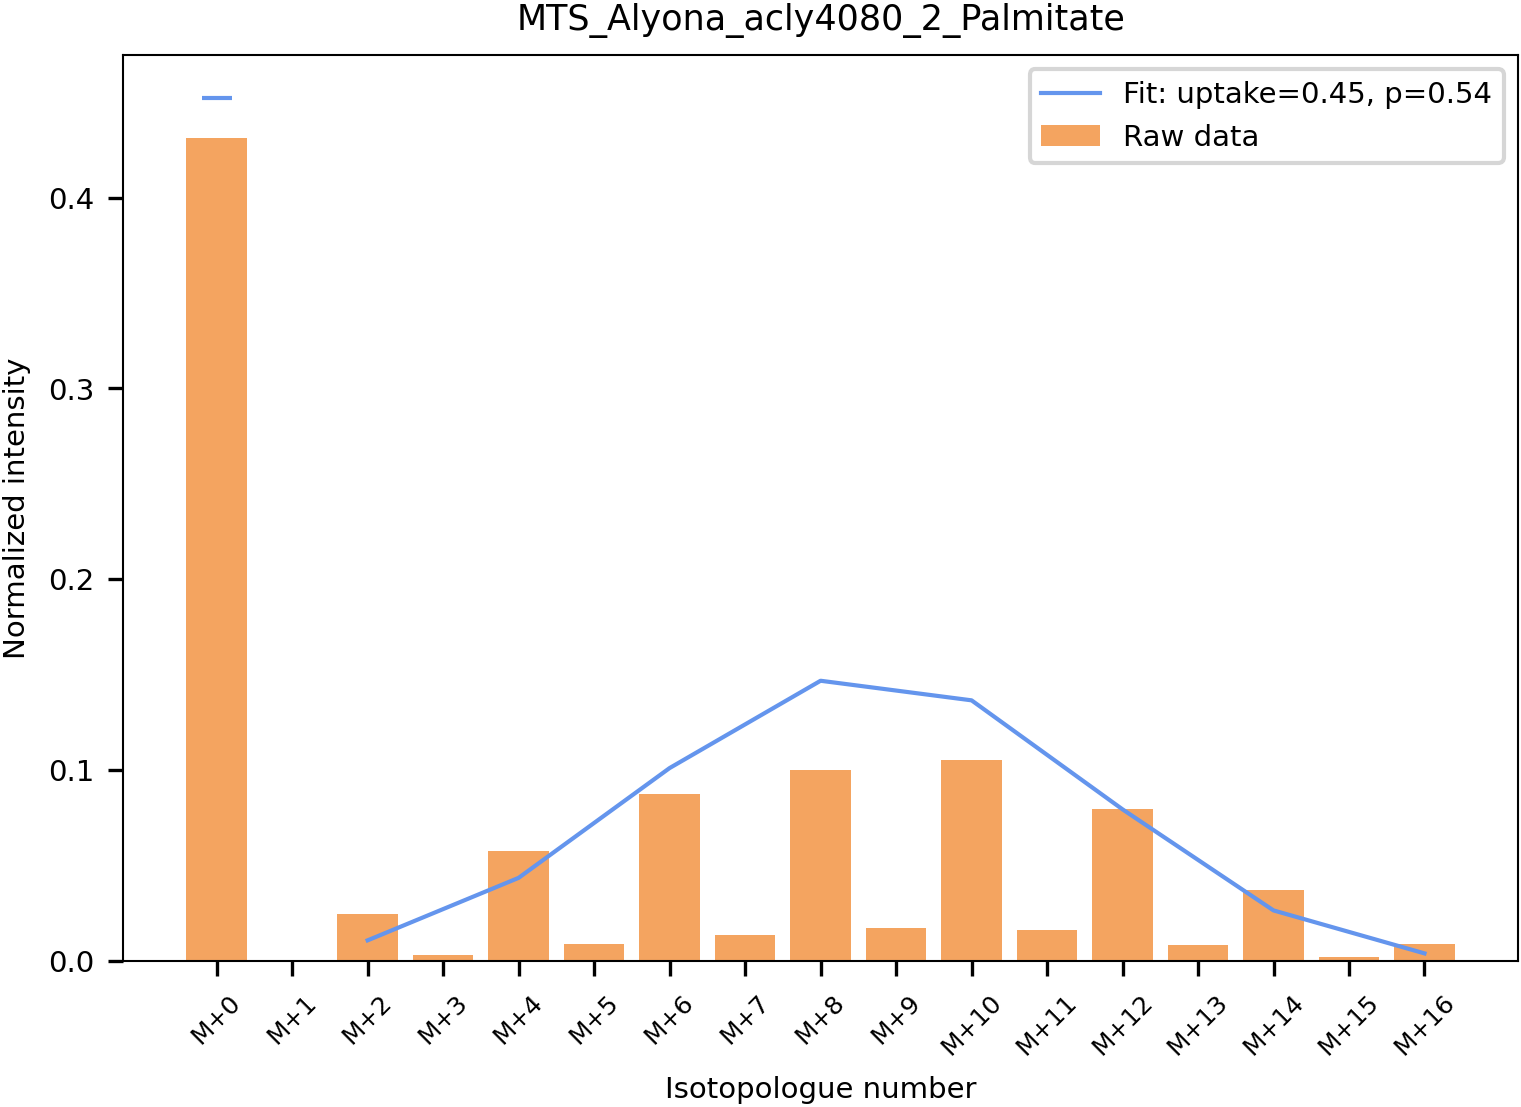

Palmitate MTS_Alyona_acly4080_3
[0.43936742 0.         0.02478872 0.00282669 0.05534906 0.00687085
 0.08465824 0.01415208 0.10141306 0.01813557 0.10445082 0.0163733
 0.0740267  0.00752299 0.04001098 0.00210519 0.00794835]
[0 1 2 3 4 5 6 7 8] 9 [0.4586891  0.53650673] True
Mean estimate 8.546467973567493, p 0.5341542483479683


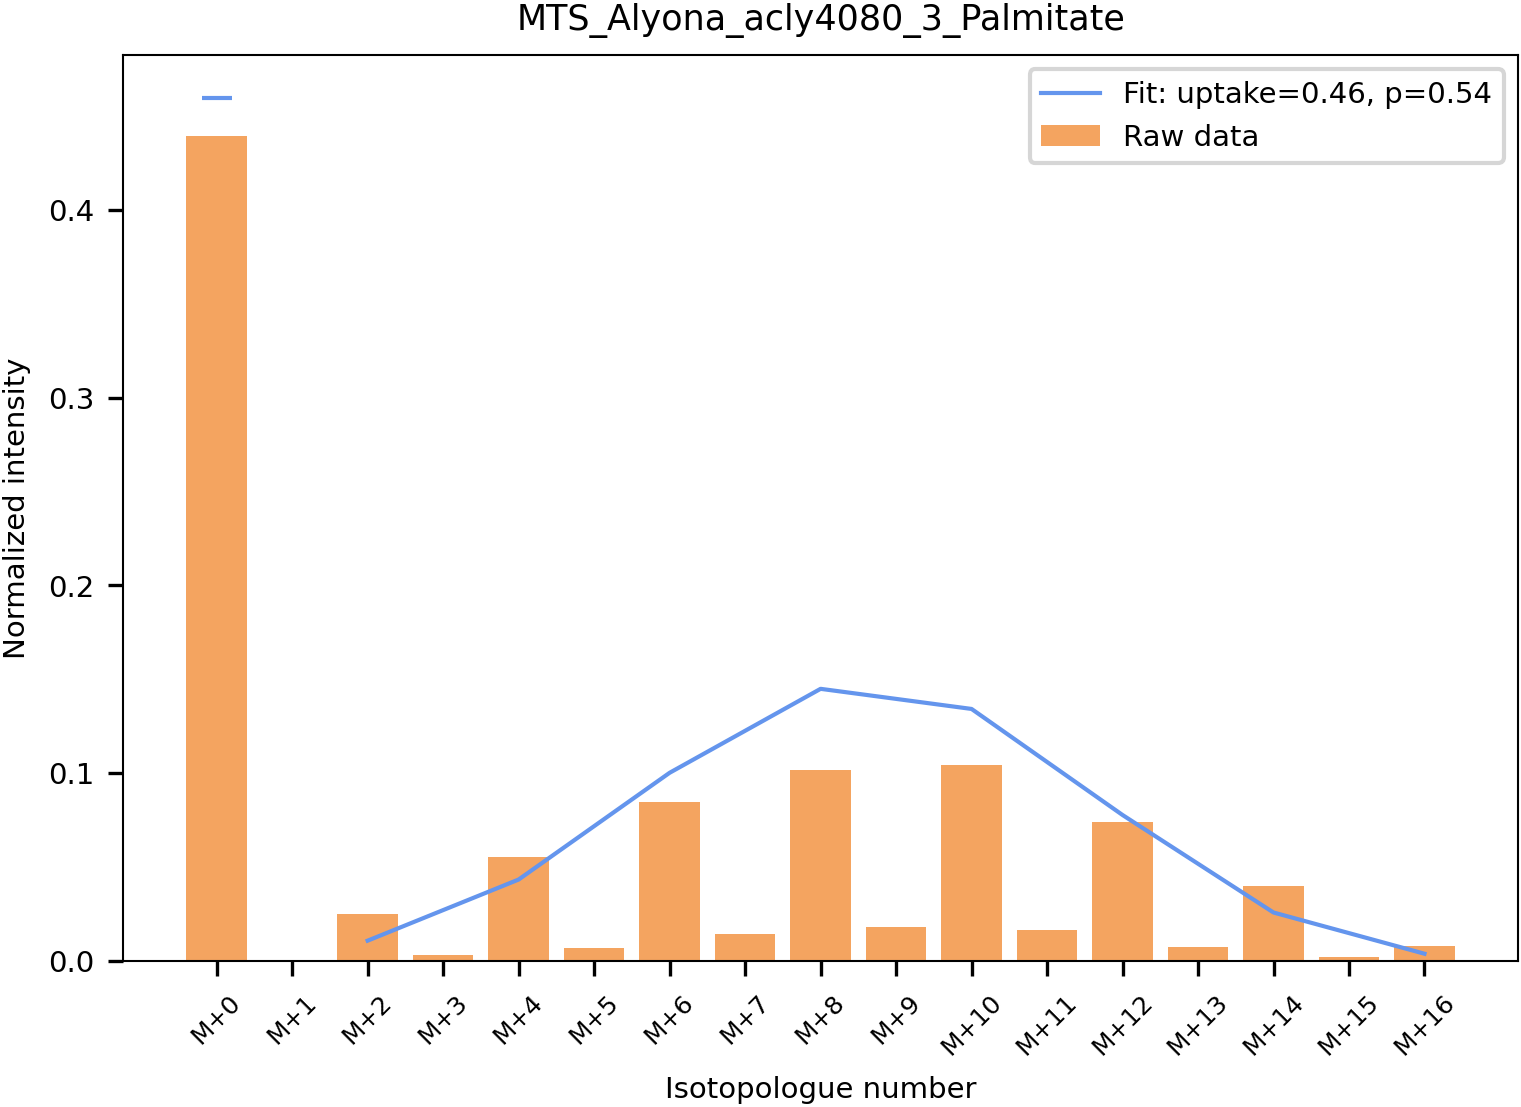

Palmitate MTS_Alyona_acly4080_etoh
[0.34415975 0.         0.00347621 0.00041522 0.01286036 0.00372804
 0.03995748 0.01196804 0.08977706 0.02635694 0.14459981 0.03262834
 0.14540519 0.02404471 0.0890845  0.00740694 0.02413139]
[0 1 2 3 4 5 6 7 8] 9 [0.36458678 0.66562161] True
Mean estimate 10.63277761980805, p 0.6645486012380031


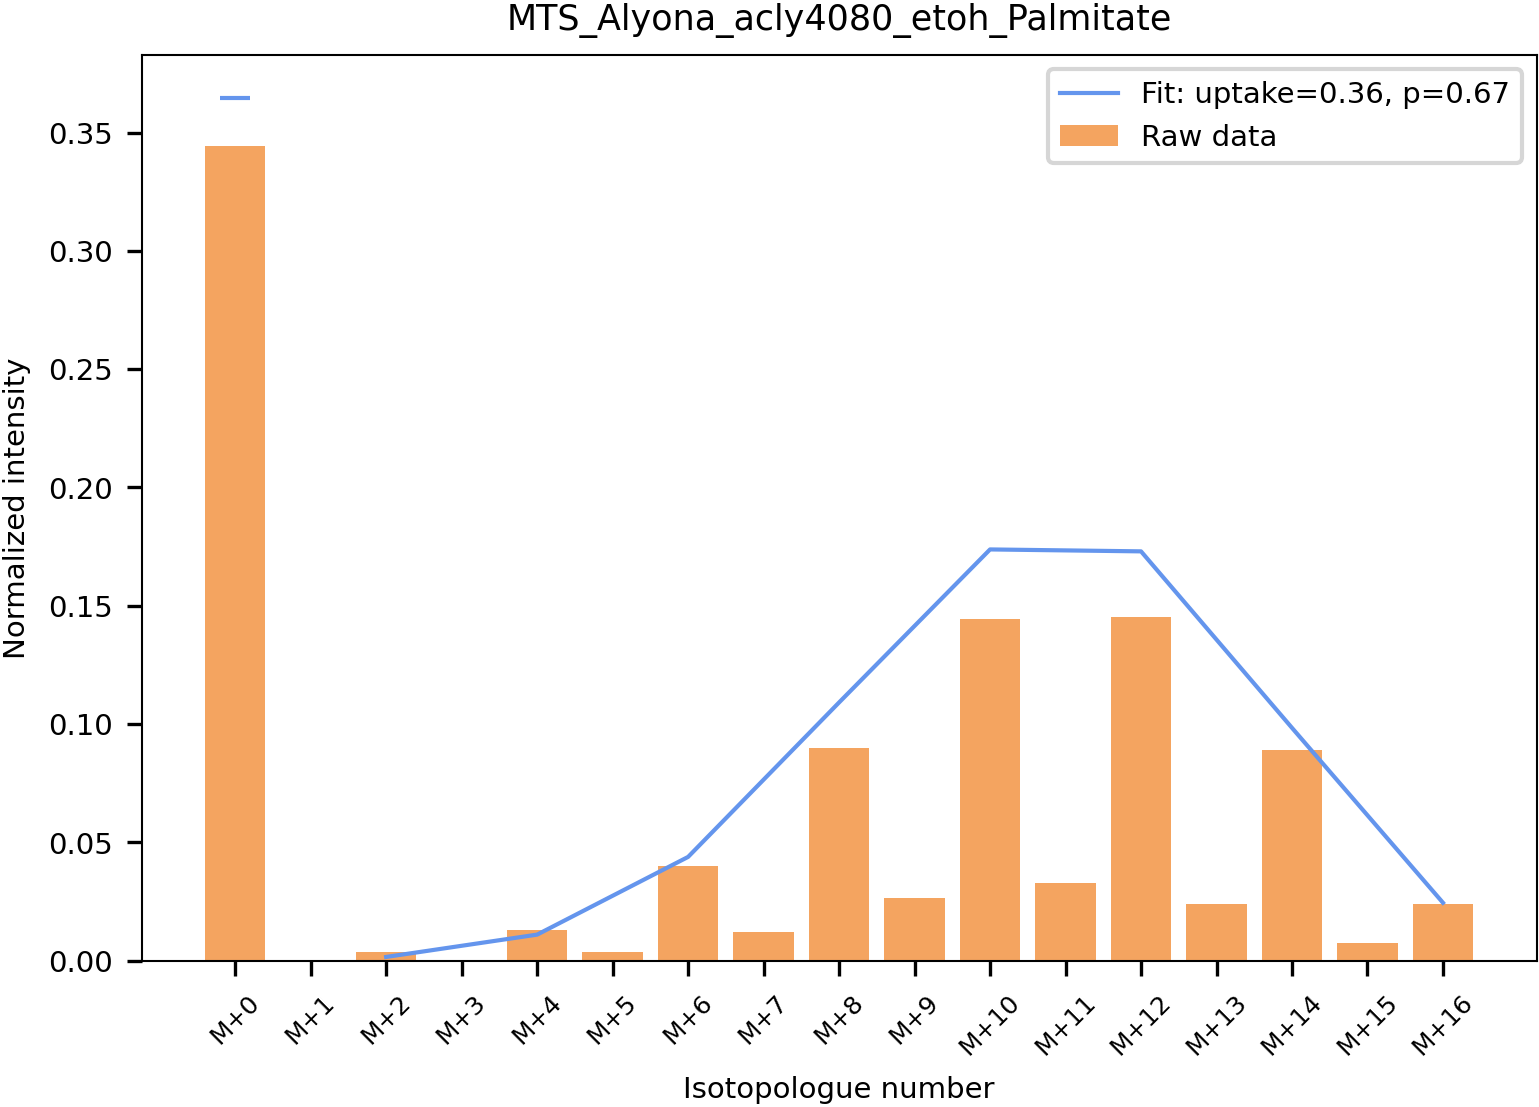

Palmitate MTS_Blank_01
[9.99251823e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.50000000e-14
 2.51000000e-12 7.85000000e-11 0.00000000e+00 0.00000000e+00
 7.48176611e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[0 1 2 3 4 5 6 7 8] 9 [0.99927285 0.55555602] True
Mean estimate 11.99839630155704, p 0.749899768847315


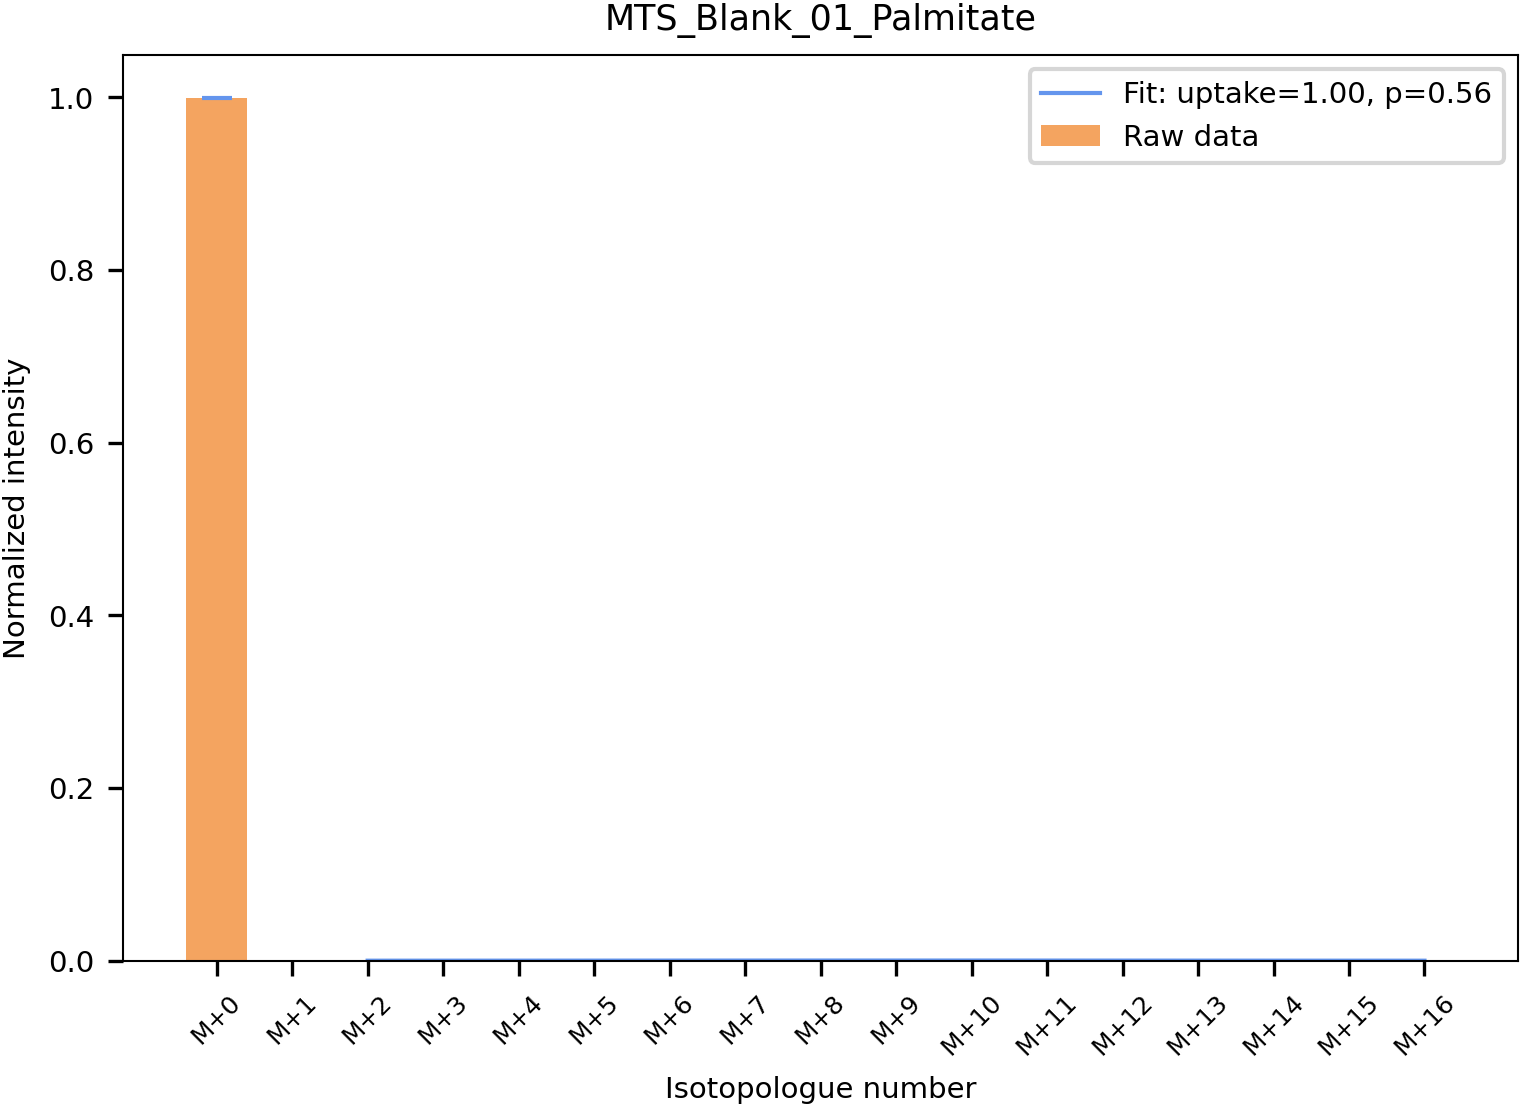

Palmitate MTS_Blank_02
[9.79015211e-01 1.54843458e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.85000000e-11 5.77000000e-10 0.00000000e+00 0.00000000e+00
 5.50044289e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[0 1 2 3 4 5 6 7 8] 9 [0.98141976 0.71437782] True
Mean estimate 11.999781826263371, p 0.7499863641414607


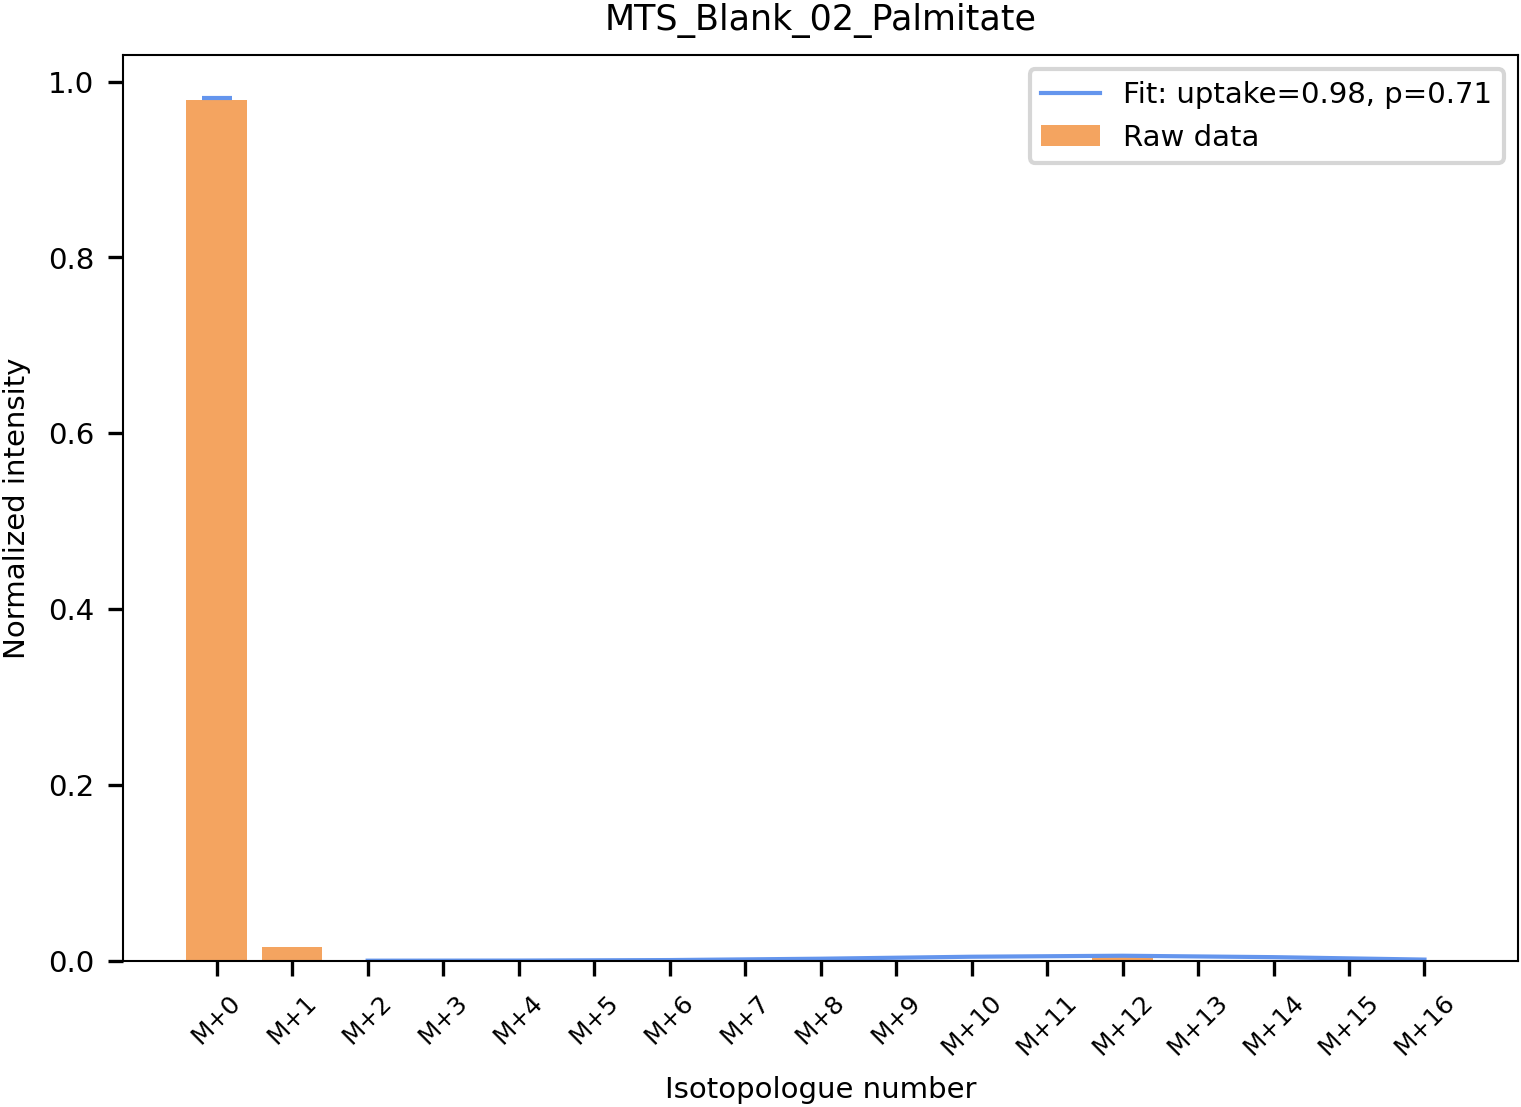

Palmitate MTS_Blank_03
[0.98879247 0.01120753 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
[0 1 2 3 4 5 6 7 8] 9 [0.99061647 0.52101526] True
Mean estimate 0.0, p 0.0


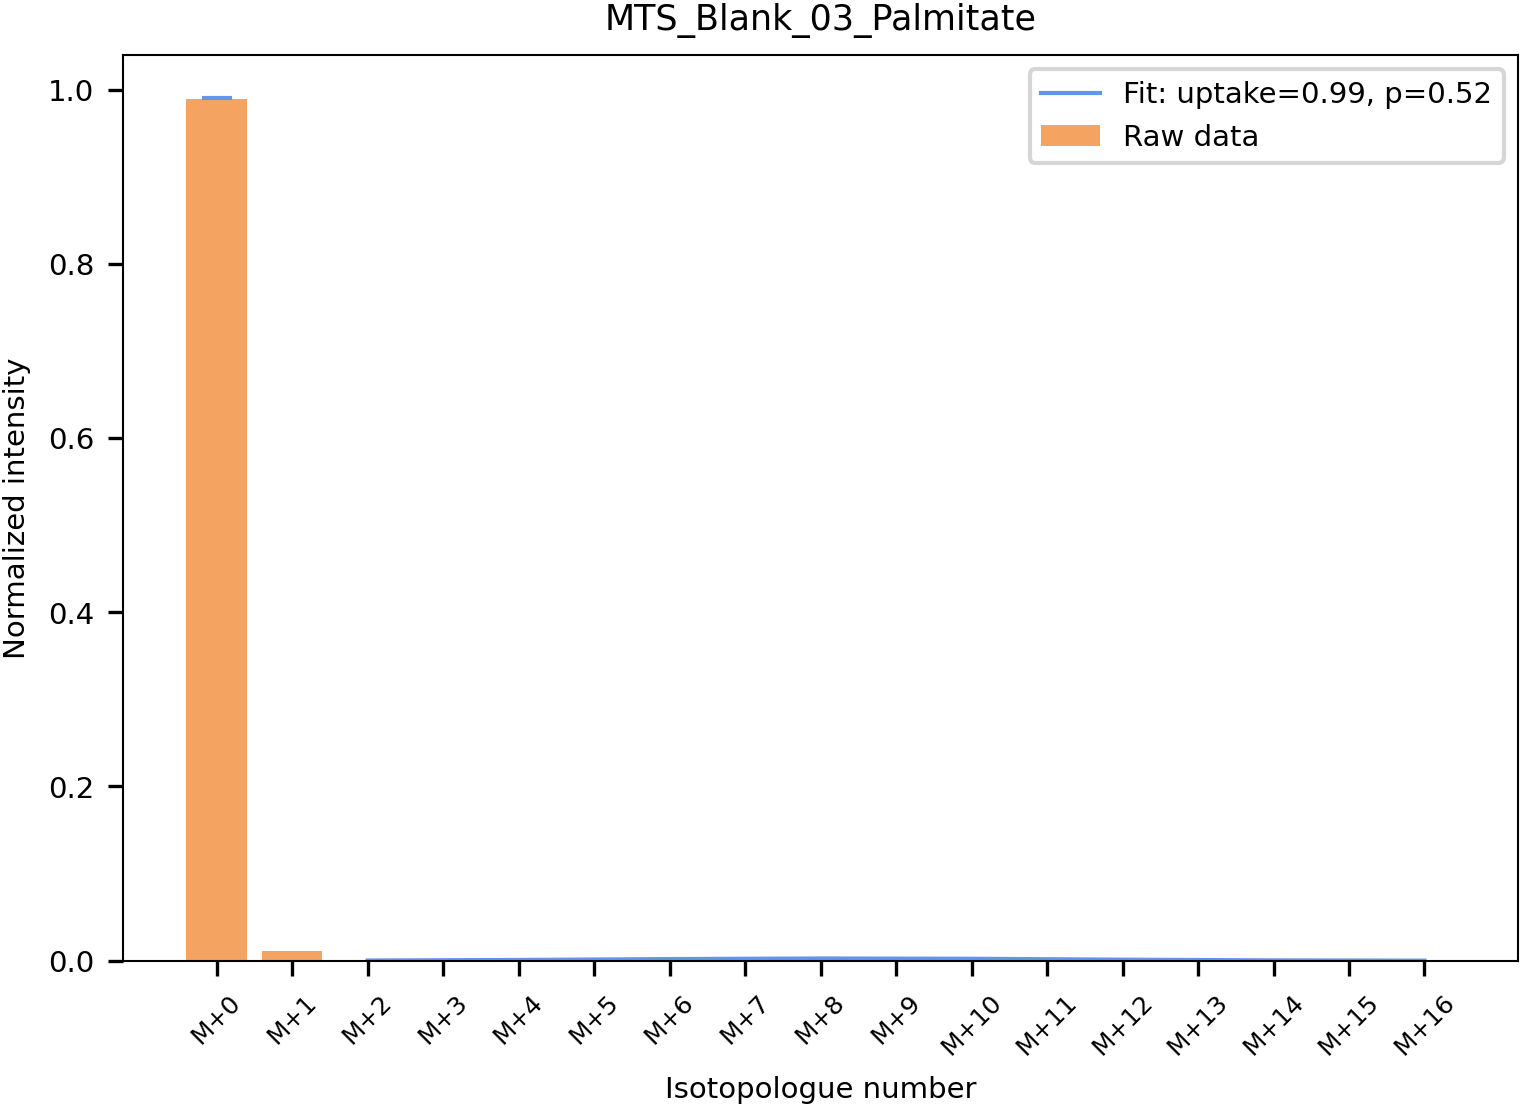

Palmitate MTS_Blank_04
[0.67118345 0.         0.00175705 0.         0.01426107 0.
 0.03937555 0.00426218 0.06091715 0.00691393 0.05522096 0.03121316
 0.0509458  0.00844366 0.04642169 0.         0.00908435]
[0 1 2 3 4 5 6 7 8] 9 [0.68439292 0.60222496] True
Mean estimate 9.867345375896907, p 0.6167090859935567


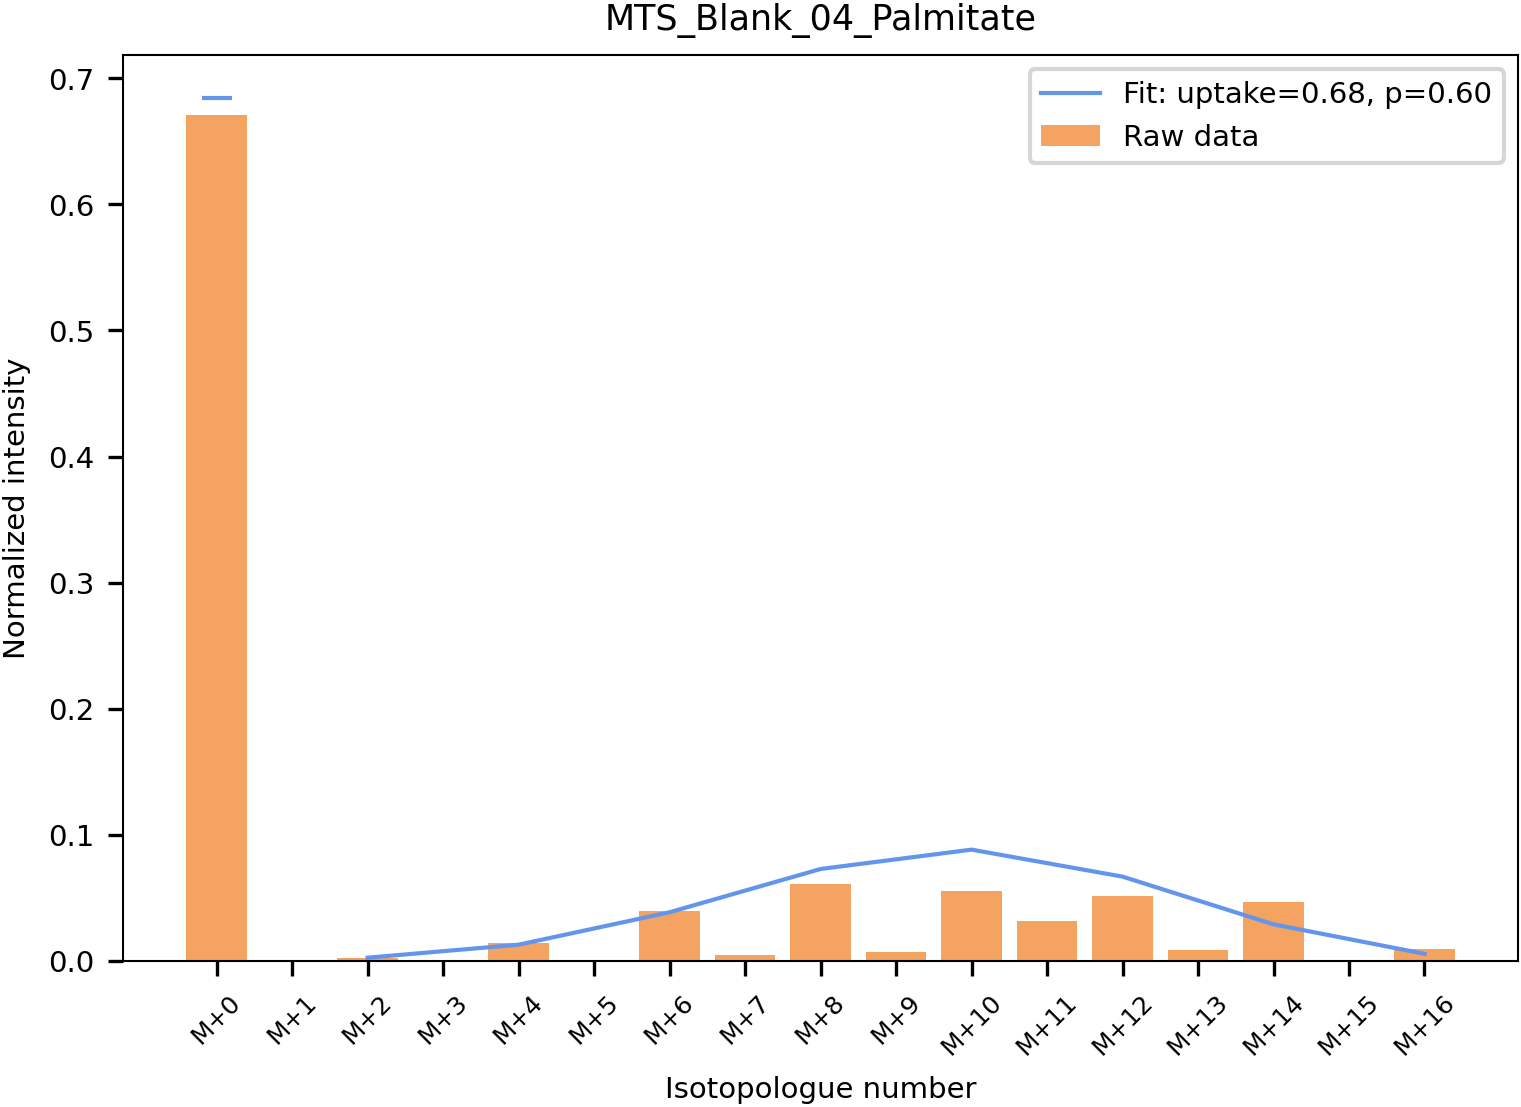

Palmitate MTS_Blank_05
[0.67607178 0.         0.00258439 0.         0.0122432  0.
 0.01441933 0.0059305  0.0598102  0.00573246 0.07789745 0.01548943
 0.06060038 0.00988447 0.0502323  0.         0.00910411]
[0 1 2 3 4 5 6 7 8] 9 [0.68397697 0.64681838] True
Mean estimate 10.367112748629753, p 0.6479445467893595


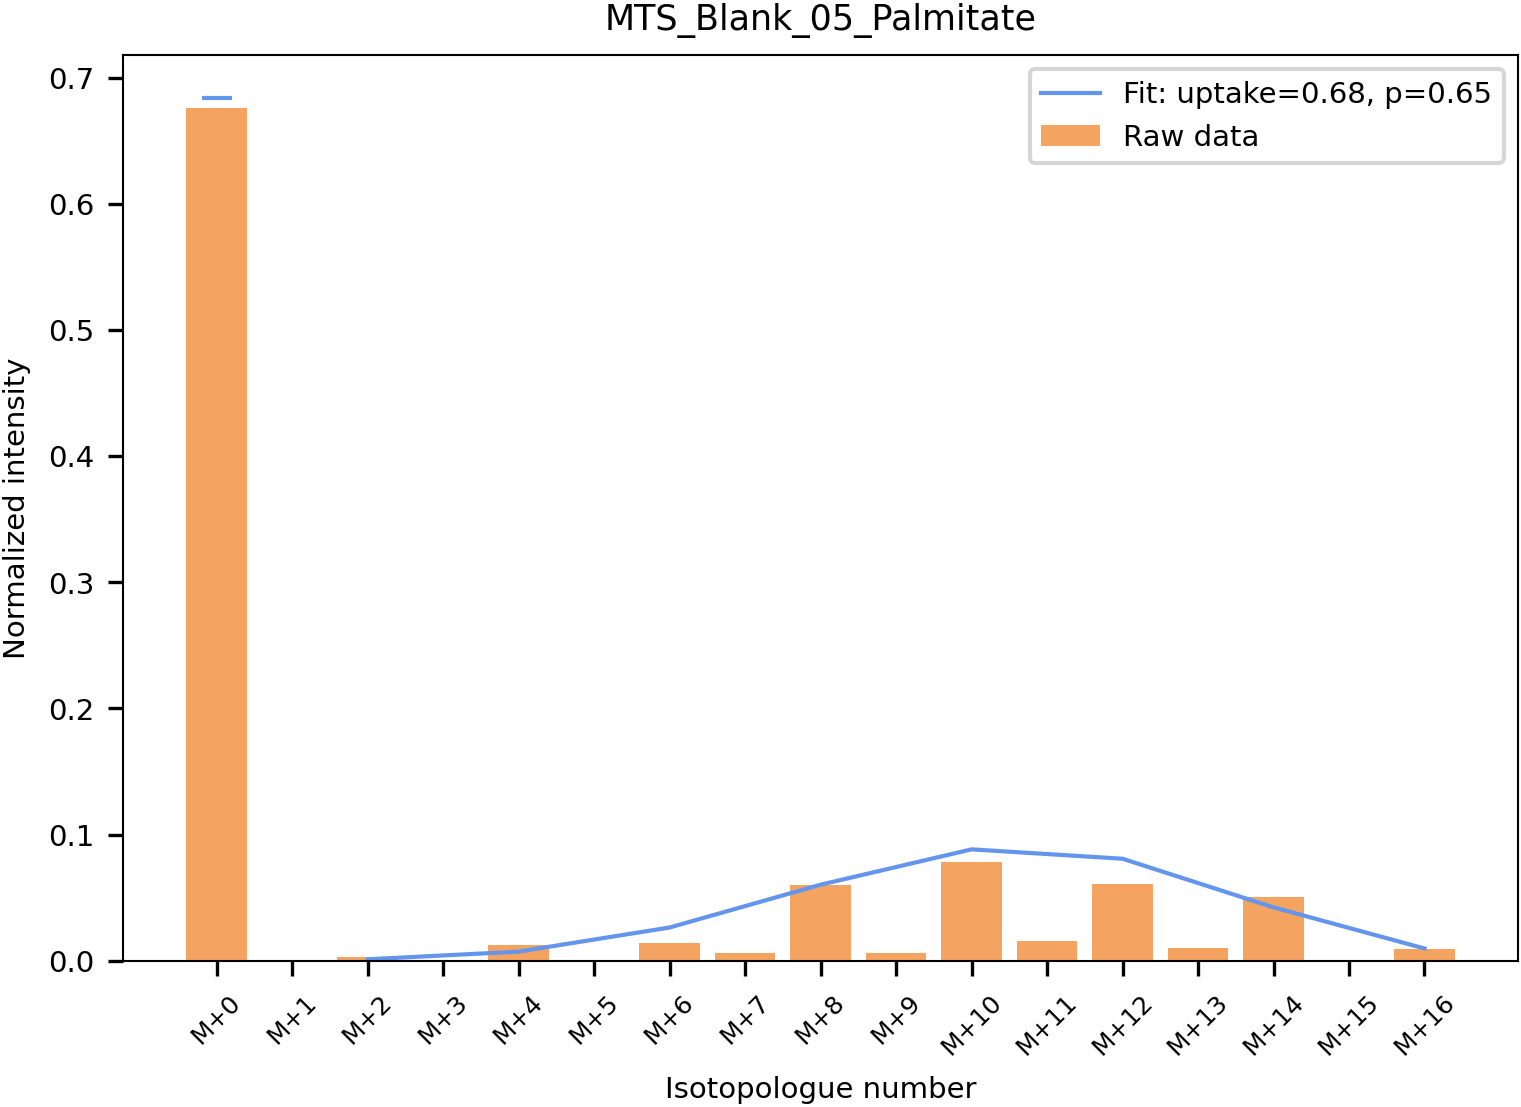

Palmitate MTS_Blank_06
[0.62005106 0.00254139 0.02803926 0.         0.03057684 0.00416057
 0.05079104 0.00615076 0.05977389 0.00709894 0.05440987 0.01672936
 0.05379242 0.00681213 0.04872534 0.         0.01034712]
[0 1 2 3 4 5 6 7 8] 9 [0.63881647 0.56756782] True
Mean estimate 8.912430384884113, p 0.557026899055257


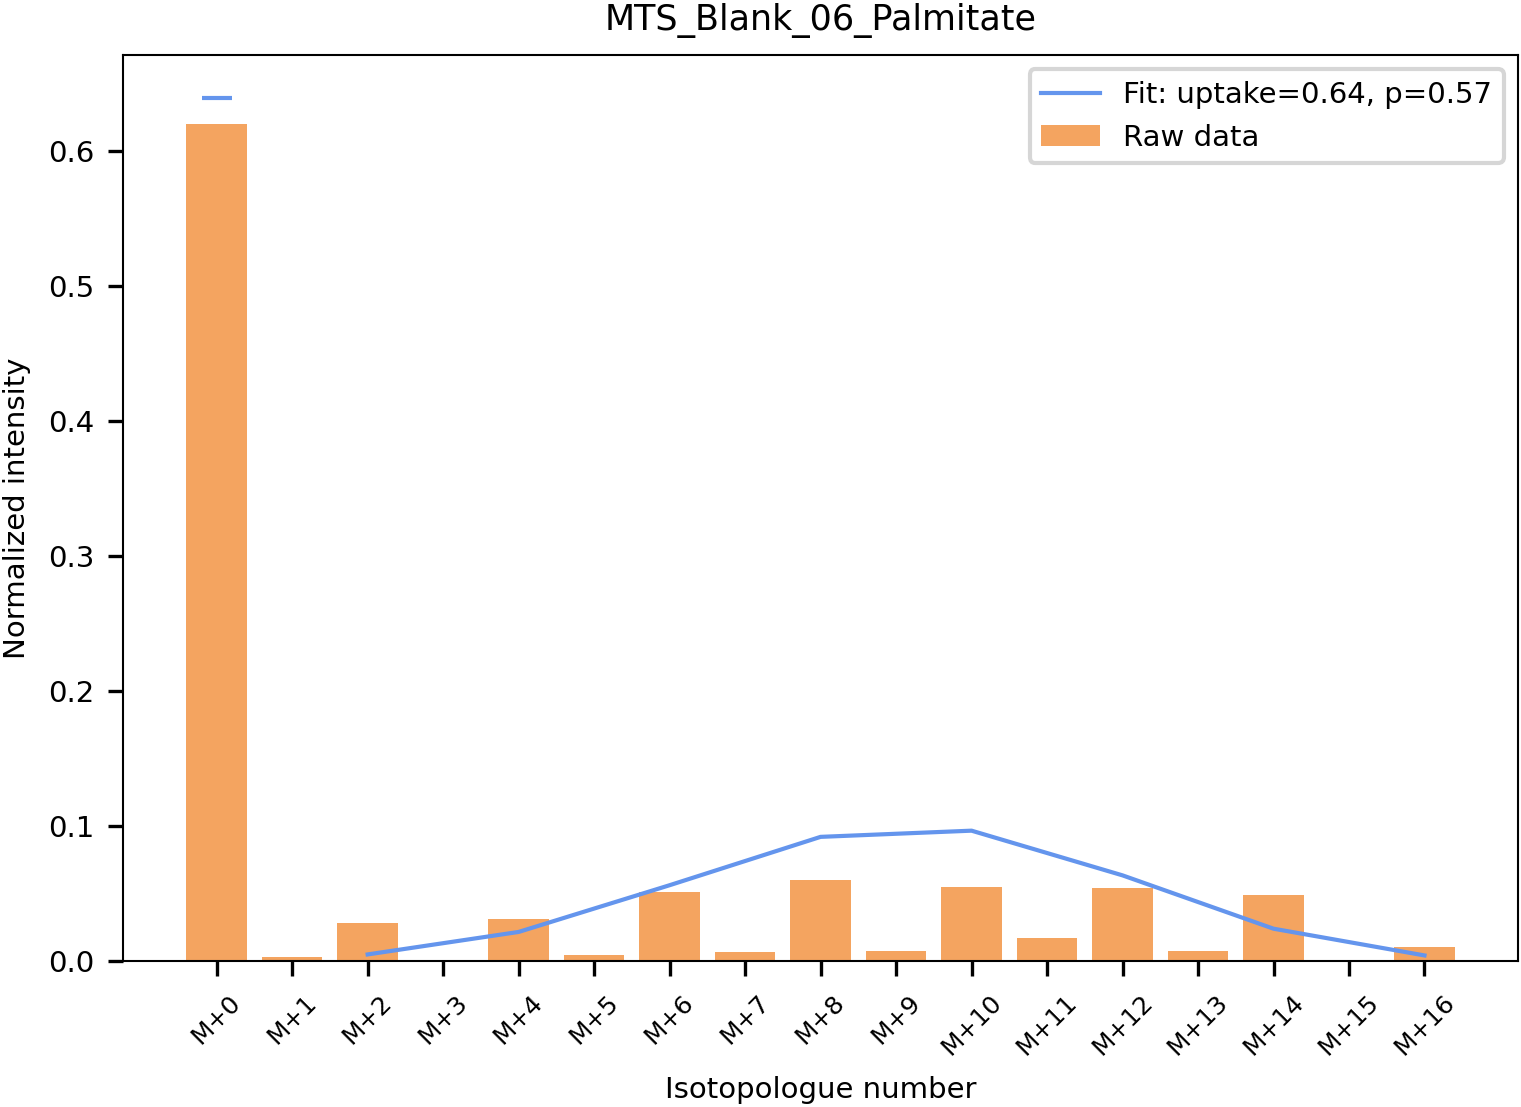

Palmitate MTS_Blank_07
[0.67061526 0.         0.00563086 0.         0.03598651 0.
 0.03890491 0.00464173 0.04983488 0.01407243 0.04652342 0.01051532
 0.04942038 0.01207558 0.05252448 0.         0.00925424]
[0 1 2 3 4 5 6 7 8] 9 [0.68717951 0.60290596] True
Mean estimate 9.473089599953372, p 0.5920680999970858


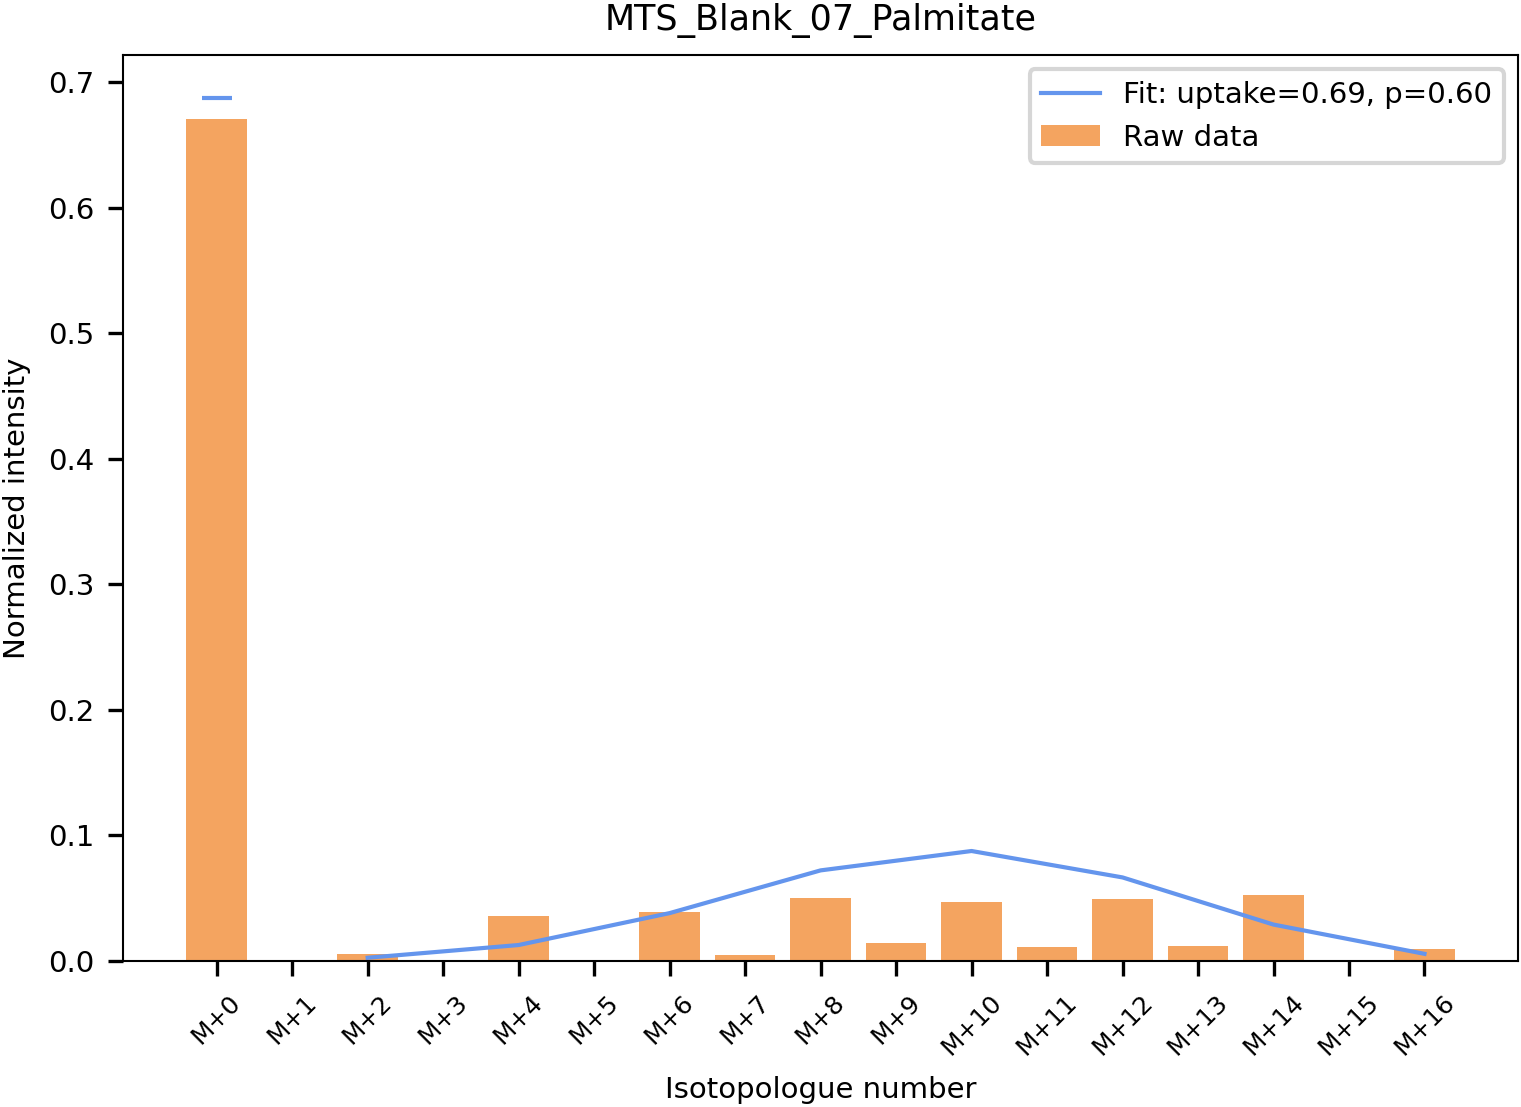

Palmitate MTS_Blank_08
[0.62443947 0.         0.02016272 0.         0.02833151 0.00497355
 0.03684628 0.00566993 0.03440018 0.01945677 0.05429736 0.02696618
 0.05478931 0.01652263 0.05405244 0.         0.01909167]
[0 1 2 3 4 5 6 7 8] 9 [0.64953743 0.65852207] True
Mean estimate 9.645201915131771, p 0.6028251196957357


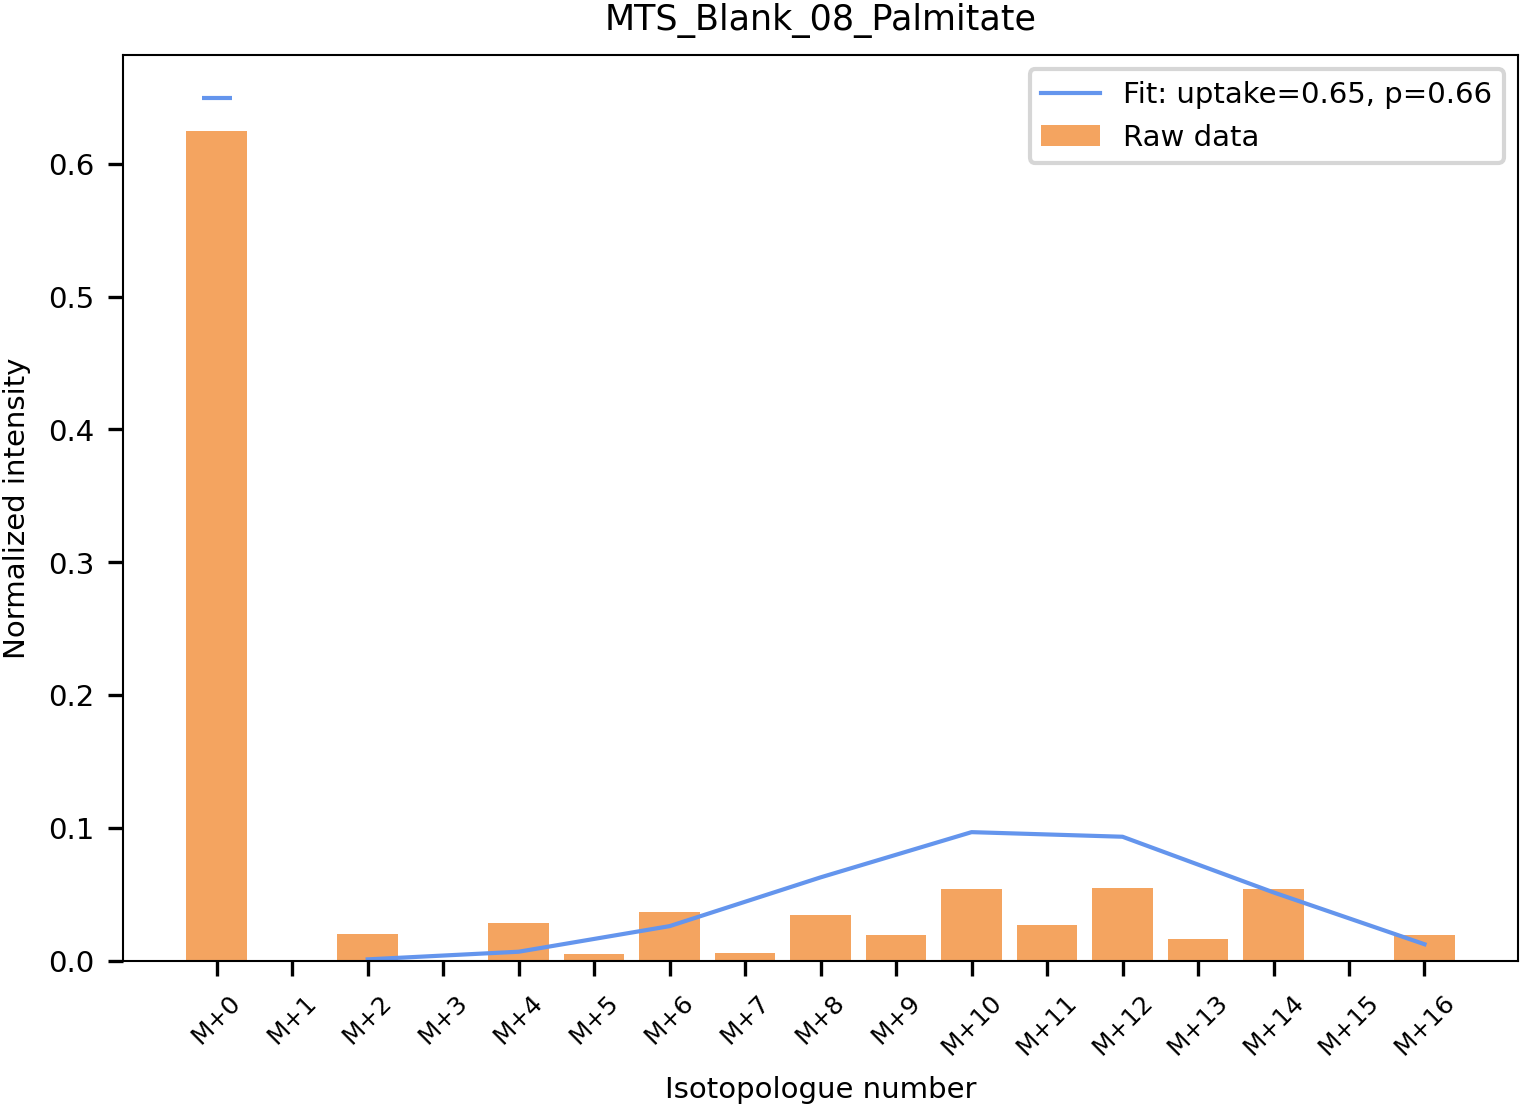

Stearate MTS_Alyona_acly3028_1
[0.44900686 0.00519811 0.11431092 0.00458817 0.06048617 0.00687608
 0.05851178 0.00900338 0.06196192 0.01075986 0.06494532 0.01306832
 0.05911162 0.01000649 0.04182566 0.00586882 0.01915152 0.00115367
 0.00416534]
[0 1 2 3 4 5 6 7 8 9] 10 [0.4661713  0.23357367 0.49553705] True
Mean estimate 9.224303775560394, p 0.5124613208644663


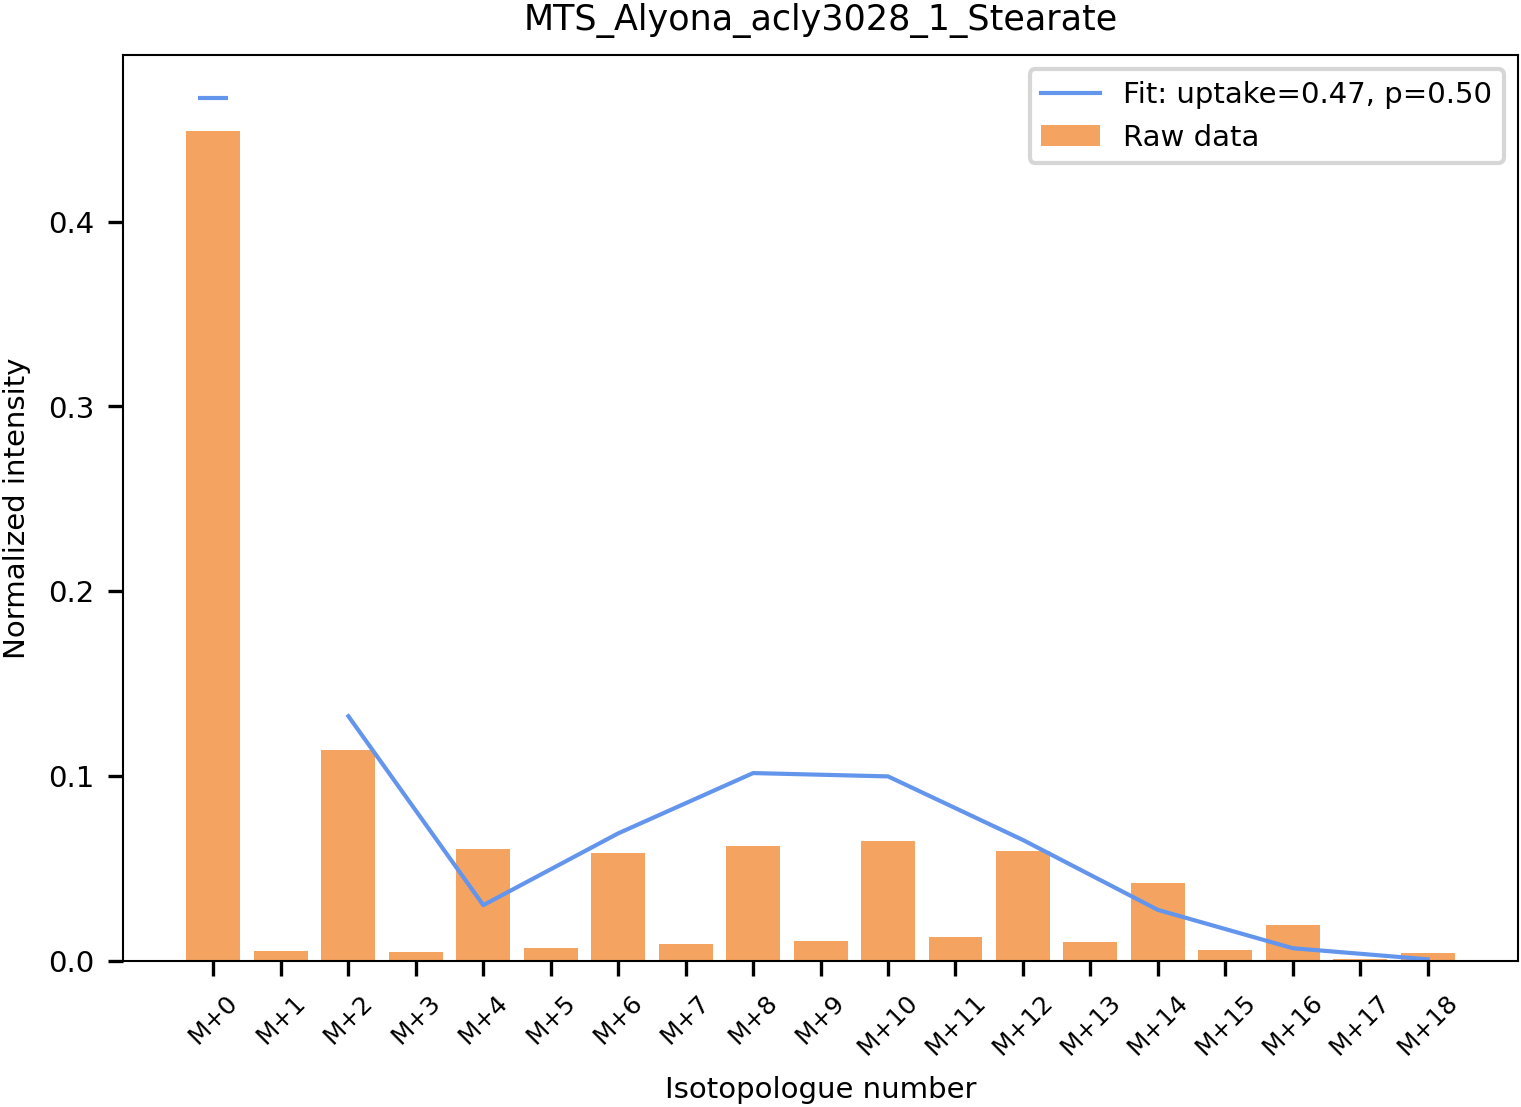

Stearate MTS_Alyona_acly3028_2
[0.45963771 0.00237751 0.10893775 0.004855   0.05724951 0.00621743
 0.05564502 0.00887325 0.05990929 0.01115307 0.06504115 0.0138584
 0.06235433 0.01005117 0.04309765 0.00604997 0.01948209 0.00111962
 0.00409006]
[0 1 2 3 4 5 6 7 8 9] 10 [0.47646041 0.2298862  0.51114989] True
Mean estimate 9.348038848715932, p 0.5193354915953295


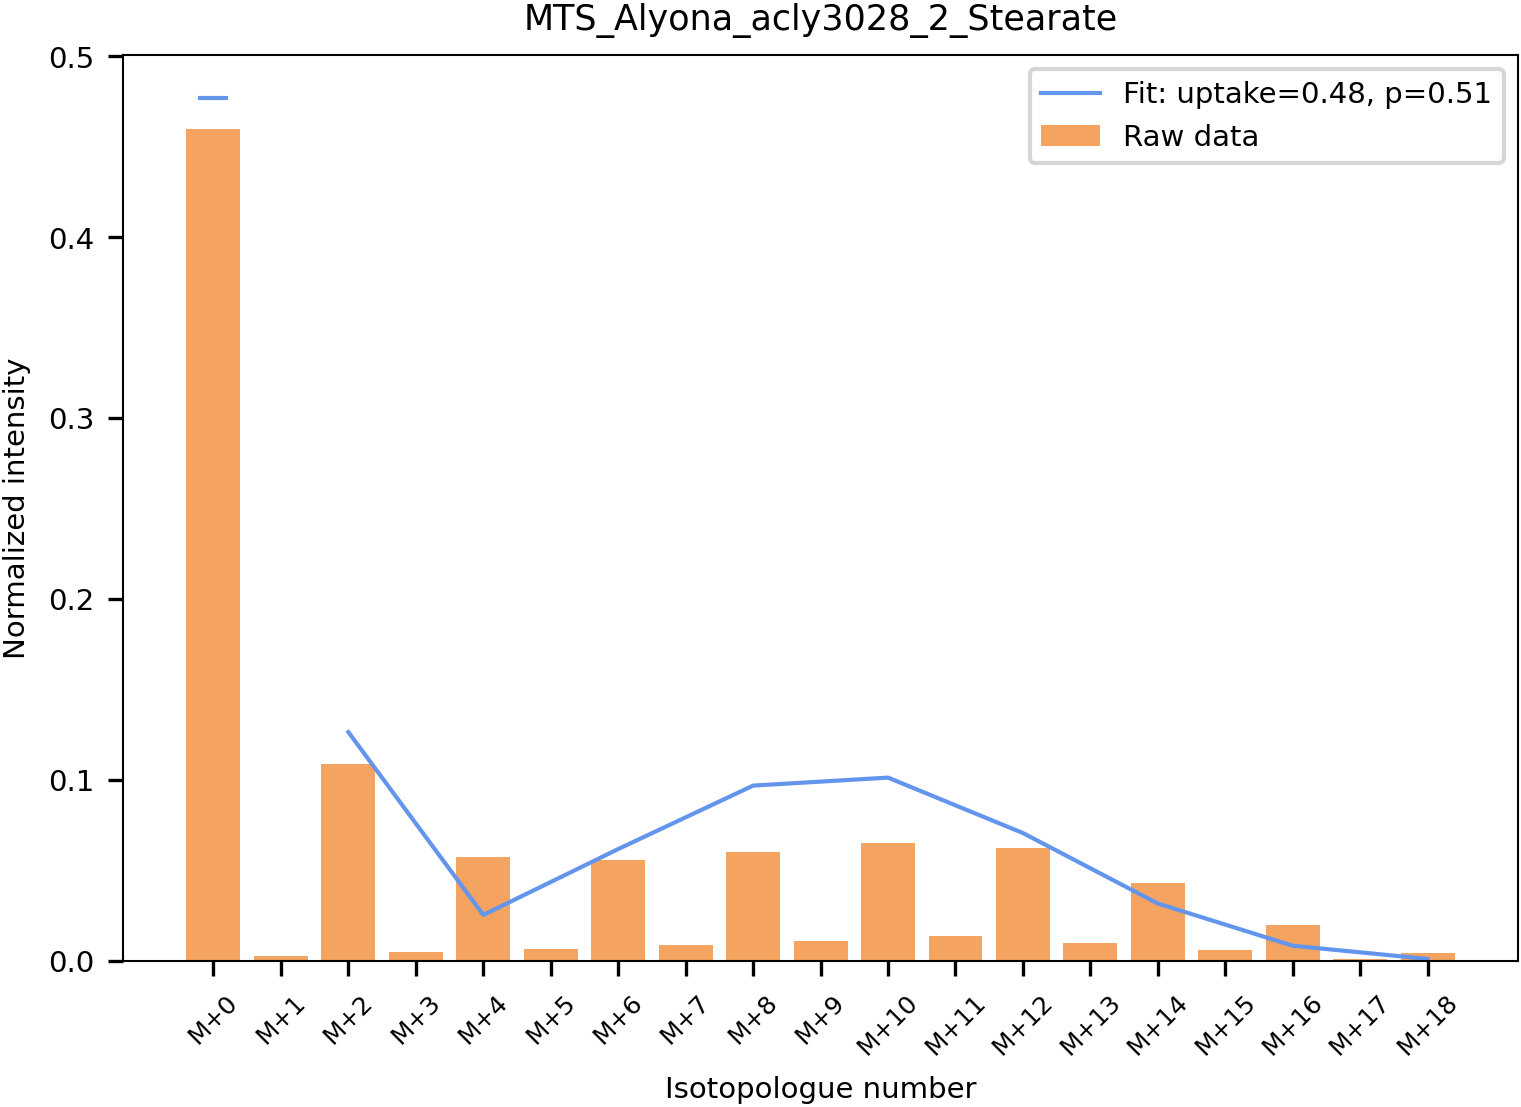

Stearate MTS_Alyona_acly3028_3
[0.45432595 0.00429944 0.11142626 0.00469094 0.05796352 0.00740441
 0.05783969 0.00891003 0.06045014 0.01090898 0.06393686 0.01283295
 0.05998858 0.0110958  0.0438249  0.00566424 0.01897244 0.00132668
 0.00413818]
[0 1 2 3 4 5 6 7 8 9] 10 [0.4716184  0.23210709 0.50311283] True
Mean estimate 9.297700411740001, p 0.5165389117633334


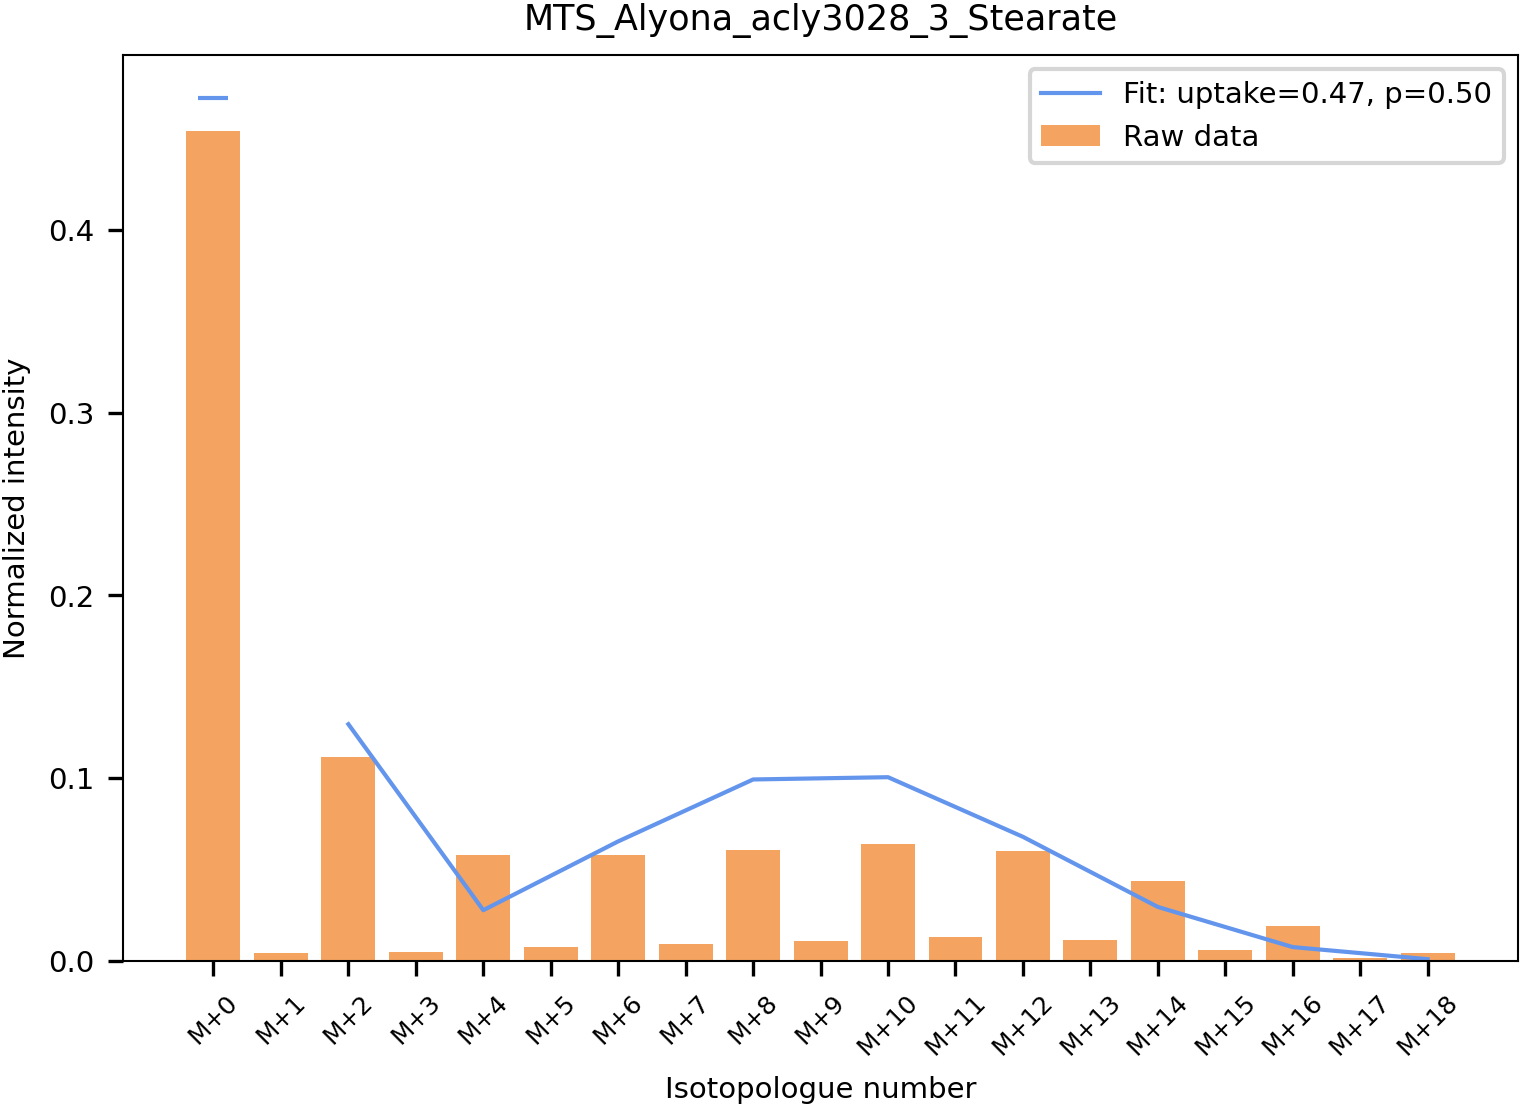

Stearate MTS_Alyona_acly3028_etoh
[0.32589221 0.         0.08481141 0.00130619 0.00932654 0.00292596
 0.02461739 0.00759193 0.05249231 0.01798616 0.09462606 0.02742177
 0.1199005  0.02737879 0.10461817 0.01875882 0.0600365  0.00507591
 0.01523337]
[0 1 2 3 4 5 6 7 8 9] 10 [0.34437984 0.15670186 0.6596913 ] True
Mean estimate 11.832054776098285, p 0.6573363764499047


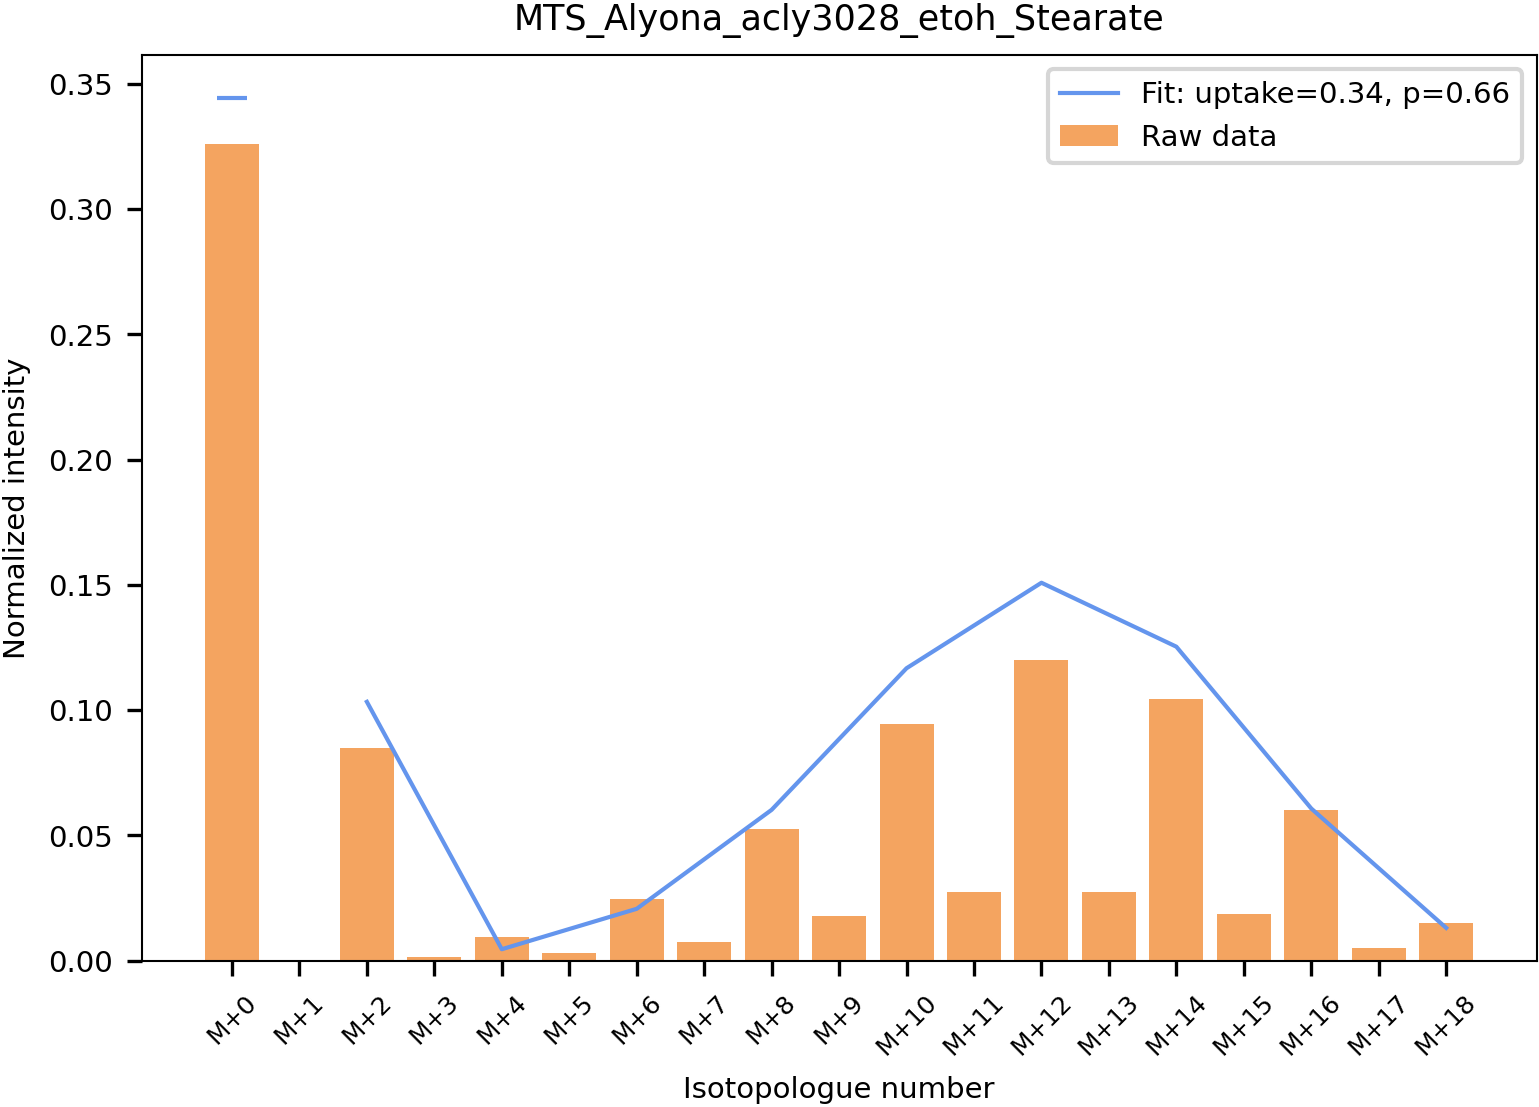

Stearate MTS_Alyona_renilla_1
[0.38663231 0.00364892 0.09396936 0.00167458 0.00587219 0.0016875
 0.01573996 0.00651832 0.04441294 0.01485124 0.07935817 0.02467211
 0.10934458 0.02616454 0.09794725 0.01770863 0.05262579 0.00384437
 0.01332724]
[0 1 2 3 4 5 6 7 8 9] 10 [0.40240883 0.18296732 0.66835833] True
Mean estimate 12.020482425614054, p 0.6678045792007807


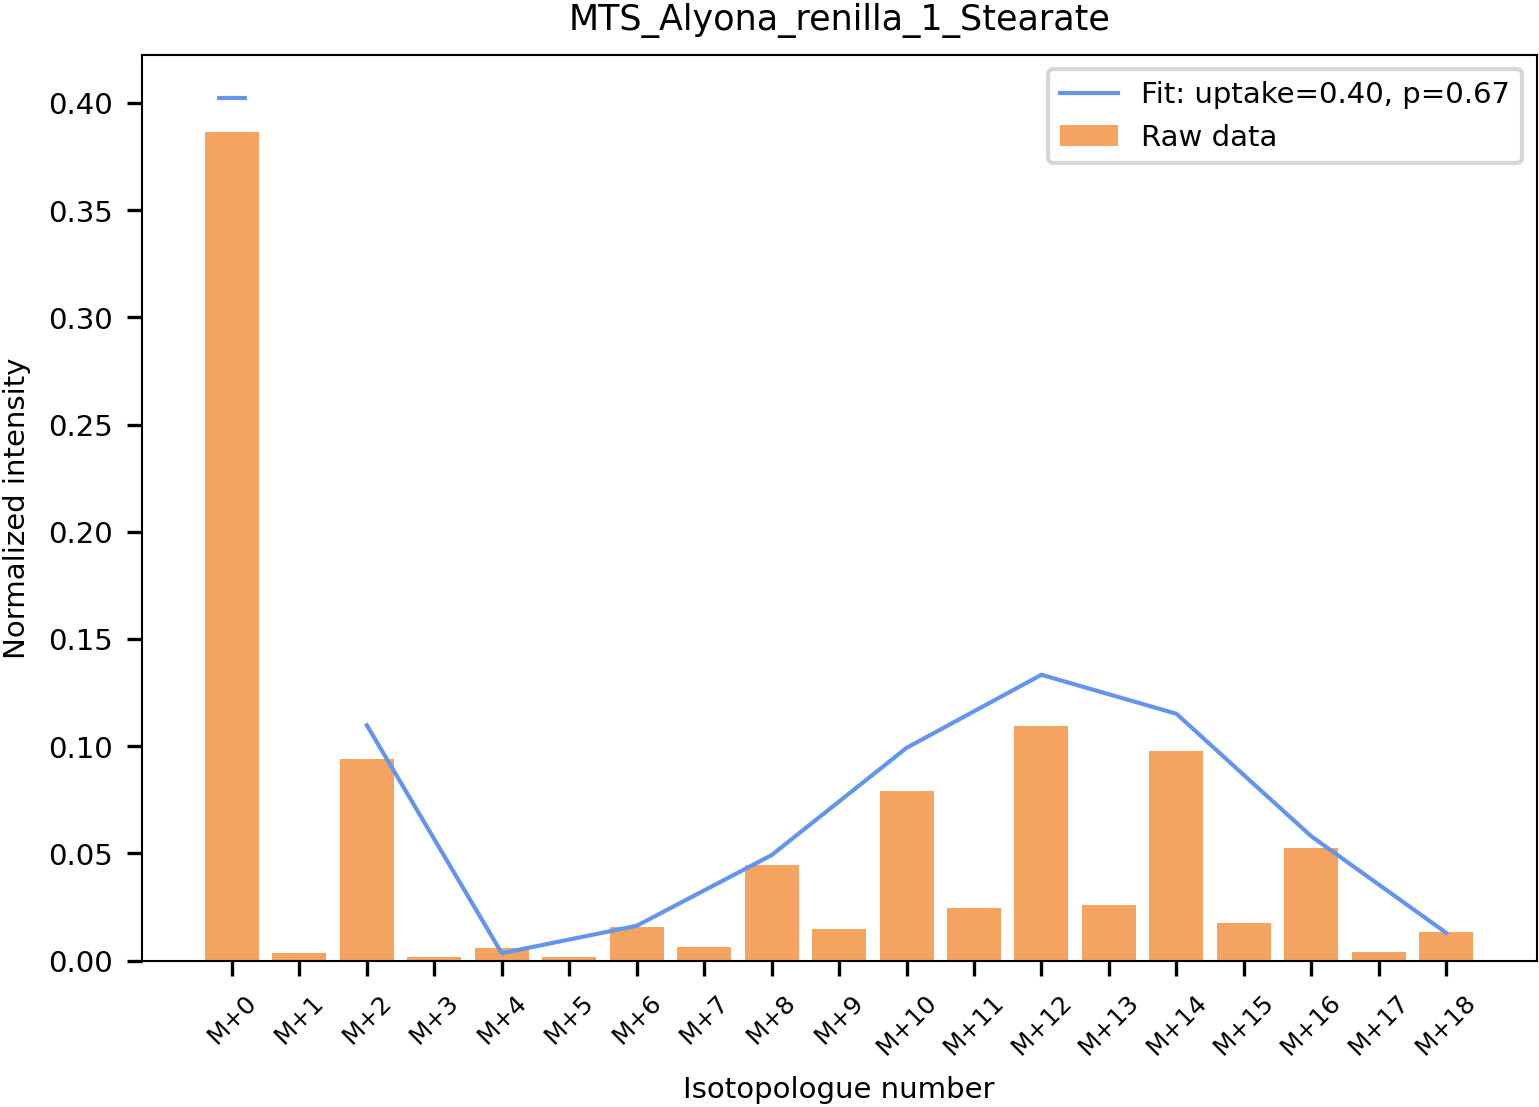

Stearate MTS_Alyona_renilla_2
[0.40233594 0.003064   0.09376664 0.00089953 0.00568103 0.00160304
 0.01656118 0.00688516 0.04074195 0.01554421 0.08006704 0.02468736
 0.10736141 0.02306353 0.09621785 0.01581578 0.04941363 0.00408524
 0.01220551]
[0 1 2 3 4 5 6 7 8 9] 10 [0.41699893 0.18528627 0.66707294] True
Mean estimate 11.988744351730139, p 0.6660413528738967


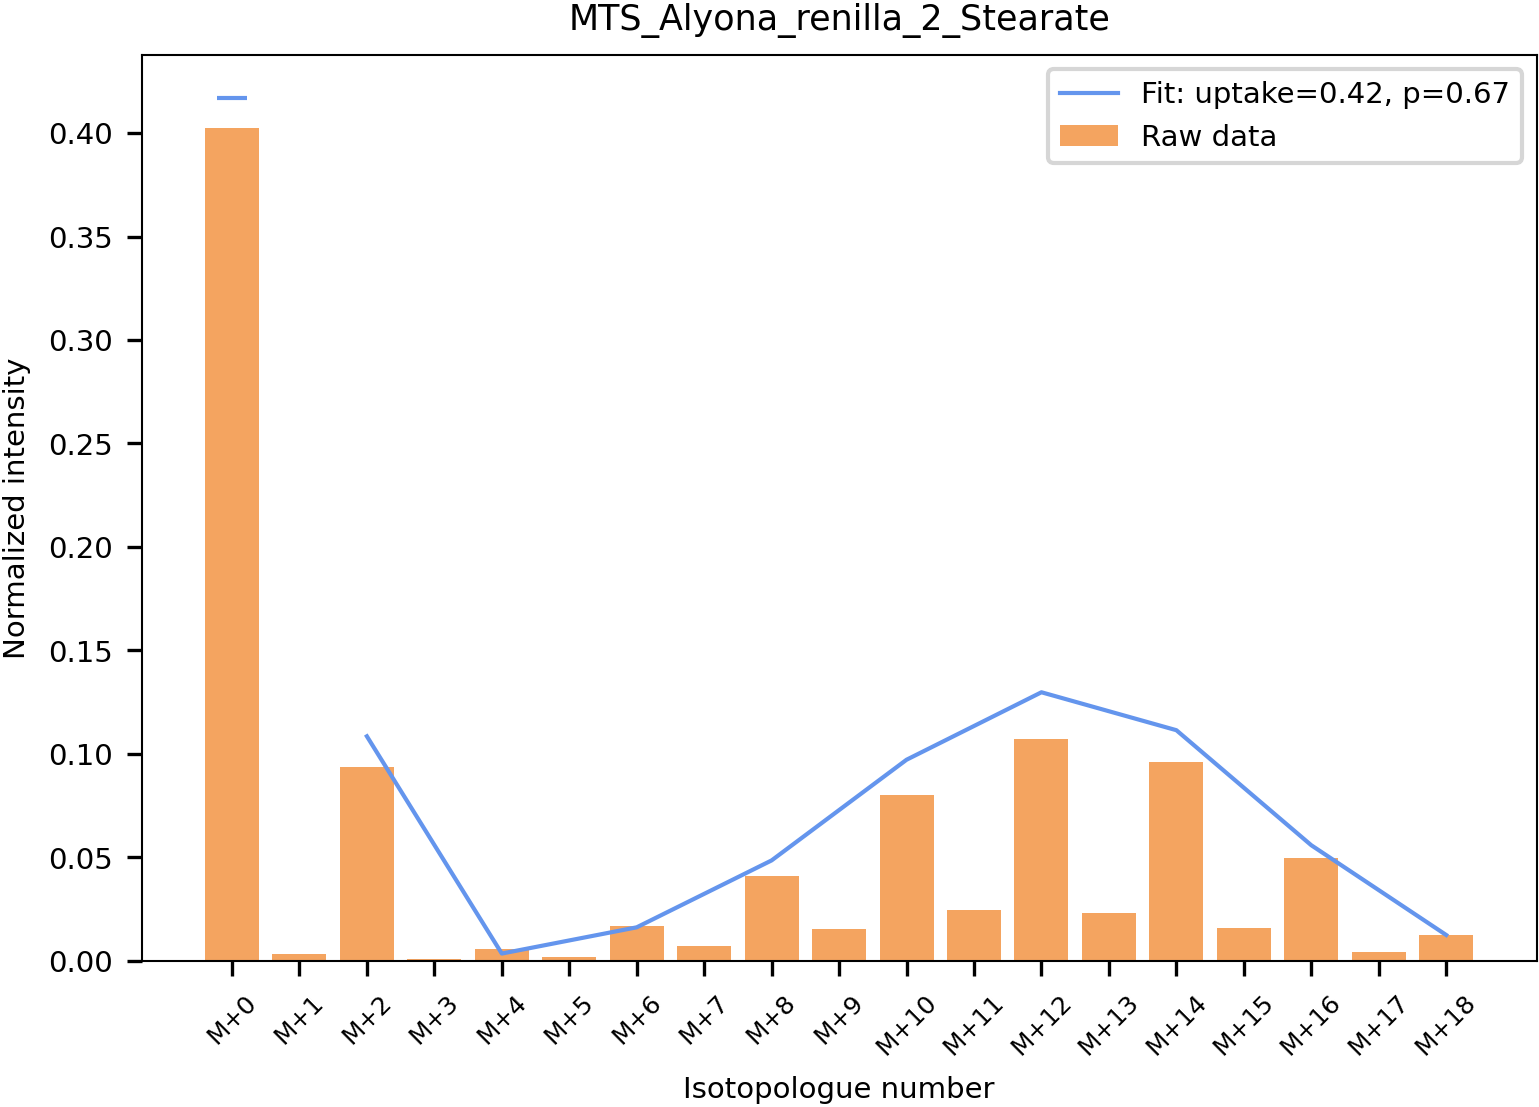

Stearate MTS_Alyona_renilla_3
[0.38799504 0.00367696 0.09272892 0.00088042 0.00634526 0.00180655
 0.01652283 0.00699523 0.04131939 0.0153541  0.08138803 0.02576001
 0.1107834  0.02361807 0.09904201 0.01587378 0.05325738 0.00403137
 0.01262125]
[0 1 2 3 4 5 6 7 8 9] 10 [0.40318401 0.18015754 0.66948363] True
Mean estimate 12.021095602317814, p 0.6678386445732118


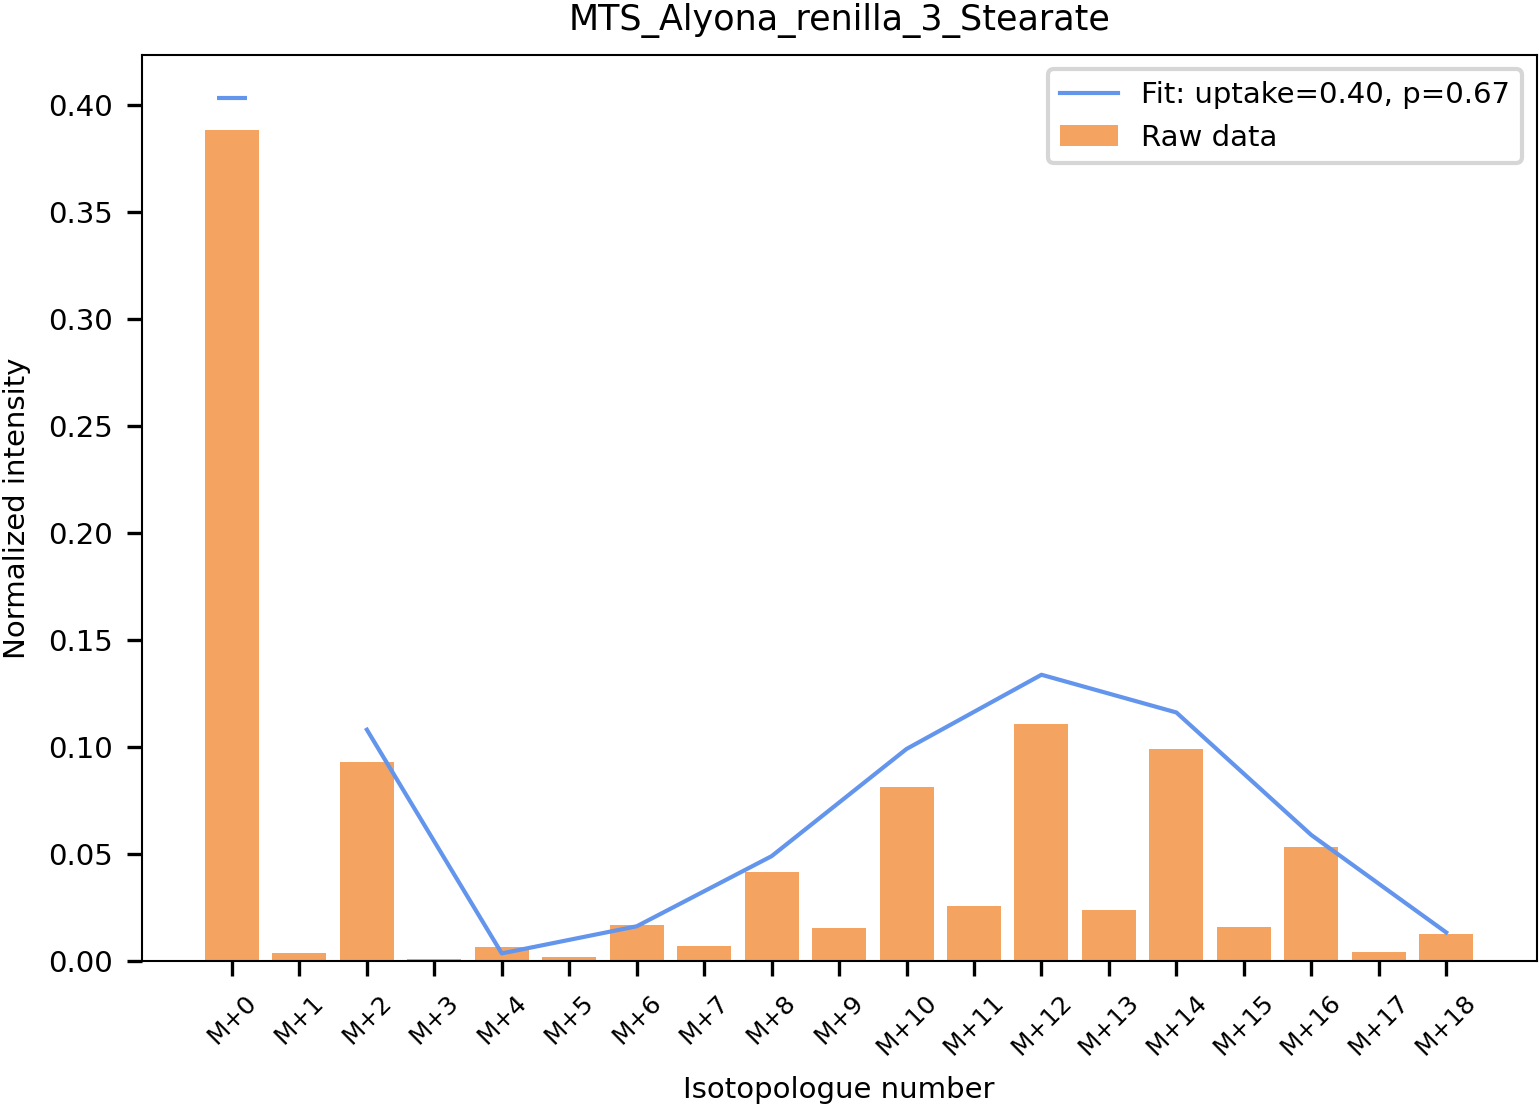

Stearate MTS_Alyona_renilla_etoh
[0.36238543 0.00126866 0.0956555  0.         0.00603568 0.00229646
 0.01612623 0.00652853 0.04440479 0.01636173 0.08259371 0.02713462
 0.11314052 0.02759316 0.10384609 0.01793056 0.05748695 0.00485491
 0.01435648]
[0 1 2 3 4 5 6 7 8 9] 10 [0.37880553 0.17979516 0.67214586] True
Mean estimate 12.082029867720482, p 0.6712238815400268


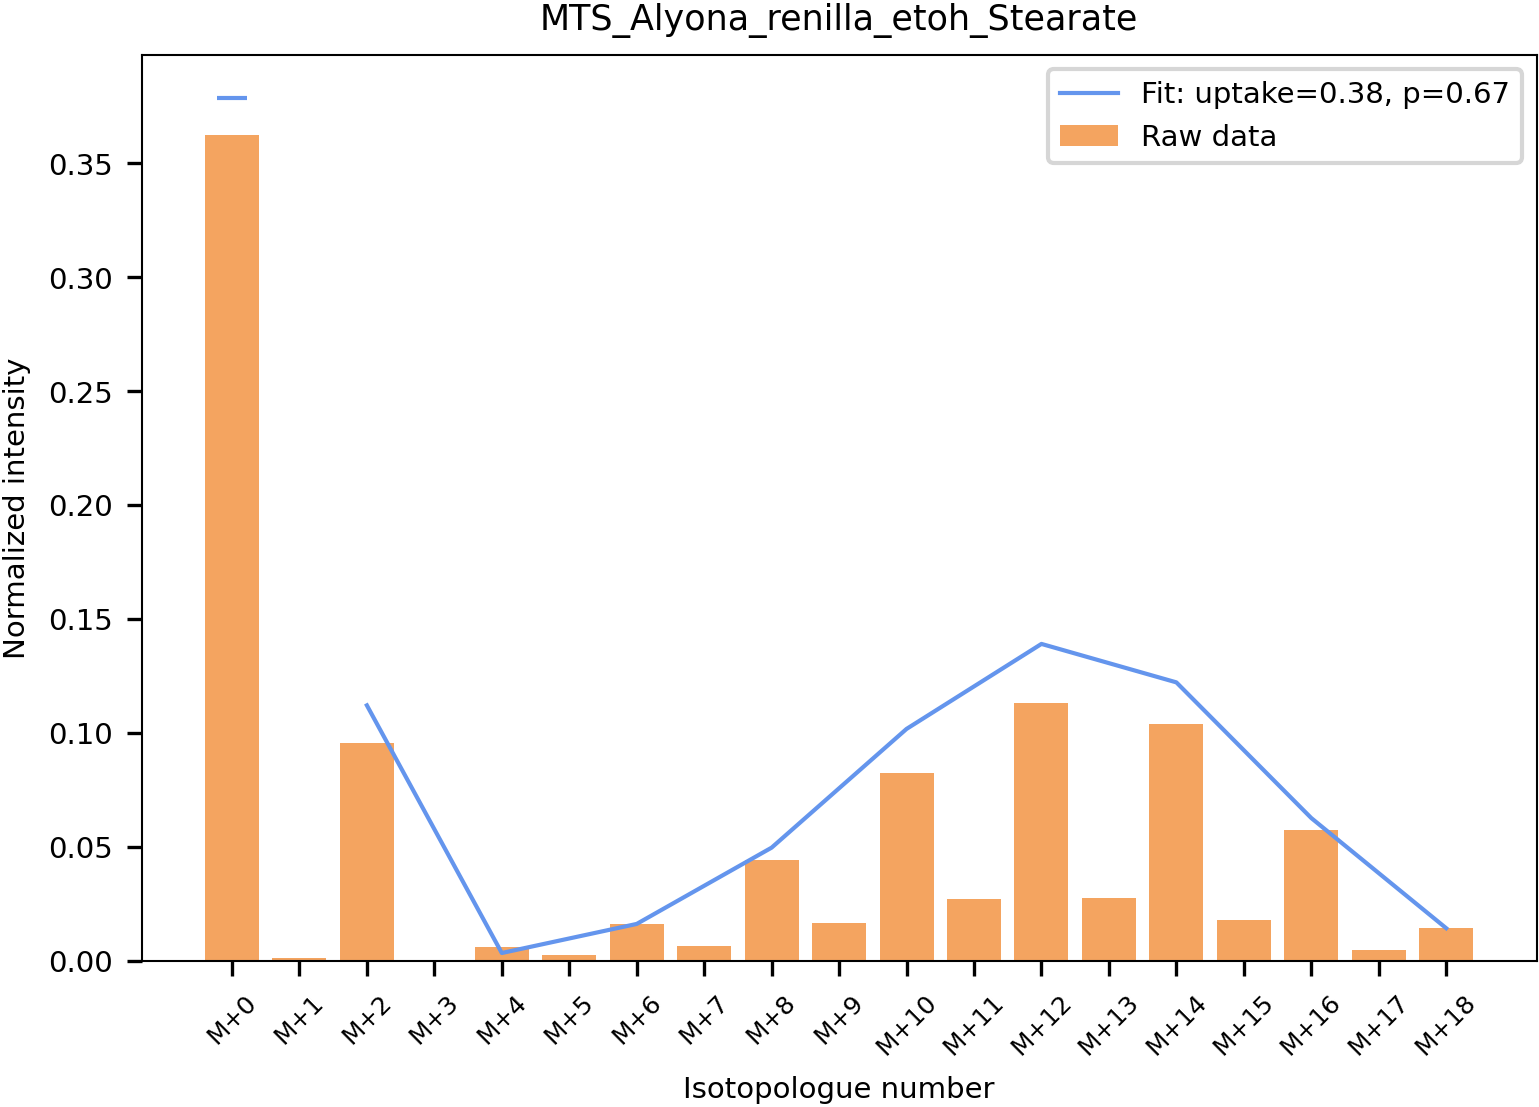

Stearate MTS_Alyona_acly4080_1
[5.27990979e-01 7.35792932e-03 9.97810106e-02 1.91269537e-04
 2.65569018e-02 4.10230913e-03 3.92139433e-02 7.50194820e-03
 5.61609431e-02 1.07143571e-02 6.34021142e-02 1.37003436e-02
 5.99554006e-02 1.04772785e-02 4.31970299e-02 5.58298313e-03
 1.88839561e-02 1.14532696e-03 4.08397577e-03]
[0 1 2 3 4 5 6 7 8 9] 10 [0.54075293 0.23986901 0.55650099] True
Mean estimate 10.032603148814594, p 0.5573668416008108


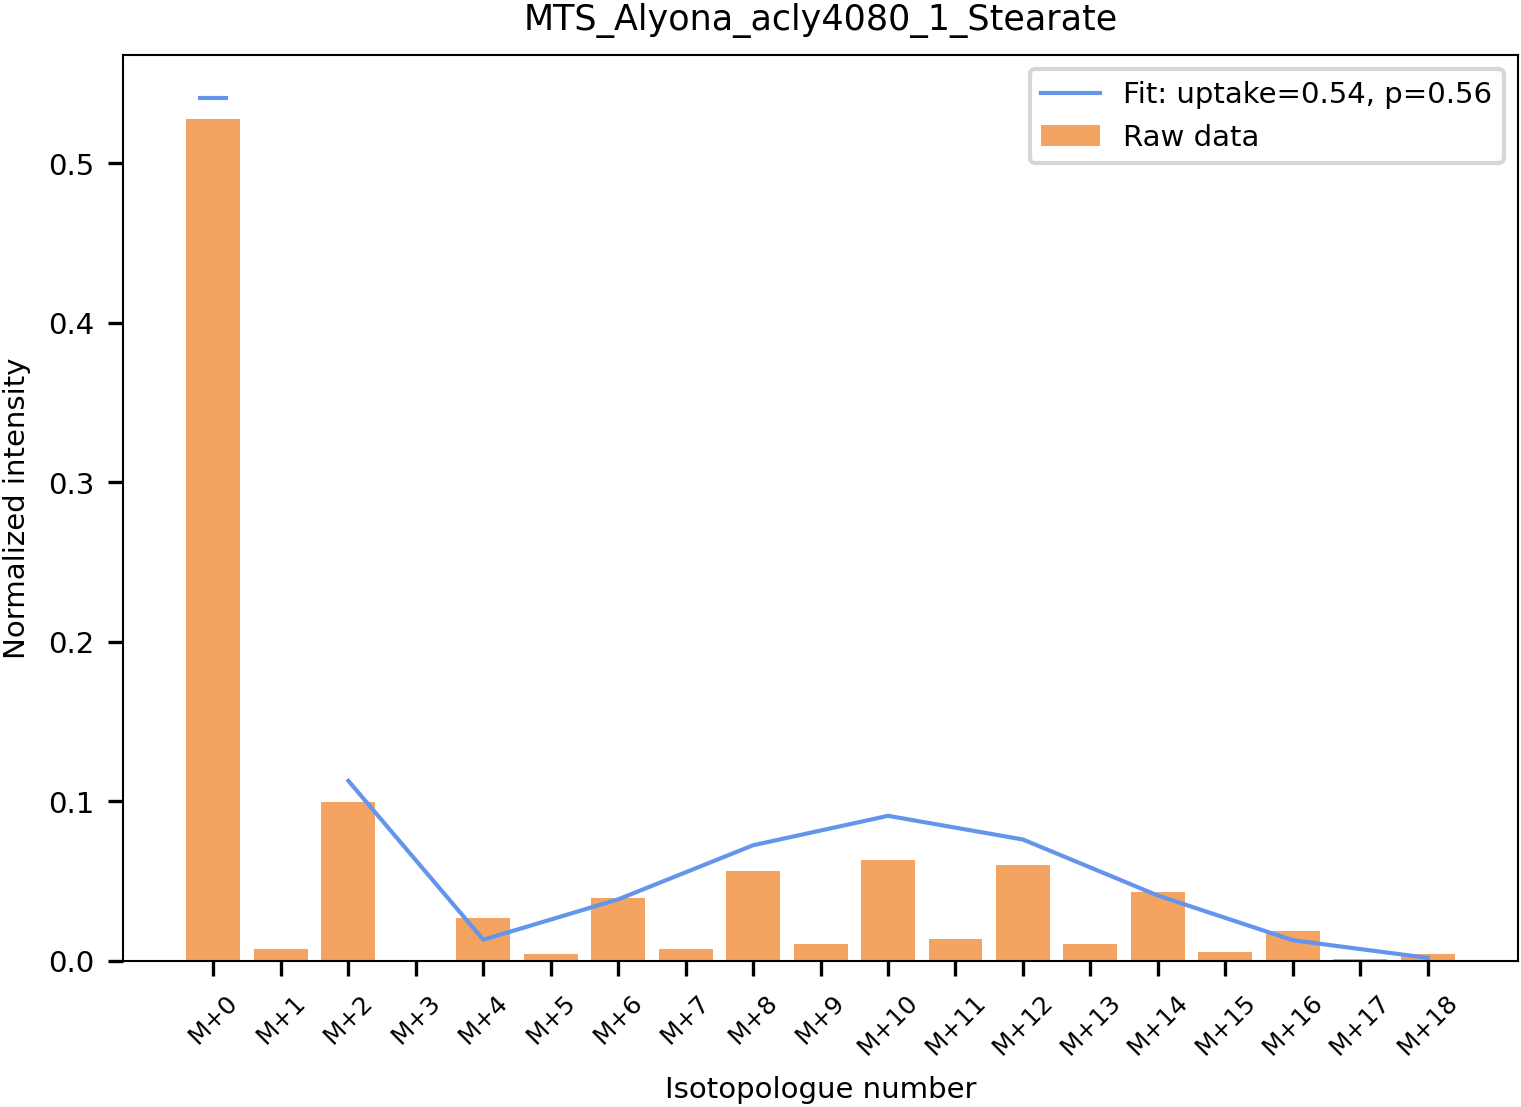

Stearate MTS_Alyona_acly4080_2
[0.55223828 0.0022338  0.0885532  0.00233178 0.02305324 0.00348396
 0.03801679 0.00726007 0.0543828  0.01099327 0.06572039 0.01257274
 0.06101812 0.00942408 0.04094911 0.00525812 0.01780268 0.00097318
 0.00373438]
[0 1 2 3 4 5 6 7 8 9] 10 [0.56330208 0.22304389 0.55945825] True
Mean estimate 10.076706016818964, p 0.5598170009343869


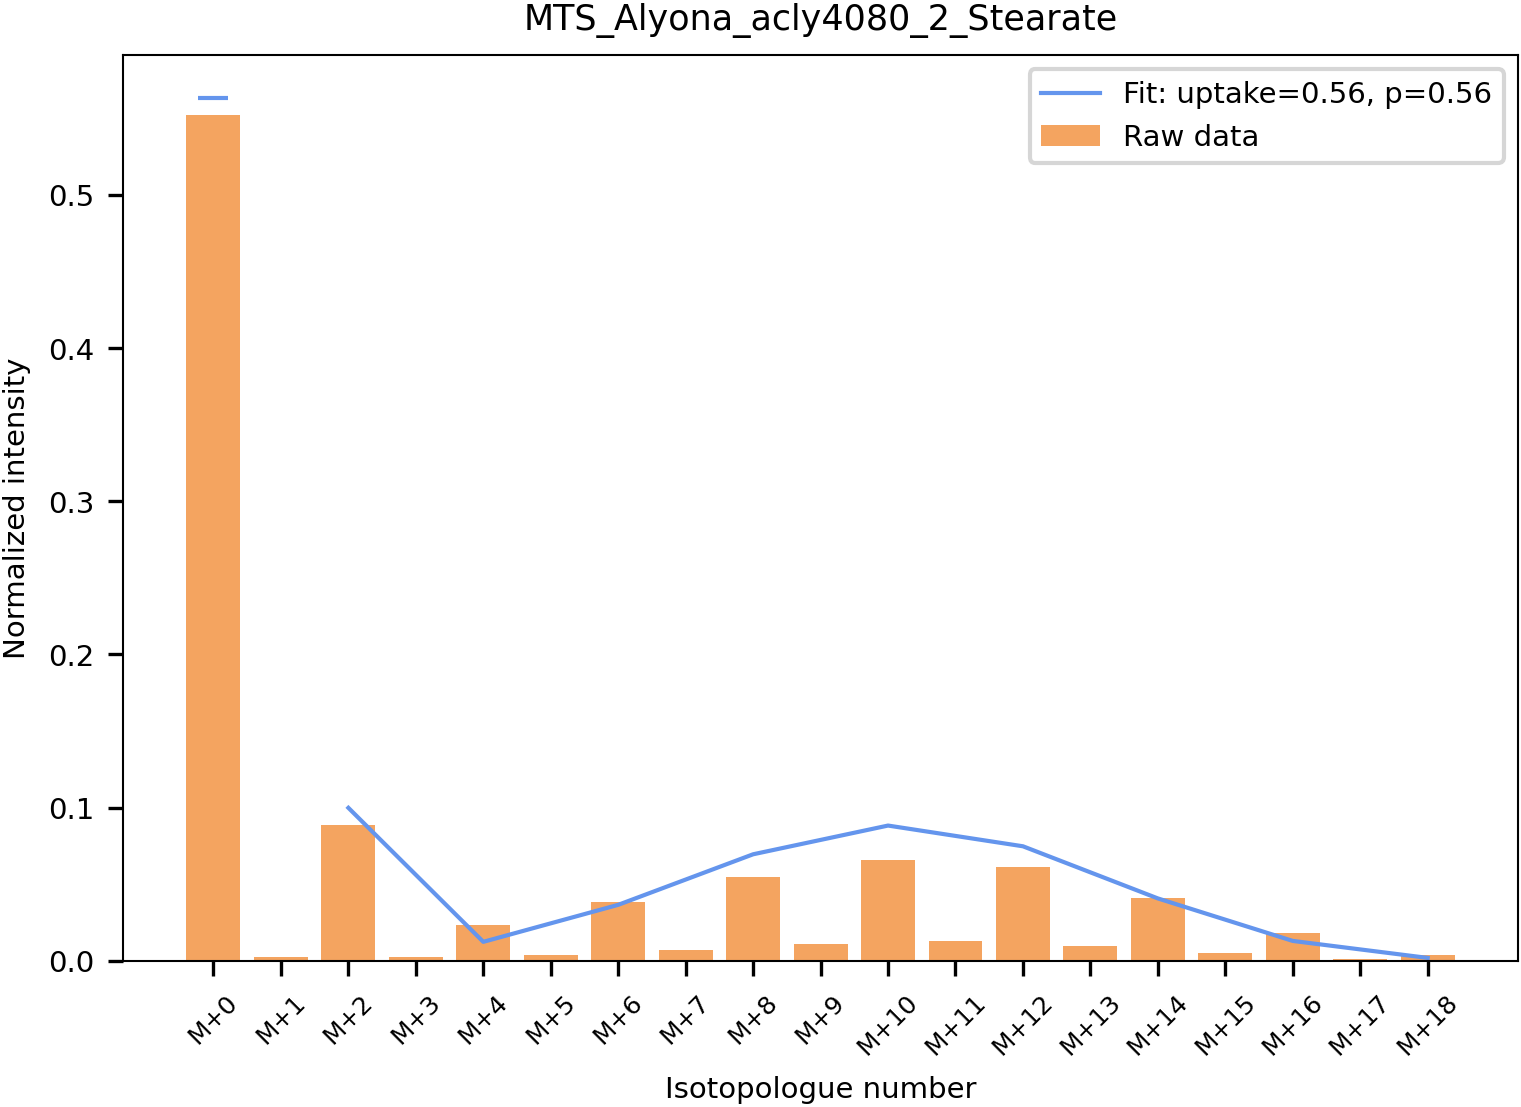

Stearate MTS_Alyona_acly4080_3
[0.55396201 0.00270389 0.08988987 0.00195843 0.02271205 0.00445285
 0.03673902 0.0075335  0.05370487 0.01019604 0.0656838  0.01179041
 0.05874983 0.00948808 0.04158561 0.00491981 0.01938334 0.00089027
 0.00365631]
[0 1 2 3 4 5 6 7 8 9] 10 [0.56509668 0.22738482 0.56108726] True
Mean estimate 10.128231618377589, p 0.5626795343543105


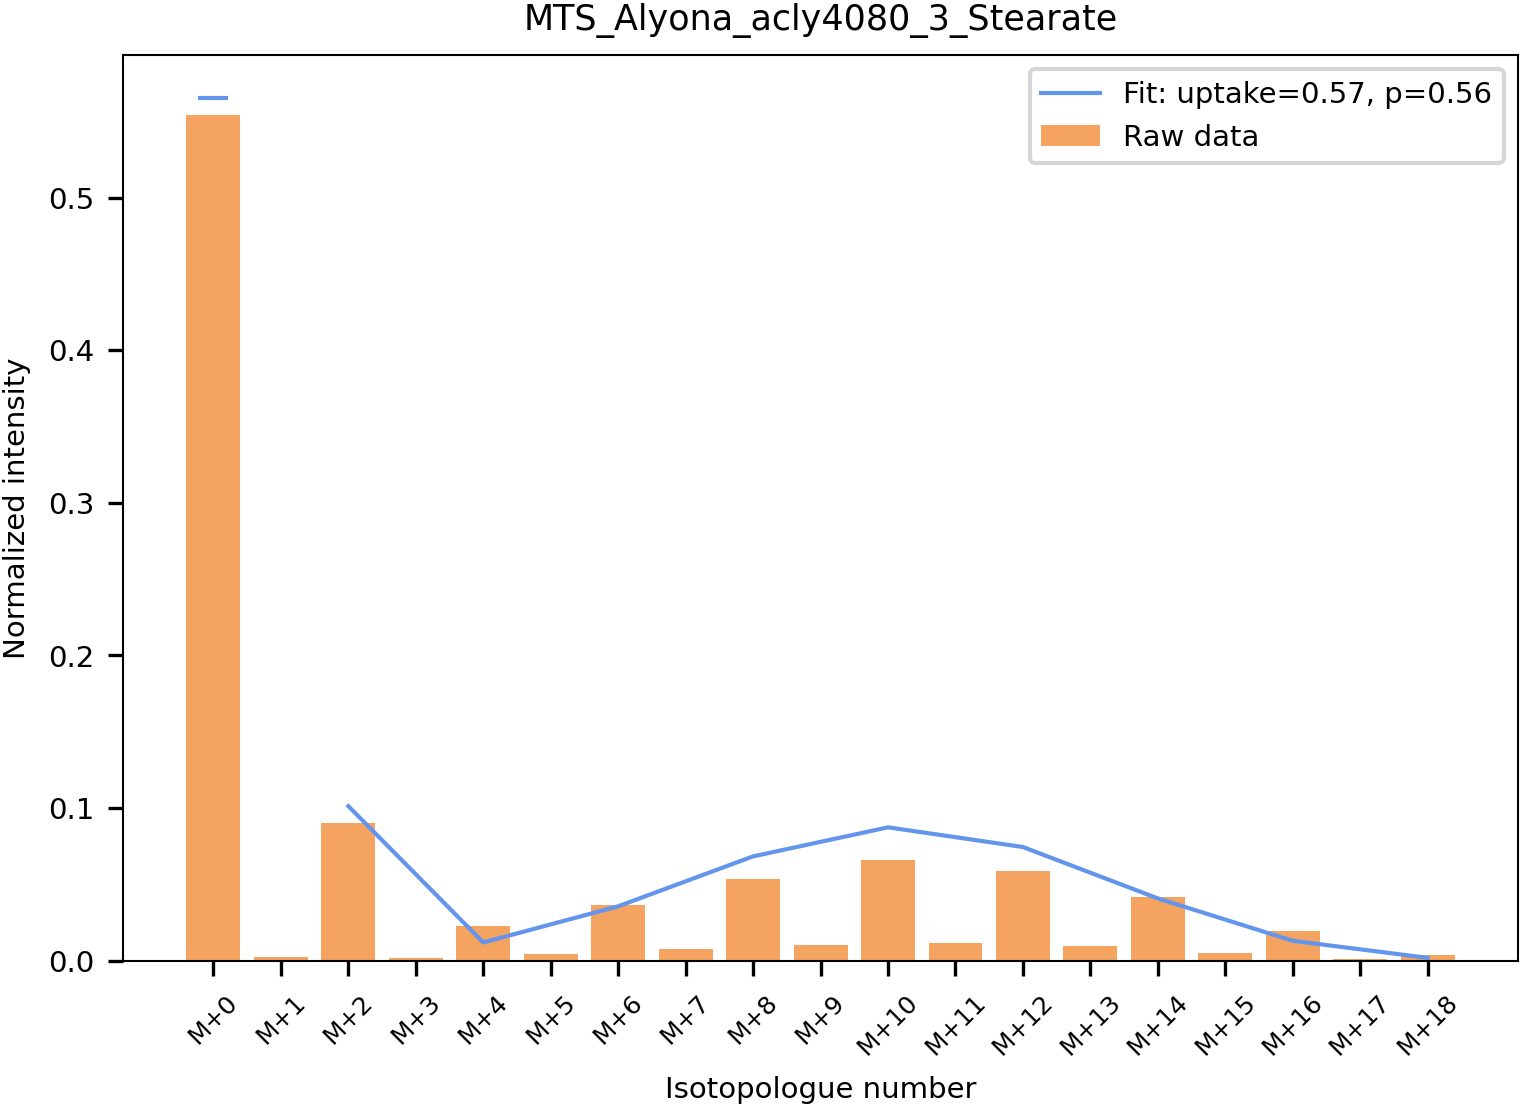

Stearate MTS_Alyona_acly4080_etoh
[0.43386095 0.00432015 0.10172513 0.         0.00672476 0.00163016
 0.01679728 0.00585315 0.04216545 0.01371347 0.07537147 0.02007084
 0.09749814 0.02075732 0.08616028 0.01311231 0.04598018 0.00316614
 0.01109281]
[0 1 2 3 4 5 6 7 8 9] 10 [0.4472776  0.20754458 0.66122102] True
Mean estimate 11.865922401611519, p 0.6592179112006399


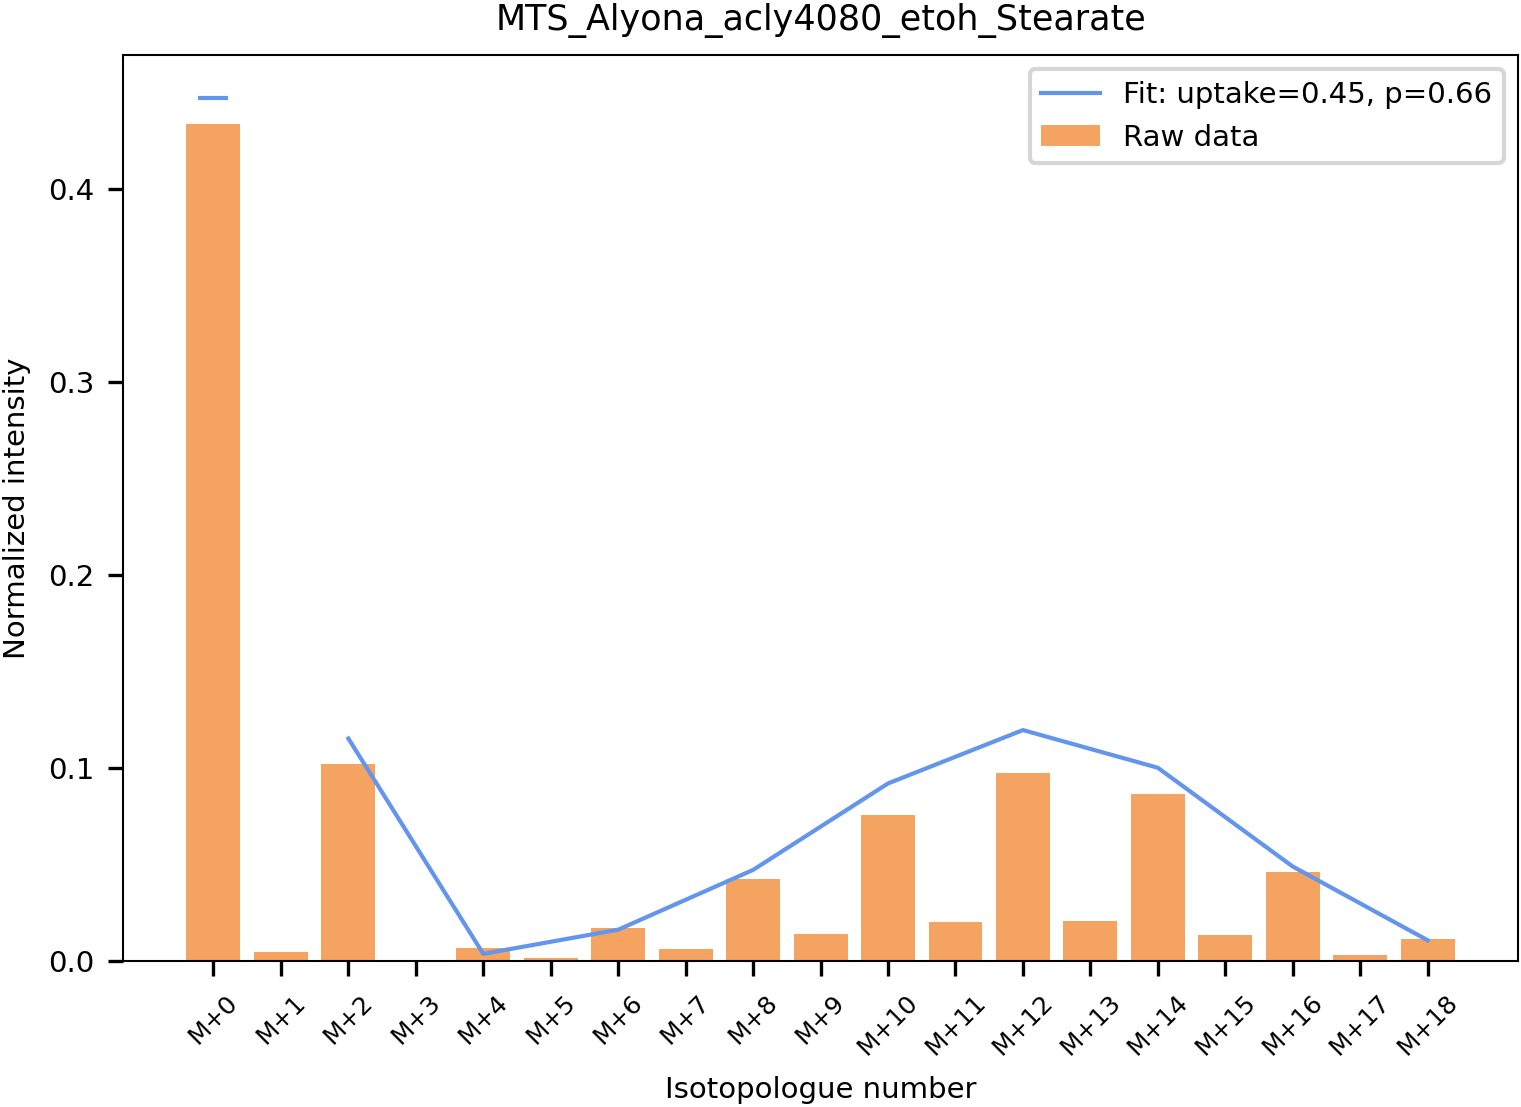

Stearate MTS_Blank_01
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 1 2 3 4 5 6 7 8 9] 10 [1. 0. 0.] True
Mean estimate 0.0, p 0.0


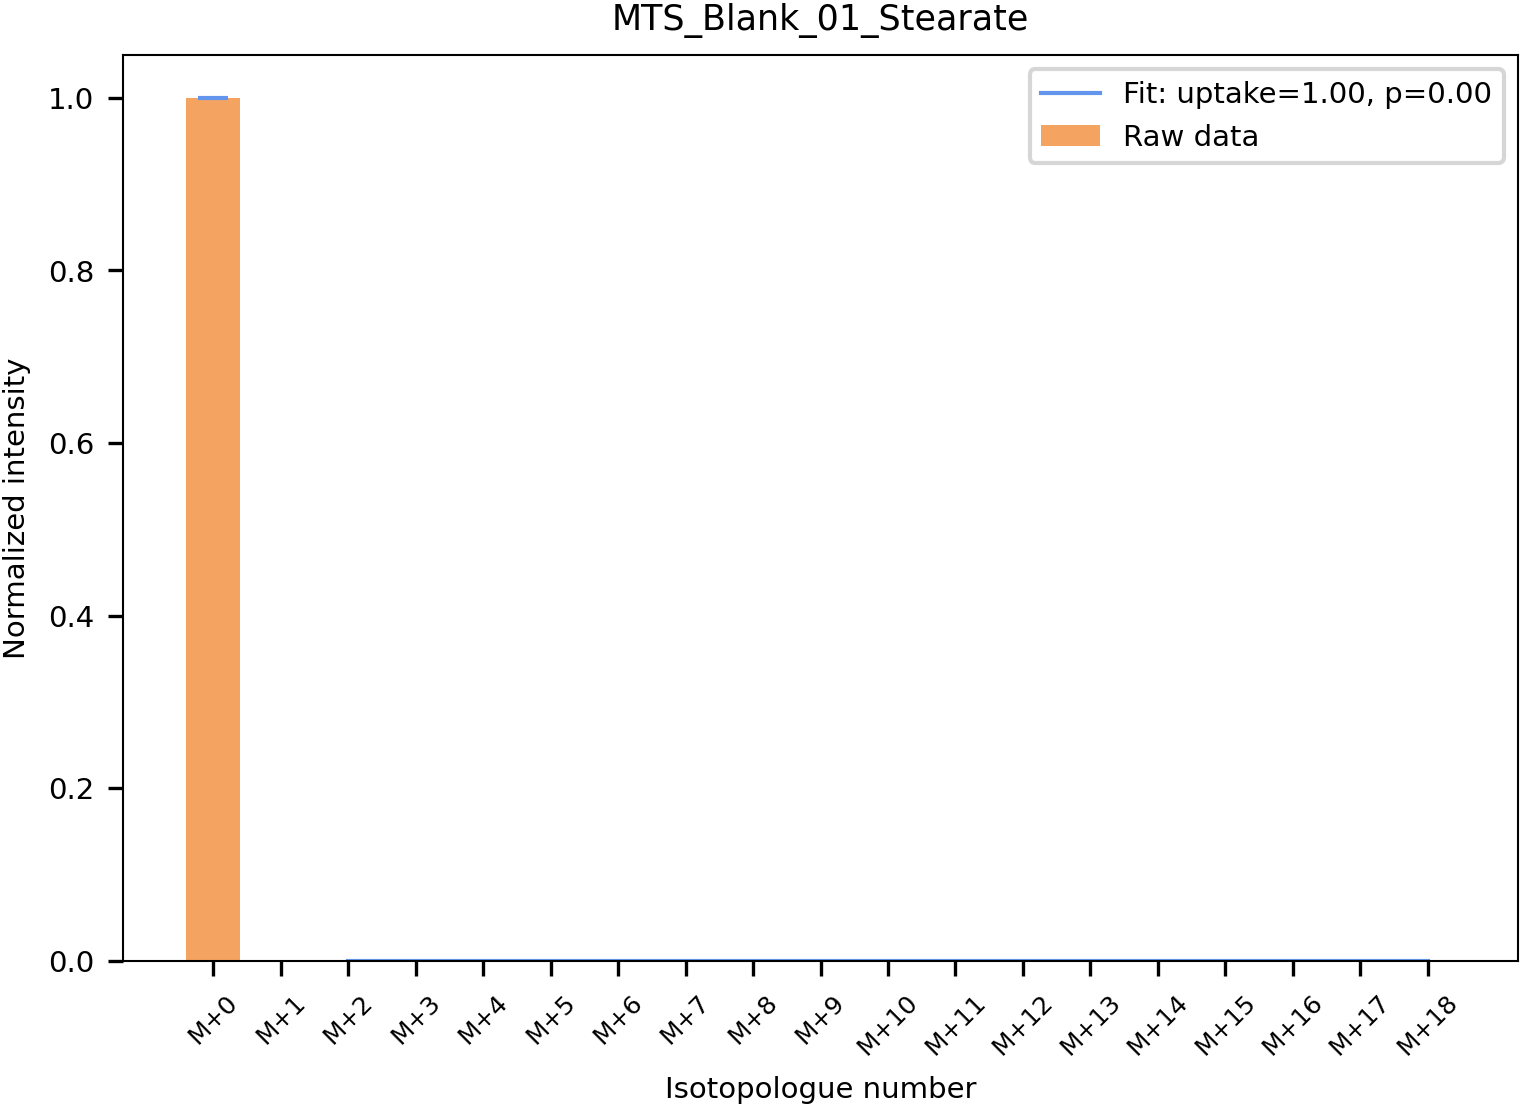

Stearate MTS_Blank_02
[0.98277251 0.01722749 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0 1 2 3 4 5 6 7 8 9] 10 [0.98513684 0.1535084  0.55907797] True
Mean estimate 0.0, p 0.0


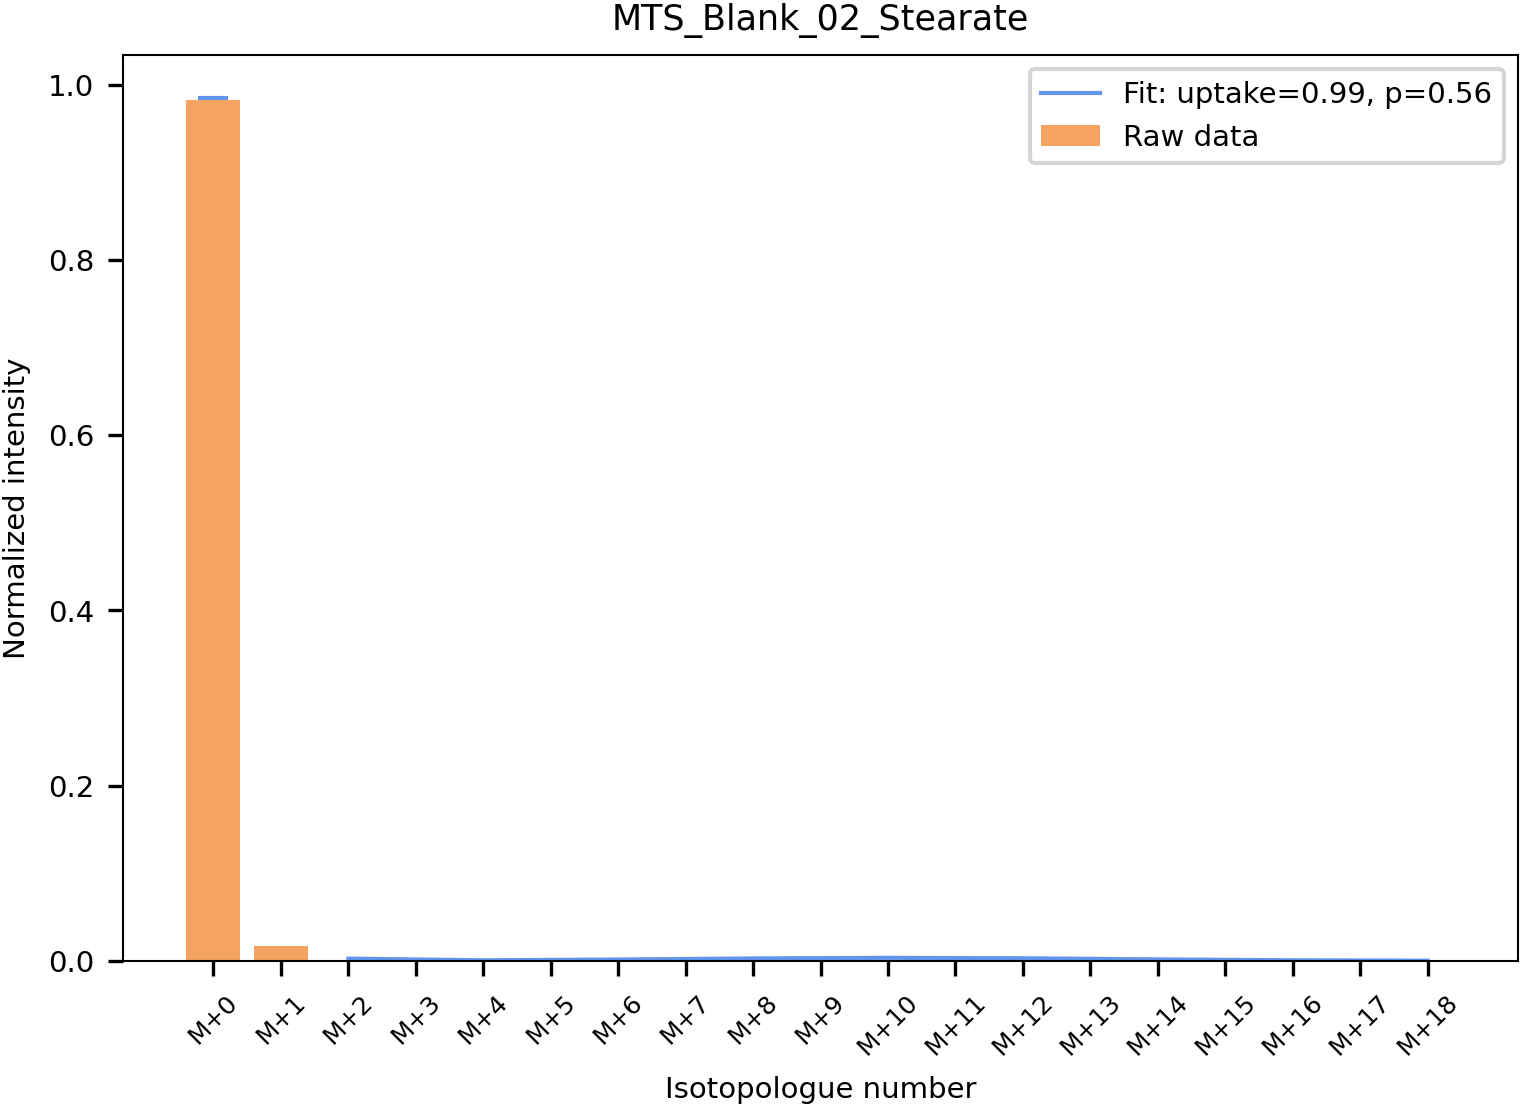

Stearate MTS_Blank_03
[0.98596887 0.01403113 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0 1 2 3 4 5 6 7 8 9] 10 [0.98789533 0.15388036 0.55898261] True
Mean estimate 0.0, p 0.0


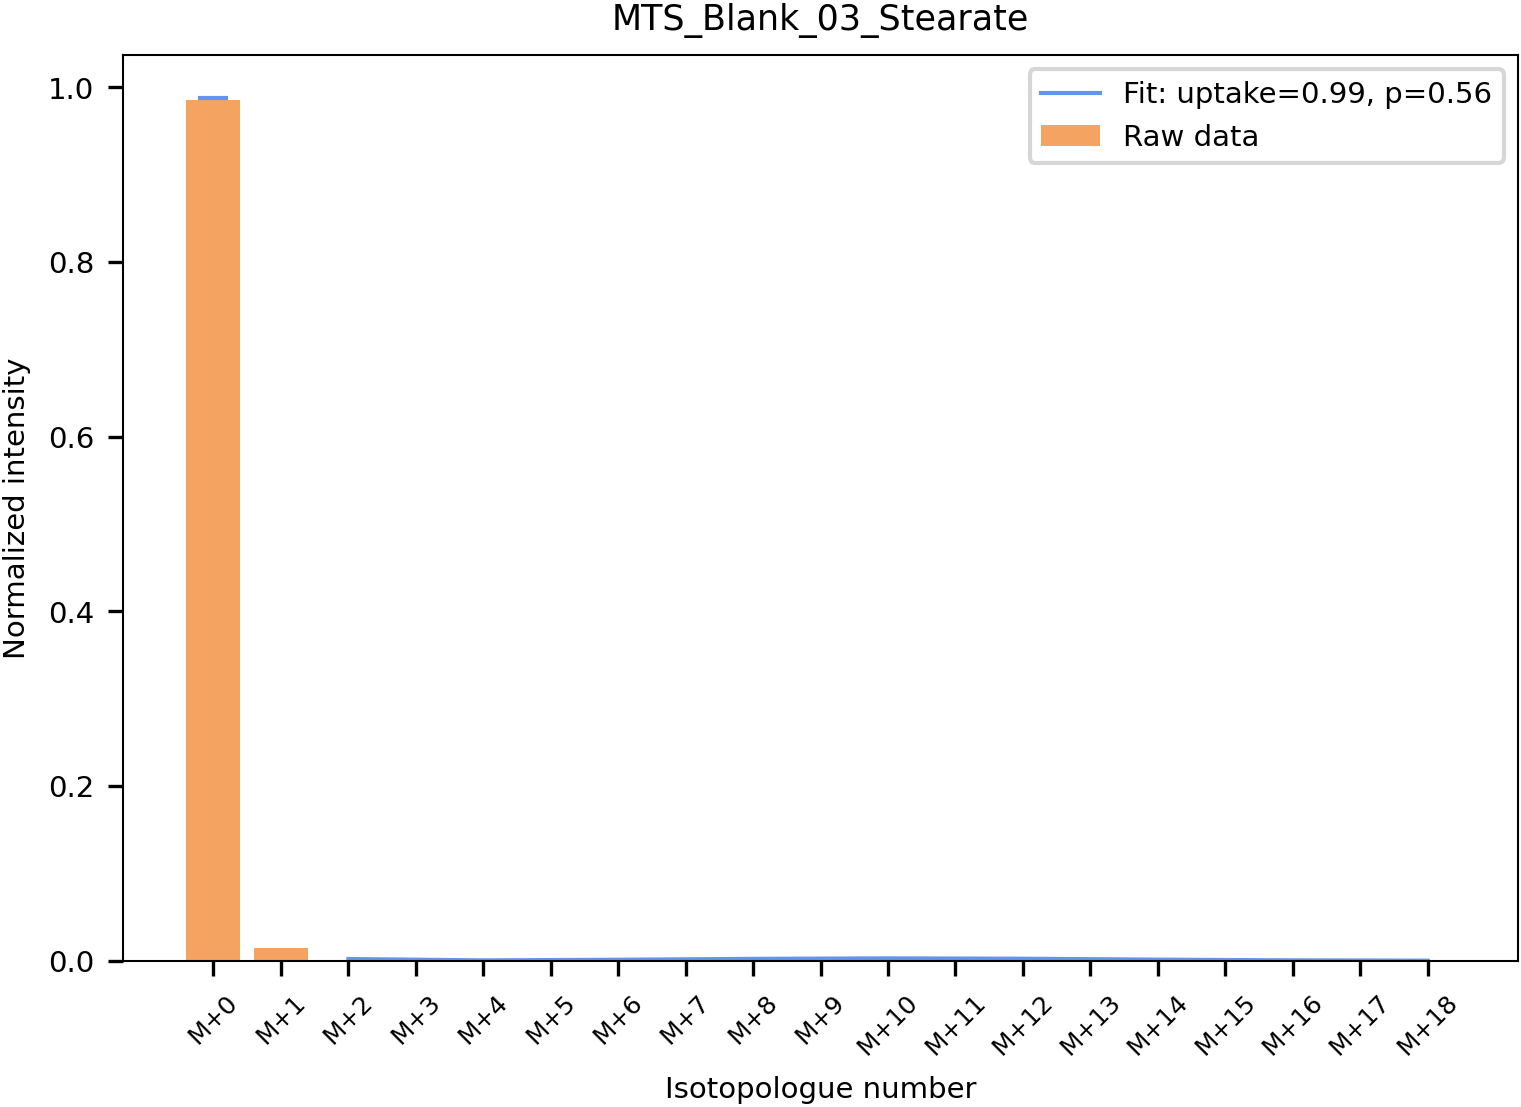

Stearate MTS_Blank_04
[8.00104262e-01 1.89767470e-02 1.68519711e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.03000000e-06
 2.78337400e-02 0.00000000e+00 4.62339155e-02 0.00000000e+00
 4.76766651e-02 0.00000000e+00 3.19770656e-02 0.00000000e+00
 1.03366069e-02 0.00000000e+00 0.00000000e+00]
[0 1 2 3 4 5 6 7 8 9] 10 [0.8006487  0.08524943 0.62134014] True
Mean estimate 11.399581999284255, p 0.6333101110713475


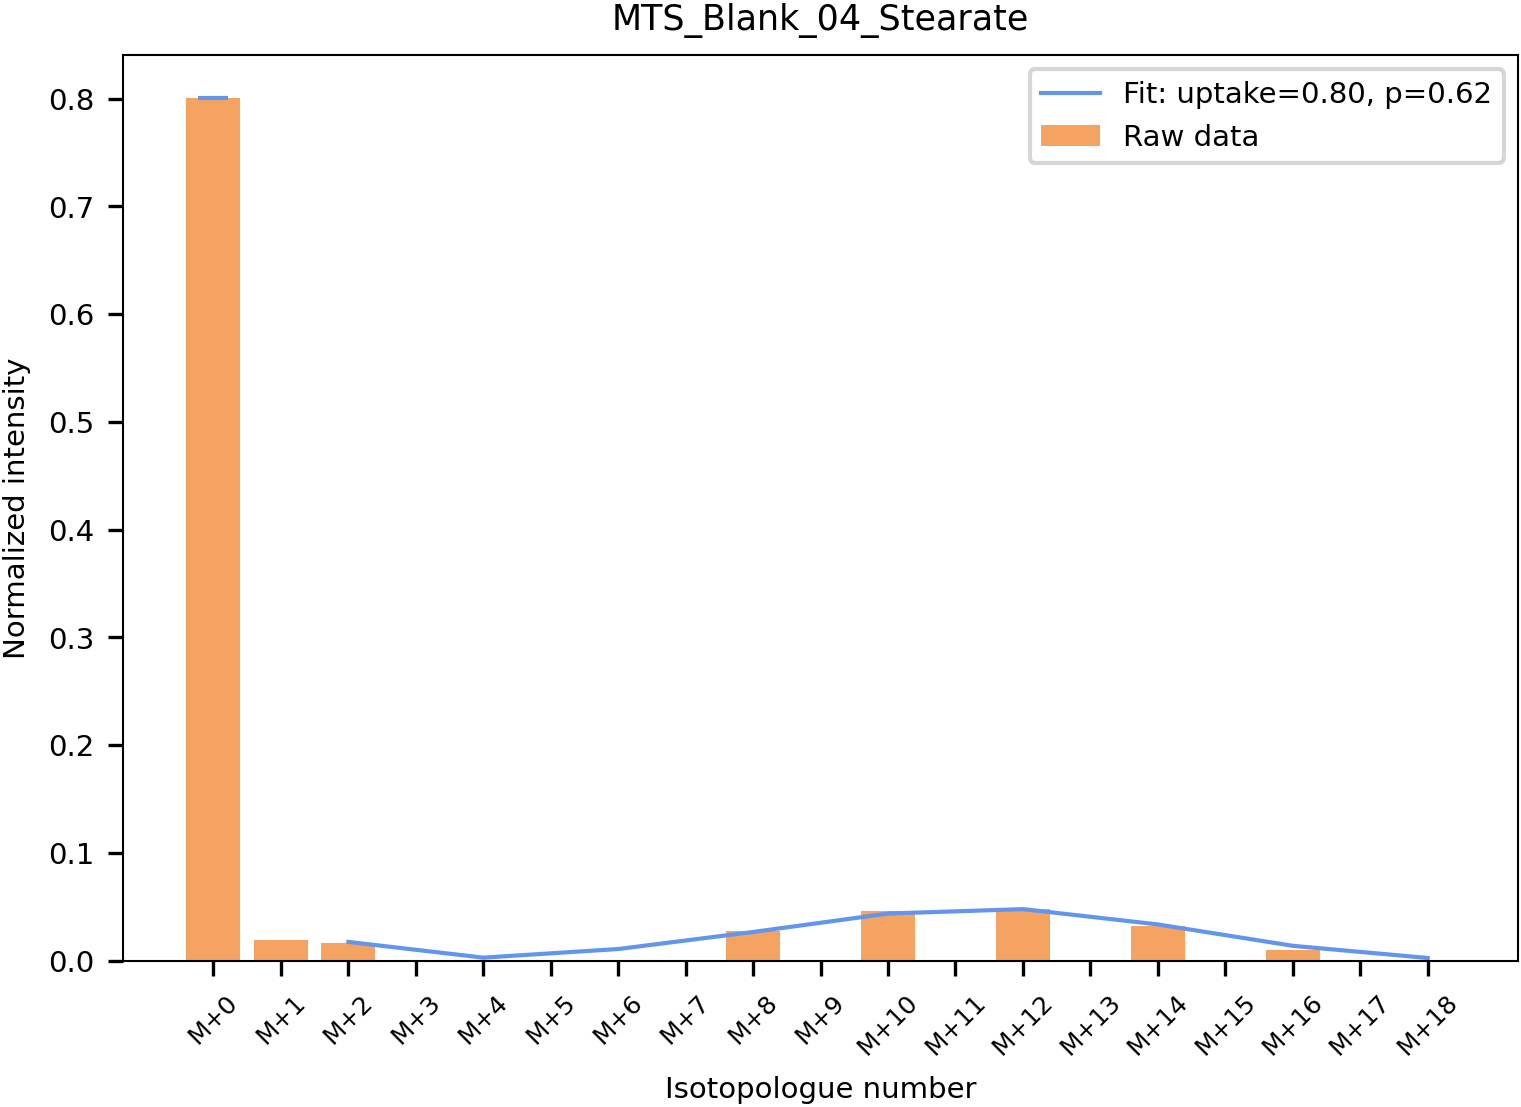

Stearate MTS_Blank_05
[8.42037784e-01 9.19216869e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.75000000e-07 9.44000000e-07 1.97170860e-02 0.00000000e+00
 1.97731456e-02 0.00000000e+00 1.41299046e-02 0.00000000e+00
 1.24190741e-02 0.00000000e+00 0.00000000e+00]
[0 1 2 3 4 5 6 7 8 9] 10 [0.85422564 0.0828124  0.66532855] True
Mean estimate 12.582971186071038, p 0.6990539547817244


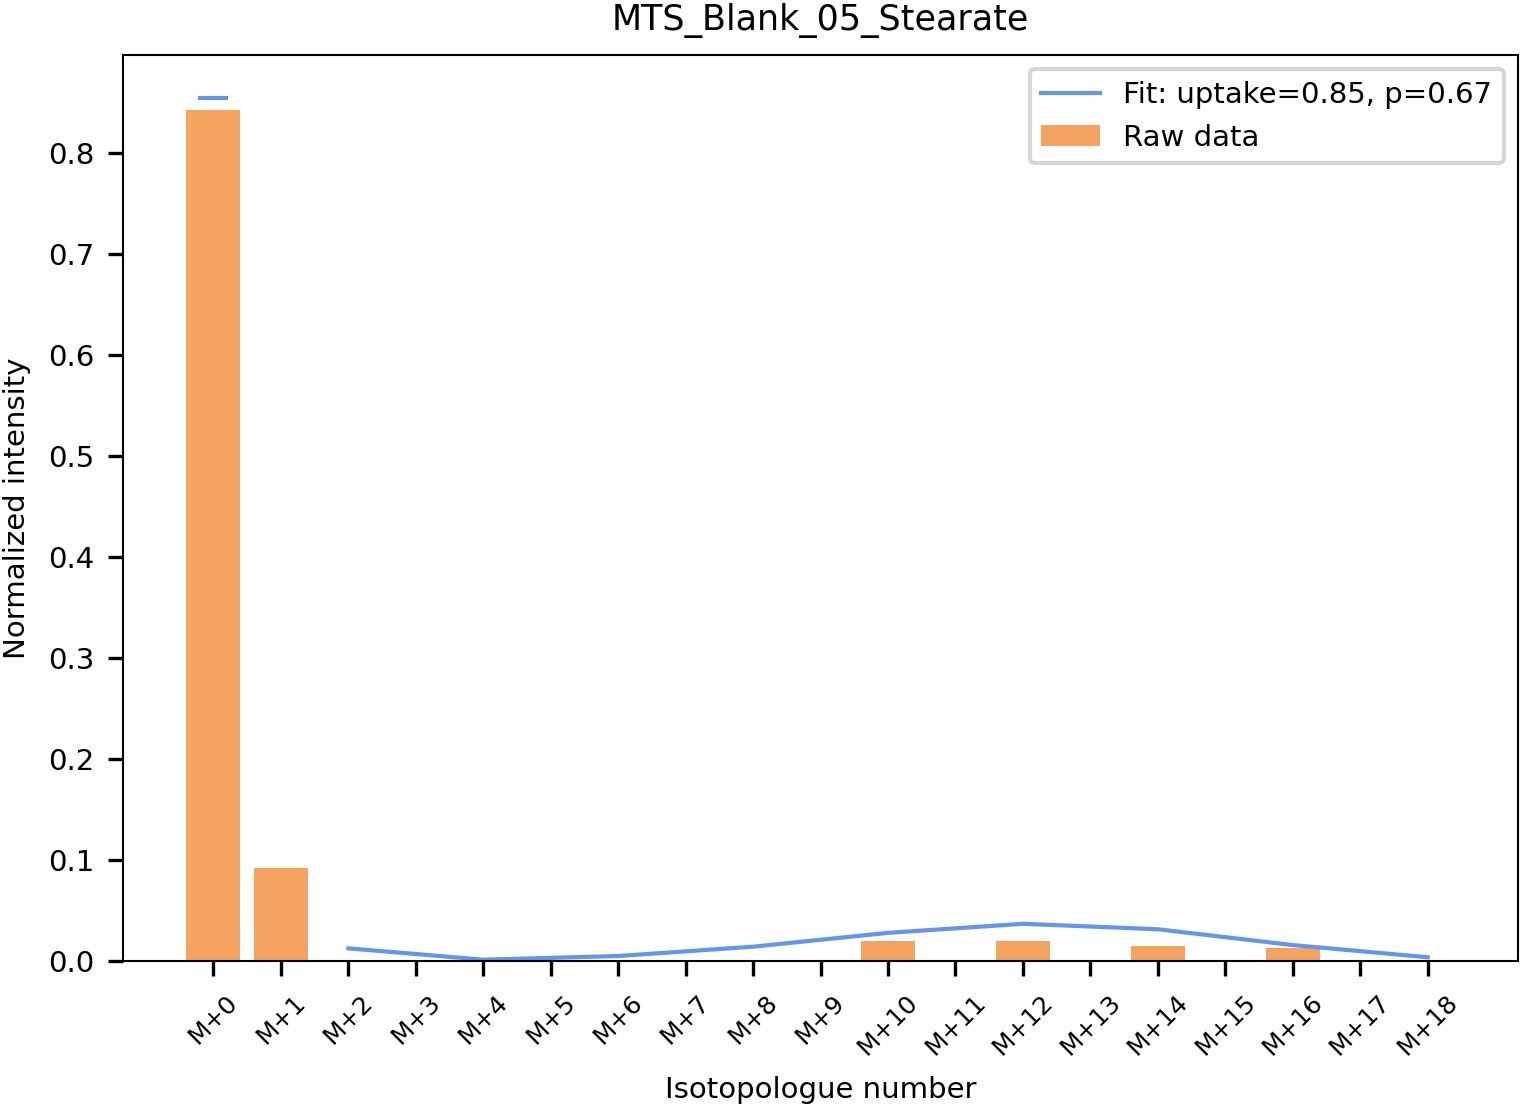

Stearate MTS_Blank_06
[0.87062047 0.         0.02067164 0.         0.01278854 0.
 0.0135148  0.         0.01404095 0.         0.02087613 0.
 0.02069738 0.00960631 0.01718377 0.         0.         0.
 0.        ]
[0 1 2 3 4 5 6 7 8 9] 10 [0.87320804 0.17870574 0.56565864] True
Mean estimate 9.50814686293717, p 0.5282303812742872


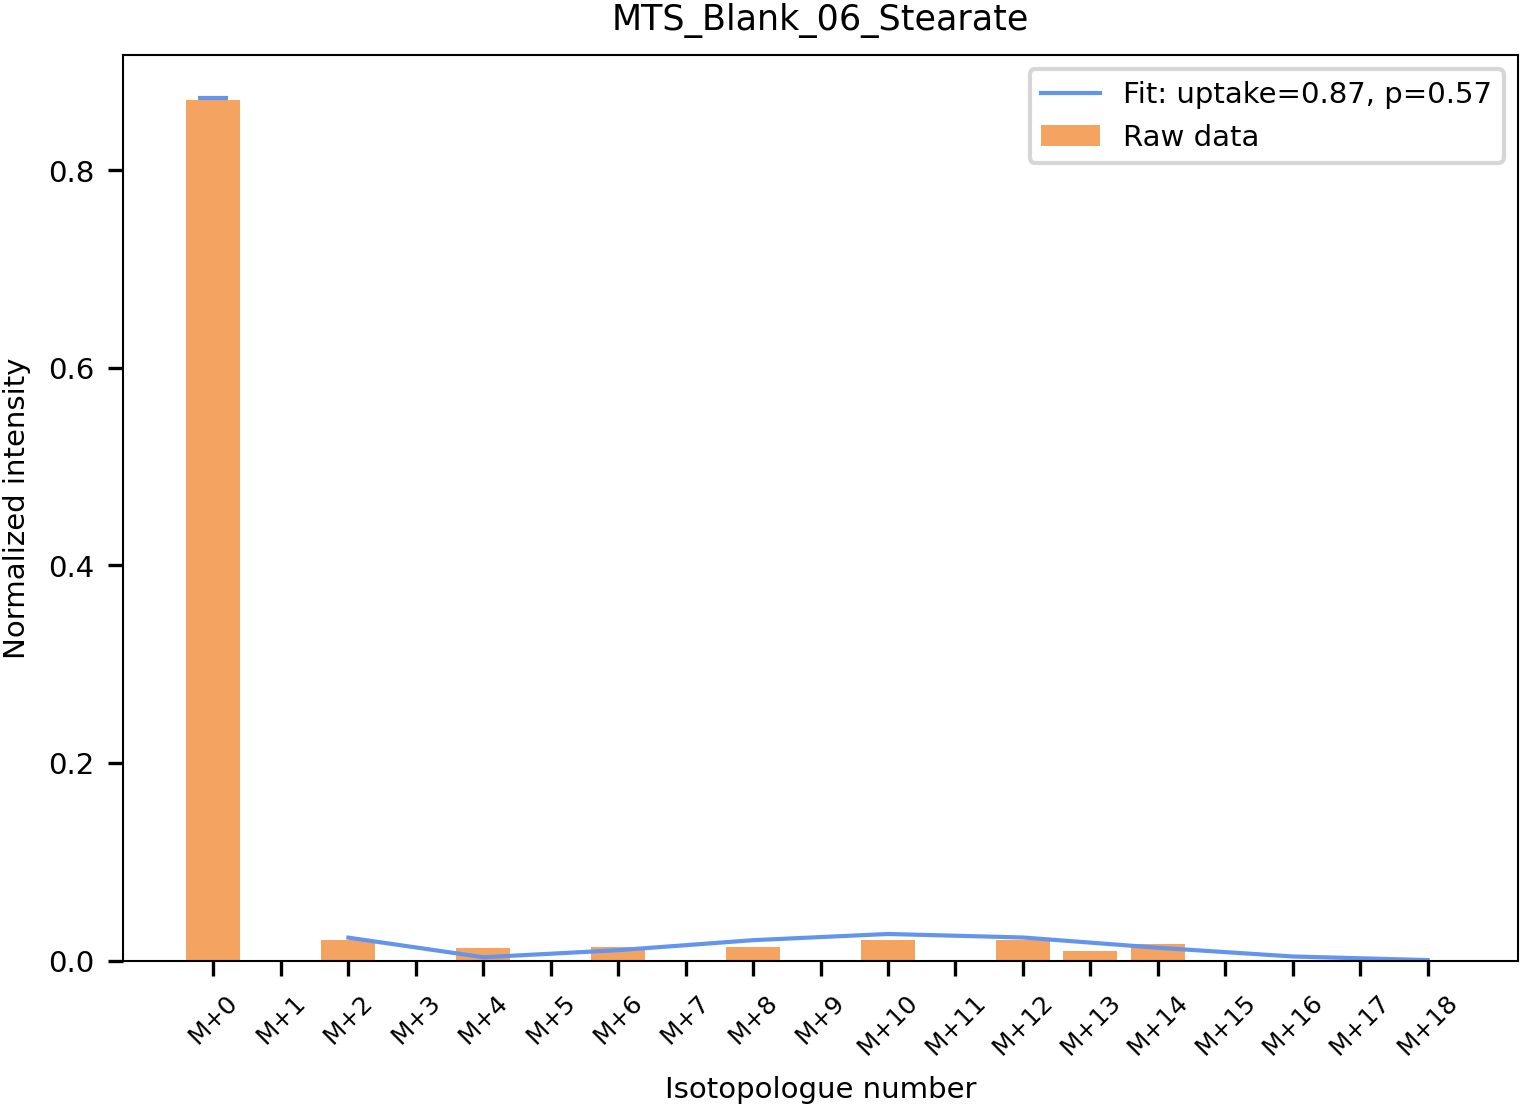

Stearate MTS_Blank_07
[8.67871134e-01 5.65046104e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.21000000e-06
 1.59563092e-02 0.00000000e+00 1.56237170e-02 0.00000000e+00
 3.00032633e-02 0.00000000e+00 1.40357558e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[0 1 2 3 4 5 6 7 8 9] 10 [0.87422087 0.04822212 0.61675465] True
Mean estimate 11.113949793294996, p 0.6174416551830553


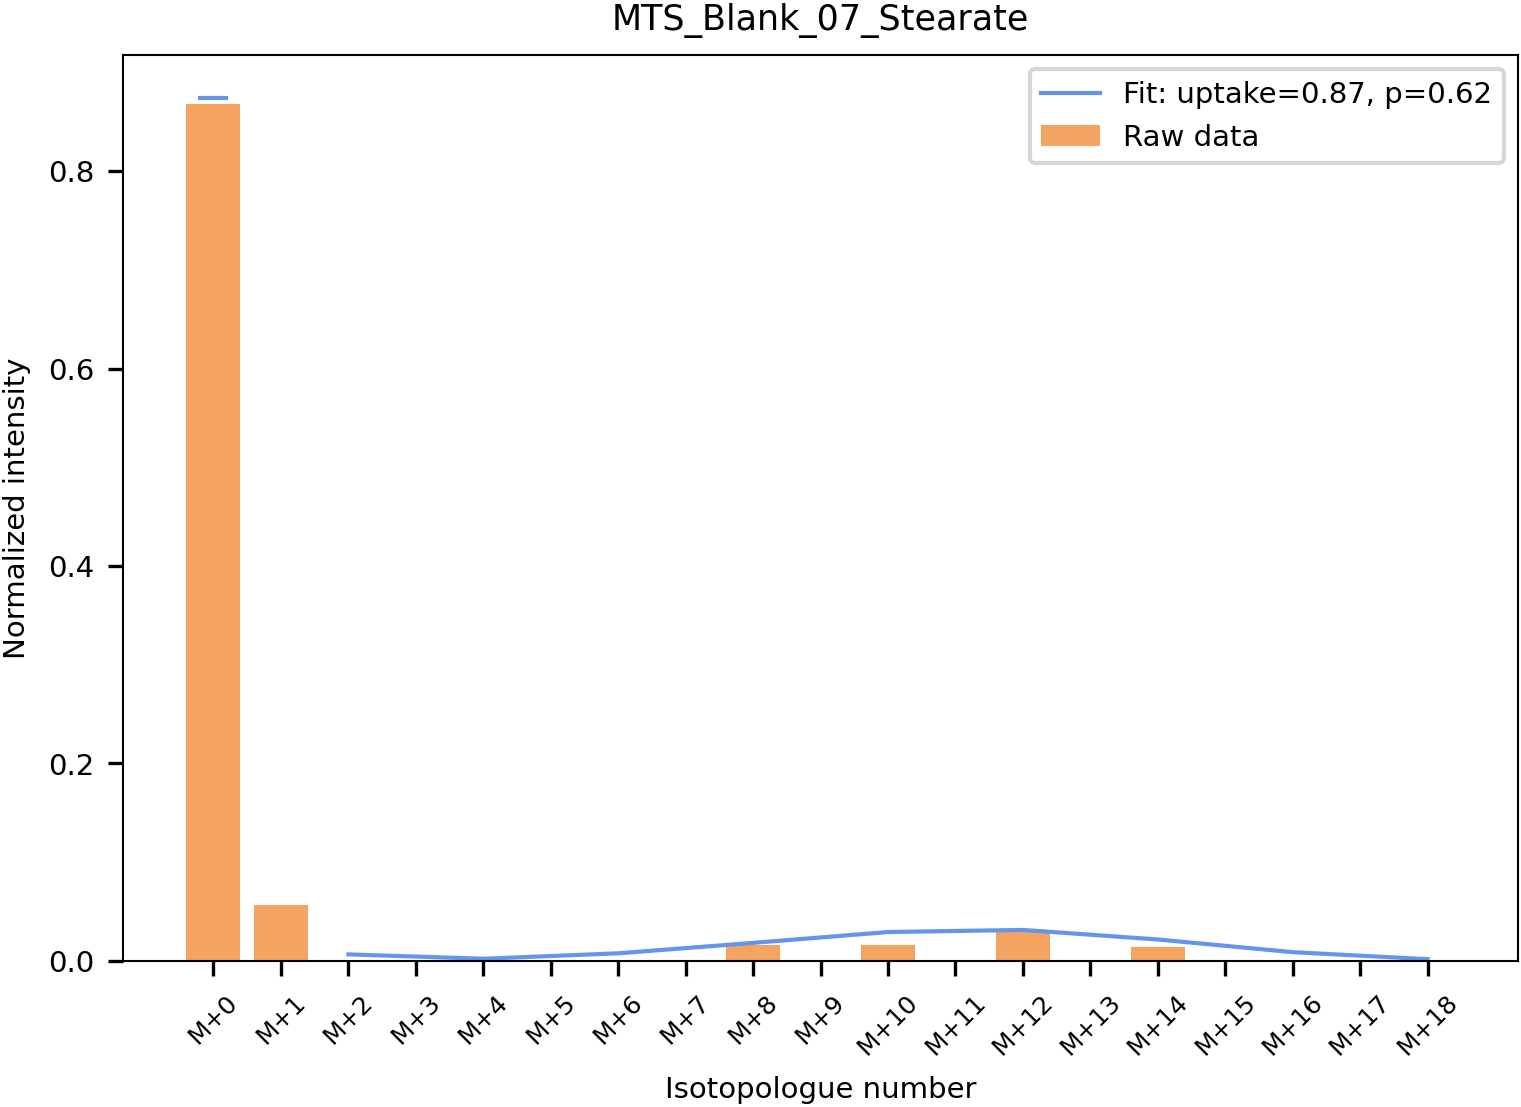

Stearate MTS_Blank_08
[0.88280897 0.02305434 0.00127307 0.         0.01236089 0.
 0.01218164 0.         0.01636693 0.         0.01815448 0.
 0.0200631  0.         0.01373657 0.         0.         0.
 0.        ]
[0 1 2 3 4 5 6 7 8 9] 10 [0.88704414 0.04127922 0.54781746] True
Mean estimate 9.34792285516584, p 0.5193290475092134


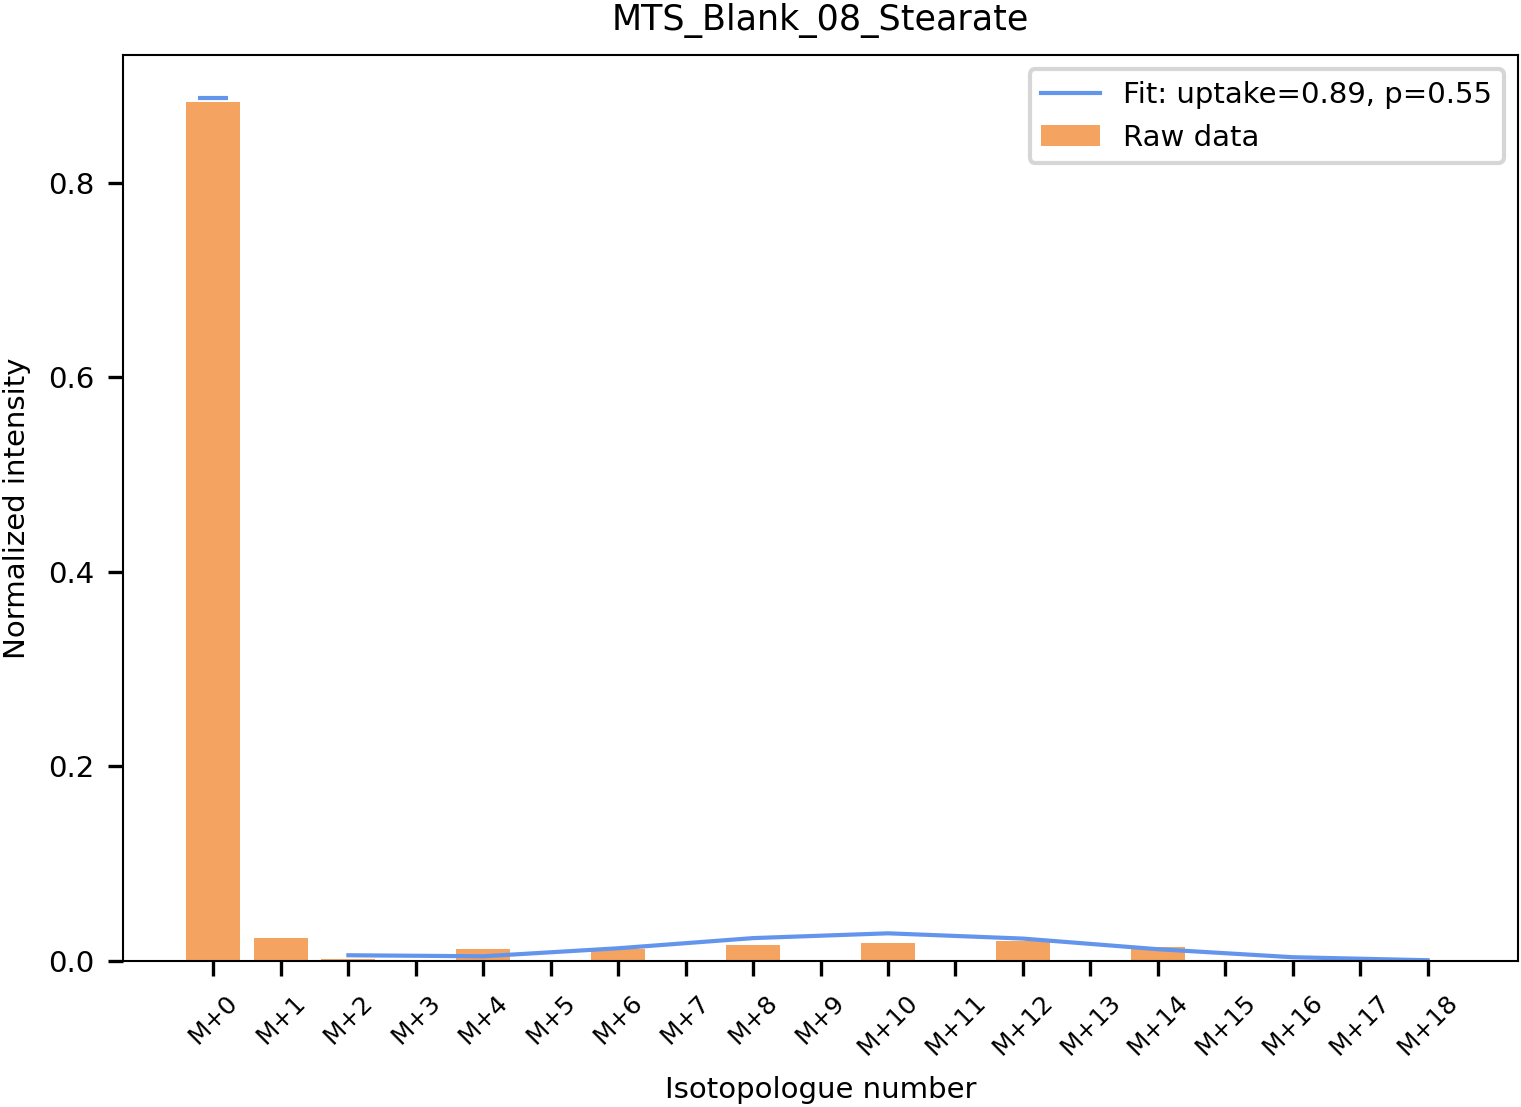

In [7]:
prediction_df = df.copy()
fit_df = pd.DataFrame(index=sample_list, columns=["model", "fit_success", "uptake", "uptake_palmitate", "p", "mean", "p_mean"])

for fa, sample in product(fa_list, sample_list):
    # Get isotopologue distribution as numpy array
    print(fa, sample)
    isotopologue_dist = df.loc[df.fa == fa, sample].to_numpy()
    print(isotopologue_dist)
    
    # Choose which model to use
    if len(isotopologue_dist) == 19:
        model_type = "C18"
        model_f = model_C18
    else:
        model_type = "C16"
        model_f = model_C16
    
    # The most important line: fit binomial to the isotopologue distribution    
    x, n, param, success = fit_binomial(isotopologue_dist, model_type)
    print(x, n, param, success)
    
    # Get prediction from the model, save it to the results table
    prediction = model_f(param, n)
    prediction_df.loc[df.fa == fa, sample] = get_full_prediction(isotopologue_dist, prediction)
    
    # Calculate mean of the isotopologue distribution and corresponding estimate of p
    mean_M, mean_p = calculate_mean(isotopologue_dist[::2], model_type=model_type)
    print(f"Mean estimate {mean_M}, p {mean_p}")
    
    # Write results of fitting
    fit_df.loc[sample, "model"] = model_type
    fit_df.loc[sample, "fit_success"] = success
    fit_df.loc[sample, "uptake"] = param[0]
    fit_df.loc[sample, "p"] = param[-1]
    fit_df.loc[sample, "mean"] = mean_M
    fit_df.loc[sample, "p_mean"] = mean_p
    
    if model_type == "C18":
        fit_df.loc[sample, "uptake_palmitate"] = param[1]
    else:
        fit_df.loc[sample, "uptake_palmitate"] = None
    
    # Plot results
    plot_isotopologue_dist(isotopologue_dist, prediction, param[0], param[-1], name=f"{sample}_{fa}", plots_path=output_path)
    plt.show()
    
fit_df.to_csv(output_path / "fit_binomial_result.csv")
prediction_df[sample_list].to_csv(output_path / "fit_binomial_prediction.csv")
    

In [8]:
fit_df.head()

,model,fit_success,uptake,uptake_palmitate,p,mean,p_mean
MTS_Alyona_acly3028_1,C18,True,0.466171,0.233574,0.495537,9.224304,0.512461
MTS_Alyona_acly3028_2,C18,True,0.47646,0.229886,0.51115,9.348039,0.519335
MTS_Alyona_acly3028_3,C18,True,0.471618,0.232107,0.503113,9.2977,0.516539
MTS_Alyona_acly3028_etoh,C18,True,0.34438,0.156702,0.659691,11.832055,0.657336
MTS_Alyona_renilla_1,C18,True,0.402409,0.182967,0.668358,12.020482,0.667805


In [9]:
prediction_df[sample_list].head()

,MTS_Alyona_acly3028_1,MTS_Alyona_acly3028_2,MTS_Alyona_acly3028_3,MTS_Alyona_acly3028_etoh,MTS_Alyona_renilla_1,MTS_Alyona_renilla_2,MTS_Alyona_renilla_3,MTS_Alyona_renilla_etoh,MTS_Alyona_acly4080_1,MTS_Alyona_acly4080_2,MTS_Alyona_acly4080_3,MTS_Alyona_acly4080_etoh,MTS_Blank_01,MTS_Blank_02,MTS_Blank_03,MTS_Blank_04,MTS_Blank_05,MTS_Blank_06,MTS_Blank_07,MTS_Blank_08
Palmitate_0,0.405391,0.397171,0.395500,0.271144,0.319562,0.332903,0.325748,0.306424,0.448270,0.452250,0.459842,0.364686,0.999274,0.981421,0.990642,0.684591,0.684053,0.639258,0.687373,0.649602
Palmitate_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Palmitate_2,0.057778,0.051981,0.052493,0.001831,0.001494,0.001493,0.001357,0.001537,0.010390,0.010672,0.010676,0.001581,0.000011,0.000016,0.000226,0.002396,0.001121,0.004637,0.002349,0.001000
Palmitate_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Palmitate_4,0.130976,0.124259,0.125099,0.012732,0.010713,0.010657,0.009926,0.010999,0.042712,0.043423,0.043253,0.011018,0.000048,0.000144,0.000861,0.012695,0.007185,0.021302,0.012483,0.006747
